In [13]:
!pip install selenium

  Attempting uninstall: attrs
    Found existing installation: attrs 21.4.0
    Uninstalling attrs-21.4.0:
      Successfully uninstalled attrs-21.4.0
  Attempting uninstall: sniffio
    Found existing installation: sniffio 1.2.0
    Uninstalling sniffio-1.2.0:
      Successfully uninstalled sniffio-1.2.0
  Attempting uninstall: websocket-client
    Found existing installation: websocket-client 0.58.0
    Uninstalling websocket-client-0.58.0:
      Successfully uninstalled websocket-client-0.58.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-server 1.13.5 requires pywinpty<2; os_name == "nt", but you have pywinpty 2.0.2 which is incompatible.


In [8]:
import pandas as pd
import sys
import requests
from bs4 import BeautifulSoup
import re
import os

In [16]:
url = 'https://www.screener.in/company/ASIANPAINT/'

In [17]:
response = requests.get(url)

In [19]:
response

<Response [200]>

In [33]:
def scrape_screener(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36'
    }
    
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        try:
            company_name = extract_company_name(soup)
            data = {
                'Company Name': company_name,
                'Market Cap': extract_value(soup, 'Market Cap'),
                'Current Price': extract_value(soup, 'Current Price'),
                'High / Low': extract_value(soup, 'High / Low'),
                'Stock P/E': extract_value(soup, 'Stock P/E'),
                'Book Value': extract_value(soup, 'Book Value'),
                'Dividend Yield': extract_value(soup, 'Dividend Yield'),
                'ROCE': extract_value(soup, 'ROCE'),
                'ROE': extract_value(soup, 'ROE'),
                'Face Value': extract_value(soup, 'Face Value'),
            }
            df = pd.DataFrame([data])
            return df
        
        except Exception as e:
            print(f'Error parsing:{e}')
            return None
    else:
        print('Failed to retrieve')

In [34]:
fetch_stock_data(url)

,Company Name,Market Cap,Current Price,High / Low,Stock P/E,Book Value,Dividend Yield,ROCE,ROE,Face Value
0,Asian Paints Ltd,"2,30,941","2,408","3,423",50.3,185,1.38,39.5,31.3,1.00


In [35]:
def extract_company_name(soup):
    company_name_tag = soup.find('h1', class_='company-name')
    if company_name_tag:
        return company_name_tag.text.strip()
    else:
        company_name_tag = soup.find('h1', class_='margin-0')
        return company_name_tag.text.strip() if company_name_tag else 'N/A'


In [36]:
def extract_value(soup, label):
    try:
        label_tag = soup.find(string=lambda text: text and label in text)
        if label_tag:
            parent = label_tag.parent
            value_tag = parent.find_next(class_='number')
            if value_tag:
                return value_tag.text.strip()
    except Exception as e:
        print(f"Error extracting value for {label}: {e}")
    return None

In [37]:
url = 'https://www.screener.in/company/ASIANPAINT/'
result = scrape_screener(url)

In [38]:
print(result)

       Company Name Market Cap Current Price High / Low Stock P/E Book Value  \
0  Asian Paints Ltd   2,30,941         2,408      3,423      50.3        185   

  Dividend Yield  ROCE   ROE Face Value  
0           1.38  39.5  31.3       1.00  


In [39]:
nse_stock_codes = [
    'RELIANCE', 'TCS', 'INFY', 'HDFCBANK', 'ICICIBANK', 'HUL', 'SBI', 'BAJFINANCE', 
    'BHARTIARTL', 'HDFC', 'ITC', 'KOTAKBANK', 'LT', 'ASIANPAINT', 'AXISBANK', 'DMART', 
    'MARUTI', 'SUNPHARMA', 'ULTRACEMCO', 'TITAN', 'NESTLEIND', 'WIPRO', 'M&M', 'ONGC', 
    'JSWSTEEL', 'TECHM', 'POWERGRID', 'TATASTEEL', 'NTPC', 'SBILIFE', 'ADANIENT', 
    'ADANIGREEN', 'ADANIPORTS', 'BAJAJ-AUTO', 'BPCL', 'BRITANNIA', 'CIPLA', 'COALINDIA', 
    'DIVISLAB', 'DRREDDY', 'EICHERMOT', 'GRASIM', 'HDFCLIFE', 'HEROMOTOCO', 'INDUSINDBK', 
    'IOC', 'SHREECEM', 'TATAMOTORS', 'UPL', 'VEDL', 'ZOMATO', 'PIDILITIND', 'SIEMENS', 
    'GAIL', 'DABUR', 'HAVELLS', 'BAJAJHLDNG', 'ABB', 'COLPAL', 'LTI', 'AUROPHARMA', 
    'BERGEPAINT', 'ICICIGI', 'MOTHERSON', 'BANKBARODA', 'AMBUJACEM', 'BOSCHLTD', 
    'HINDPETRO', 'TORNTPHARM', 'BIOCON', 'NMDC', 'INDIGO', 'LUPIN', 'BANDHANBNK', 
    'ADANITRANS', 'HAL', 'IDFCFIRSTB', 'IRCTC', 'MUTHOOTFIN', 'DLF', 'POLYCAB', 
    'TRENT', 'ALKEM', 'SRF', 'JUBLFOOD', 'PEL', 'CROMPTON', 'MPHASIS', 'ABBOTINDIA', 
    'INDIAMART', 'GLAND', 'MCDOWELL-N', 'ICICIPRULI', 'HINDZINC', 'CANBK', 'GODREJCP', 
    'CHOLAFIN', 'PNB', 'TVSMOTOR', 'CUMMINSIND', 'ASHOKLEY', 'PFC', 'FEDERALBNK', 
    'UBL', 'TATAPOWER', 'NAVINFLUOR', 'HINDALCO', 'RECLTD', 'MFSL', 'BEL', 'BHEL'
]



List of NSE Stock Codes:
['RELIANCE', 'TCS', 'INFY', 'HDFCBANK', 'ICICIBANK', 'HUL', 'SBI', 'BAJFINANCE', 'BHARTIARTL', 'HDFC', 'ITC', 'KOTAKBANK', 'LT', 'ASIANPAINT', 'AXISBANK', 'DMART', 'MARUTI', 'SUNPHARMA', 'ULTRACEMCO', 'TITAN', 'NESTLEIND', 'WIPRO', 'M&M', 'ONGC', 'JSWSTEEL', 'TECHM', 'POWERGRID', 'TATASTEEL', 'NTPC', 'SBILIFE', 'ADANIENT', 'ADANIGREEN', 'ADANIPORTS', 'BAJAJ-AUTO', 'BPCL', 'BRITANNIA', 'CIPLA', 'COALINDIA', 'DIVISLAB', 'DRREDDY', 'EICHERMOT', 'GRASIM', 'HDFCLIFE', 'HEROMOTOCO', 'INDUSINDBK', 'IOC', 'SHREECEM', 'TATAMOTORS', 'UPL', 'VEDL', 'ZOMATO', 'PIDILITIND', 'SIEMENS', 'GAIL', 'DABUR', 'HAVELLS', 'BAJAJHLDNG', 'ABB', 'COLPAL', 'LTI', 'AUROPHARMA', 'BERGEPAINT', 'ICICIGI', 'MOTHERSON', 'BANKBARODA', 'AMBUJACEM', 'BOSCHLTD', 'HINDPETRO', 'TORNTPHARM', 'BIOCON', 'NMDC', 'INDIGO', 'LUPIN', 'BANDHANBNK', 'ADANITRANS', 'HAL', 'IDFCFIRSTB', 'IRCTC', 'MUTHOOTFIN', 'DLF', 'POLYCAB', 'TRENT', 'ALKEM', 'SRF', 'JUBLFOOD', 'PEL', 'CROMPTON', 'MPHASIS', 'ABBOTINDIA', 'IND

In [42]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# List of NSE stock codes
nse_stock_codes = [
    'RELIANCE', 'TCS', 'INFY', 'HDFCBANK', 'ICICIBANK', 'HINDUNILVR', 'SBIN', 'BAJFINANCE', 
    'BHARTIARTL', 'HDFC', 'ITC', 'KOTAKBANK', 'LT', 'ASIANPAINT', 'AXISBANK', 'DMART', 
    'MARUTI', 'SUNPHARMA', 'ULTRACEMCO', 'TITAN', 'NESTLEIND', 'WIPRO', 'M&M', 'ONGC', 
    'JSWSTEEL', 'TECHM', 'POWERGRID', 'TATASTEEL', 'NTPC', 'SBILIFE', 'ADANIENT', 
    'ADANIGREEN', 'ADANIPORTS', 'BAJAJ-AUTO', 'BPCL', 'BRITANNIA', 'CIPLA', 'COALINDIA', 
    'DIVISLAB', 'DRREDDY', 'EICHERMOT', 'GRASIM', 'HDFCLIFE', 'HEROMOTOCO', 'INDUSINDBK', 
    'IOC', 'SHREECEM', 'TATAMOTORS', 'UPL', 'VEDL', 'ZOMATO', 'PIDILITIND', 'SIEMENS', 
    'GAILEQ', 'DABUR', 'HAVELLS', 'BAJAJHLDNG', 'ABB', 'COLPAL', 'LTI', 'AUROPHARMA', 
    'BERGEPAINT', 'ICICIGI', 'MOTHERSON', 'BANKBARODA', 'AMBUJACEM', 'BOSCHLTD', 
    'HINDPETRO', 'TORNTPHARM', 'BIOCON', 'NMDC', 'INDIGO', 'LUPIN', 'BANDHANBNK', 
    'ADANITRANS', 'HAL', 'IDFCFIRSTB', 'IRCTC', 'MUTHOOTFIN', 'DLF', 'POLYCAB', 
    'TRENT', 'ALKEM', 'SRF', 'JUBLFOOD', 'PEL', 'CROMPTON', 'MPHASIS', 'ABBOTINDIA', 
    'INDIAMART', 'GLAND', 'MCDOWELL-N', 'ICICIPRULI', 'HINDZINC', 'CANBK', 'GODREJCP', 
    'CHOLAFIN', 'PNB', 'TVSMOTOR', 'CUMMINSIND', 'ASHOKLEY', 'PFC', 'FEDERALBNK', 
    'UBL', 'TATAPOWER', 'NAVINFLUOR', 'HINDALCO', 'RECLTD', 'MFSL', 'BHEL', 'BEL'
]

# Define headers to mimic a browser visit
HEADERS = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36'
}

# Function to extract company name
def extract_company_name(soup):
    company_name_tag = soup.find('h1', class_='company-name')
    if company_name_tag:
        return company_name_tag.text.strip()
    else:
        company_name_tag = soup.find('h1', class_='margin-0')
        return company_name_tag.text.strip() if company_name_tag else 'N/A'

# Function to extract a specific value
def extract_value(soup, label):
    try:
        label_tag = soup.find(string=lambda text: text and label in text)
        if label_tag:
            parent = label_tag.parent
            value_tag = parent.find_next(class_='number')
            if value_tag:
                return value_tag.text.strip()
    except Exception as e:
        print(f"Error extracting value for {label}: {e}")
    return None

# Function to scrape data for a single company
def scrape_screener(url):
    try:
        response = requests.get(url, headers=HEADERS)
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')
            company_name = extract_company_name(soup)
            data = {
                'Company Name': company_name,
                'Market Cap': extract_value(soup, 'Market Cap'),
                'Current Price': extract_value(soup, 'Current Price'),
                'High / Low': extract_value(soup, 'High / Low'),
                'Stock P/E': extract_value(soup, 'Stock P/E'),
                'Book Value': extract_value(soup, 'Book Value'),
                'Dividend Yield': extract_value(soup, 'Dividend Yield'),
                'ROCE': extract_value(soup, 'ROCE'),
                'ROE': extract_value(soup, 'ROE'),
                'Face Value': extract_value(soup, 'Face Value'),
                'EPS': extract_value(soup,' EPS in Rs')
            }
            return data
        else:
            print(f"Failed to fetch URL: {url}")
    except Exception as e:
        print(f"Error scraping data: {e}")
    return None

# Main script to iterate through NSE stock codes and scrape data
data_list = []

for stock_code in nse_stock_codes:
    url = f'https://www.screener.in/company/{stock_code}/'
    print(f"Scraping data for {stock_code}...")
    data = scrape_screener(url)
    if data:
        data_list.append(data)

# Create a DataFrame from the list of data
df = pd.DataFrame(data_list)

# Display or save the results
print("Scraping complete. Data collected:")
df.head(5)

# Optionally save to CSV
df.to_csv('nse_stock_data.csv', index=False)


Scraping data for RELIANCE...
Scraping data for TCS...
Scraping data for INFY...
Scraping data for HDFCBANK...
Scraping data for ICICIBANK...
Scraping data for HINDUNILVR...
Scraping data for SBIN...
Scraping data for BAJFINANCE...
Scraping data for BHARTIARTL...
Scraping data for HDFC...
Scraping data for ITC...
Scraping data for KOTAKBANK...
Scraping data for LT...
Scraping data for ASIANPAINT...
Scraping data for AXISBANK...
Scraping data for DMART...
Scraping data for MARUTI...
Scraping data for SUNPHARMA...
Scraping data for ULTRACEMCO...
Scraping data for TITAN...
Scraping data for NESTLEIND...
Scraping data for WIPRO...
Scraping data for M&M...
Scraping data for ONGC...
Scraping data for JSWSTEEL...
Scraping data for TECHM...
Scraping data for POWERGRID...
Scraping data for TATASTEEL...
Scraping data for NTPC...
Scraping data for SBILIFE...
Scraping data for ADANIENT...
Scraping data for ADANIGREEN...
Scraping data for ADANIPORTS...
Scraping data for BAJAJ-AUTO...
Scraping data 

In [43]:
df.head(5)

,Company Name,Market Cap,Current Price,High / Low,Stock P/E,Book Value,Dividend Yield,ROCE,ROE,Face Value,EPS
0,Reliance Industries Ltd,"17,22,468","1,273","1,609",47.2,387,0.39,9.60,8.42,10.0,None
1,Tata Consultancy Services Ltd,"16,18,696","4,474","4,592",33.7,231,1.23,74.8,60.4,1.00,None
2,Infosys Ltd,"8,30,325","2,000","2,007",30.1,199,1.90,46.2,36.6,5.00,None
3,HDFC Bank Ltd,"14,30,929","1,872","1,880",21.7,580,1.04,7.54,16.9,1.00,None
4,ICICI Bank Ltd,"9,49,165","1,345","1,362",21.7,339,0.74,7.51,18.6,2.00,None


# Adding addtional Yahoo Finance Part 

In [48]:
pip install yfinance 


  Using cached yfinance-0.2.50-py2.py3-none-any.whl (102 kB)
  Using cached frozendict-2.4.6-cp39-cp39-win_amd64.whl (37 kB)
  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: numpy>=1.16.5 in d:\users\manan\anaconda3\lib\site-packages (from yfinance) (1.26.4)



In [52]:
import yfinance as yf
import pandas as pd

# Define Nifty50 Stock symbols (just a sample of Nifty50)
nse_stock_codes = [
    'RELIANCE', 'TCS', 'INFY', 'HDFCBANK', 'ICICIBANK', 'HUL', 'SBI', 'BAJFINANCE', 
    'BHARTIARTL', 'HDFC', 'ITC', 'KOTAKBANK', 'LT', 'ASIANPAINT', 'AXISBANK', 'DMART', 
    'MARUTI', 'SUNPHARMA', 'ULTRACEMCO', 'TITAN', 'NESTLEIND', 'WIPRO', 'M&M', 'ONGC', 
    'JSWSTEEL', 'TECHM', 'POWERGRID', 'TATASTEEL', 'NTPC', 'SBILIFE', 'ADANIENT', 
    'ADANIGREEN', 'ADANIPORTS', 'BAJAJ-AUTO', 'BPCL', 'BRITANNIA', 'CIPLA', 'COALINDIA', 
    'DIVISLAB', 'DRREDDY', 'EICHERMOT', 'GRASIM', 'HDFCLIFE', 'HEROMOTOCO', 'INDUSINDBK', 
    'IOC', 'SHREECEM', 'TATAMOTORS', 'UPL', 'VEDL', 'ZOMATO', 'PIDILITIND', 'SIEMENS', 
    'GAIL', 'DABUR', 'HAVELLS', 'BAJAJHLDNG', 'ABB', 'COLPAL', 'LTI', 'AUROPHARMA', 
    'BERGEPAINT', 'ICICIGI', 'MOTHERSON', 'BANKBARODA', 'AMBUJACEM', 'BOSCHLTD', 
    'HINDPETRO', 'TORNTPHARM', 'BIOCON', 'NMDC', 'INDIGO', 'LUPIN', 'BANDHANBNK', 
    'ADANITRANS', 'HAL', 'IDFCFIRSTB', 'IRCTC', 'MUTHOOTFIN', 'DLF', 'POLYCAB', 
    'TRENT', 'ALKEM', 'SRF', 'JUBLFOOD', 'PEL', 'CROMPTON', 'MPHASIS', 'ABBOTINDIA', 
    'INDIAMART', 'GLAND', 'MCDOWELL-N', 'ICICIPRULI', 'HINDZINC', 'CANBK', 'GODREJCP', 
    'CHOLAFIN', 'PNB', 'TVSMOTOR', 'CUMMINSIND', 'ASHOKLEY', 'PFC', 'FEDERALBNK', 
    'UBL', 'TATAPOWER', 'NAVINFLUOR', 'HINDALCO', 'RECLTD', 'MFSL', 'BEL', 'BHEL'
]

def get_ohlcv_data(stock_codes, start_date='2020-01-01', end_date='2024-12-31'):
    data = {}
    for code in stock_codes:
        try:
        
            stock_data = yf.download(code + ".NS", start=start_date, end=end_date)
            data[code] = stock_data
        except Exception as e:
            print(f"Error fetching data for {code}: {e}")
            data[code] = None
    return data

def calculate_daily_returns(ohlcv_data, price_type='Close'):
    returns = {}
    for symbol, data in ohlcv_data.items():
        if data is not None and not data.empty:
            returns[symbol] = data[price_type].pct_change().dropna()
        else:
            print(f"No data for {symbol}")
    return returns

ohlcv_data = get_ohlcv_data(nse_stock_codes)

daily_returns = calculate_daily_returns(ohlcv_data, price_type='Close')

valid_returns = {symbol: data for symbol, data in daily_returns.items() if data is not None and not data.empty}

# Combine all returns into a single DataFrame
if valid_returns:
   
    returns_df = pd.concat(valid_returns, axis=1)

    
    print("Daily Returns of Nifty50 Stocks:")
    print(returns_df.head())

  
    returns_df.to_csv('nifty50_daily_returns.csv', index=True)
    print("Daily returns saved to 'nifty50_daily_returns.csv'.")
else:
    print("No valid data found for any stock.")




[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['HUL.NS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['SBI.NS']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2020-01-01 -> 2024-12-31)')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['HDFC.NS']: YFTzMissingError('$%ticker%: possibly de

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


No data for HUL
No data for SBI
No data for HDFC
No data for LTI
No data for ADANITRANS
No data for MCDOWELL-N
Daily Returns of Nifty50 Stocks:
              RELIANCE       TCS      INFY    HDFCBANK    ICICIBANK  \
Ticker     RELIANCE.NS    TCS.NS   INFY.NS HDFCBANK.NS ICICIBANK.NS   
Date                                                                  
2020-01-02    0.017024 -0.004590 -0.002918    0.006374     0.007173   
2020-01-03    0.001205  0.019929  0.015380   -0.014261    -0.003237   
2020-01-06   -0.023192 -0.000091 -0.009584   -0.021641    -0.024404   
2020-01-07    0.015385  0.002454 -0.014820    0.015835    -0.005326   
2020-01-08   -0.007510  0.022395 -0.013326   -0.002618     0.005833   

              BAJFINANCE    BHARTIARTL       ITC    KOTAKBANK        LT  ...  \
Ticker     BAJFINANCE.NS BHARTIARTL.NS    ITC.NS KOTAKBANK.NS     LT.NS  ...   
Date                                                                     ...   
2020-01-02      0.003486      0.004191  0.00735

In [54]:
df.head(10)

,Company Name,Market Cap,Current Price,High / Low,Stock P/E,Book Value,Dividend Yield,ROCE,ROE,Face Value,EPS,Company Code
0,Reliance Industries Ltd,"17,22,468","1,273","1,609",47.2,387,0.39,9.60,8.42,10.0,None,Reliance
1,Tata Consultancy Services Ltd,"16,18,696","4,474","4,592",33.7,231,1.23,74.8,60.4,1.00,None,Tata
2,Infosys Ltd,"8,30,325","2,000","2,007",30.1,199,1.90,46.2,36.6,5.00,None,Infosys
3,HDFC Bank Ltd,"14,30,929","1,872","1,880",21.7,580,1.04,7.54,16.9,1.00,None,HDFC
4,ICICI Bank Ltd,"9,49,165","1,345","1,362",21.7,339,0.74,7.51,18.6,2.00,None,ICICI
5,Hindustan Unilever Ltd,"5,61,576","2,390","3,035",55.3,215,1.76,27.2,20.1,1.00,None,Hindustan
6,State Bank of India,"7,68,901",862,912,10.9,423,1.59,6.05,17.3,1.00,None,State
7,Bajaj Finance Ltd,"4,44,613","7,183","7,830",32.7,"1,280",0.50,12.3,20.5,2.00,None,Bajaj
8,Bharti Airtel Ltd,"10,07,452","1,682","1,779",133,182,0.48,8.59,6.54,5.00,None,Bharti
9,Housing Development Finance CorporationLtd(Mer...,"5,04,384","2,724",,31.1,730,0.00,8.47,12.8,2.00,None,Housing


In [55]:
returns_df.head(10)

,RELIANCE,TCS,INFY,HDFCBANK,ICICIBANK,HINDUNILVR,SBIN,BAJFINANCE,BHARTIARTL,ITC,...,PFC,FEDERALBNK,UBL,TATAPOWER,NAVINFLUOR,HINDALCO,RECLTD,MFSL,BHEL,BEL
Ticker,RELIANCE.NS,TCS.NS,INFY.NS,HDFCBANK.NS,ICICIBANK.NS,HINDUNILVR.NS,SBIN.NS,BAJFINANCE.NS,BHARTIARTL.NS,ITC.NS,...,PFC.NS,FEDERALBNK.NS,UBL.NS,TATAPOWER.NS,NAVINFLUOR.NS,HINDALCO.NS,RECLTD.NS,MFSL.NS,BHEL.NS,BEL.NS
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,0.017024,-0.004590,-0.002918,0.006374,0.007173,0.000775,0.014501,0.003486,0.004191,0.007350,...,0.012247,0.039437,0.006006,0.006944,0.002442,0.027298,0.010420,0.020196,0.043678,0.029955
2020-01-03,0.001205,0.019929,0.015380,-0.014261,-0.003237,-0.005469,-0.016504,-0.012388,-0.000220,-0.005629,...,-0.009178,-0.014092,-0.000429,-0.004310,-0.006265,-0.016807,-0.016844,0.019705,-0.017621,-0.021328
2020-01-06,-0.023192,-0.000091,-0.009584,-0.021641,-0.024404,-0.006226,-0.044052,-0.046918,-0.011975,-0.014256,...,-0.049263,-0.042331,-0.002928,-0.017316,-0.019613,-0.033033,-0.028671,-0.017729,-0.043722,-0.039624
2020-01-07,0.015385,0.002454,-0.014820,0.015835,-0.005326,0.002741,-0.001881,0.002740,-0.010119,0.001063,...,0.035872,0.002870,-0.007517,-0.002643,0.043838,-0.002150,0.013319,0.009656,0.017585,-0.006189
2020-01-08,-0.007510,0.022395,-0.013326,-0.002618,0.005833,0.004504,0.004397,0.010555,0.030892,-0.004886,...,-0.007696,-0.004579,-0.015148,-0.006184,0.065757,-0.006943,-0.015275,-0.000983,-0.004608,-0.009341
2020-01-09,0.023031,-0.018135,0.013019,0.011214,0.038692,0.002954,0.032520,0.018334,0.002724,0.006832,...,0.029729,0.031052,0.012257,0.027556,-0.002202,0.016152,0.027778,-0.095822,0.039352,0.016239
2020-01-10,-0.000226,-0.000361,0.014569,0.008888,-0.011074,0.009793,0.006208,0.005007,-0.006738,0.009330,...,0.017992,-0.009481,0.004590,0.019896,-0.016505,0.003559,-0.001404,0.011083,-0.003341,0.002062
2020-01-13,-0.002552,-0.010481,0.047958,0.002573,-0.003054,0.020906,-0.004515,0.004741,0.026039,0.005252,...,0.027538,0.014077,0.018907,0.007634,-0.007105,-0.001418,0.008084,-0.002447,0.029050,0.008230


# Task 2

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


RELIANCE.NS - T-scores:
T-score for Daily Returns: 1.2589065507200845
T-score for Daily Volume: Ticker
RELIANCE.NS    42.433461
dtype: float64
T-score for Daily Close Price: Ticker
RELIANCE.NS    168.842969
dtype: float64
RELIANCE.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.00037696202911437454, 0.0017270694539296045)
Confidence Interval for Daily Volume: (Ticker
RELIANCE.NS    1.868277e+07
dtype: float64, Ticker
RELIANCE.NS    2.049411e+07
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
RELIANCE.NS    1099.378855
dtype: float64, Ticker
RELIANCE.NS    1125.228069
dtype: float64)


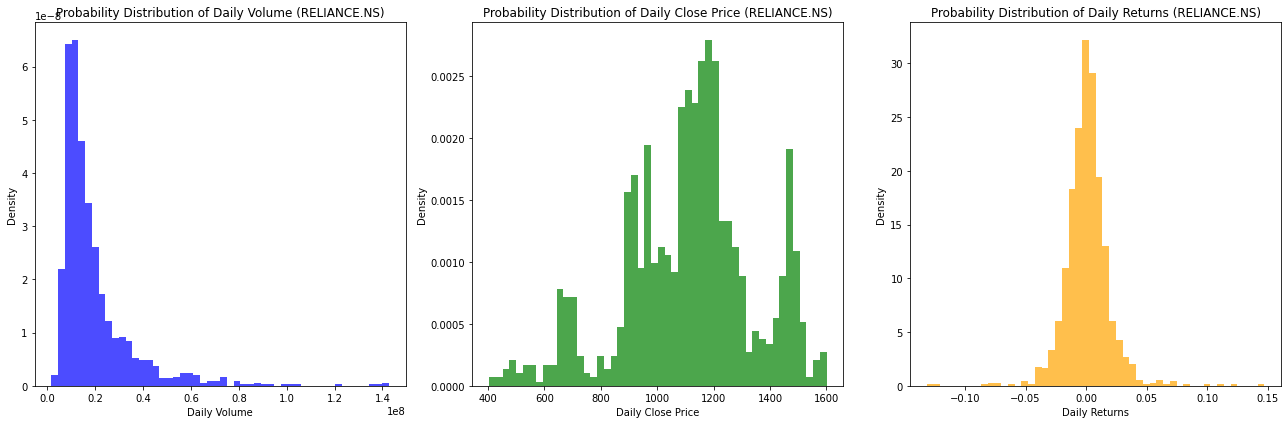

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


TCS.NS - T-scores:
T-score for Daily Returns: 1.6103644987023948
T-score for Daily Volume: Ticker
TCS.NS    56.372807
dtype: float64
T-score for Daily Close Price: Ticker
TCS.NS    180.588775
dtype: float64
TCS.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.0001550831513572569, 0.0015759279017388775)
Confidence Interval for Daily Volume: (Ticker
TCS.NS    2.603063e+06
dtype: float64, Ticker
TCS.NS    2.790781e+06
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
TCS.NS    3251.312685
dtype: float64, Ticker
TCS.NS    3322.732543
dtype: float64)


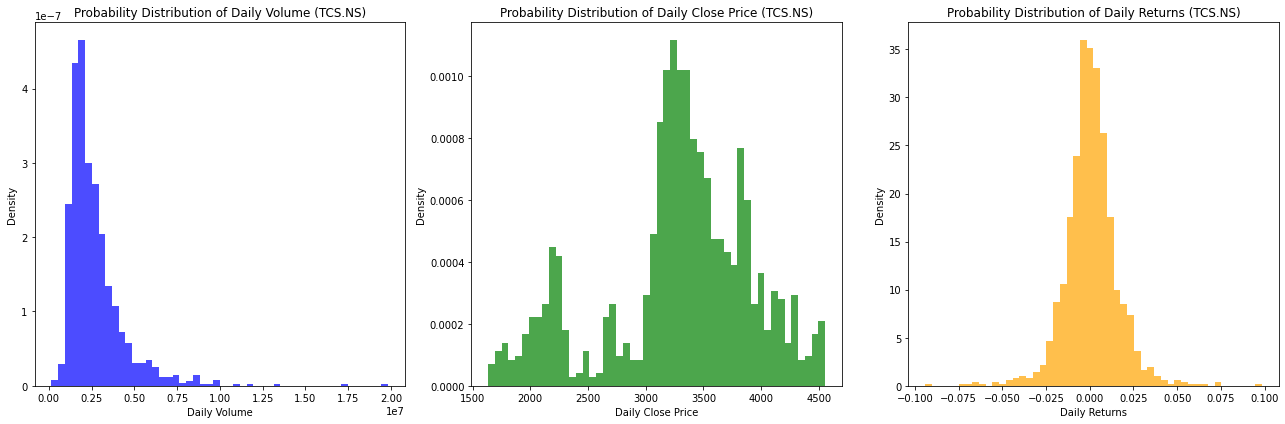

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


INFY.NS - T-scores:
T-score for Daily Returns: 1.9248913469579065
T-score for Daily Volume: Ticker
INFY.NS    50.639022
dtype: float64
T-score for Daily Close Price: Ticker
INFY.NS    148.366986
dtype: float64
INFY.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-1.865557240949406e-05, 0.0019591534850461325)
Confidence Interval for Daily Volume: (Ticker
INFY.NS    7.253305e+06
dtype: float64, Ticker
INFY.NS    7.837985e+06
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
INFY.NS    1399.124068
dtype: float64, Ticker
INFY.NS    1436.621982
dtype: float64)


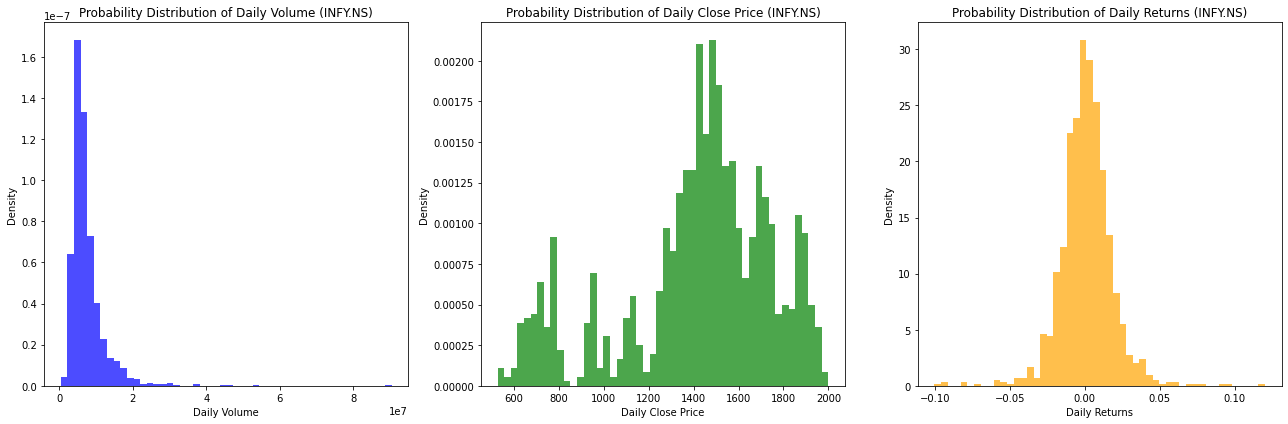

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


HDFCBANK.NS - T-scores:
T-score for Daily Returns: 0.9340319392662009
T-score for Daily Volume: Ticker
HDFCBANK.NS    37.756321
dtype: float64
T-score for Daily Close Price: Ticker
HDFCBANK.NS    245.391556
dtype: float64
HDFCBANK.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.0005062542990849432, 0.0014263268101875008)
Confidence Interval for Daily Volume: (Ticker
HDFCBANK.NS    1.269772e+07
dtype: float64, Ticker
HDFCBANK.NS    1.408965e+07
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
HDFCBANK.NS    1448.08228
dtype: float64, Ticker
HDFCBANK.NS    1471.423674
dtype: float64)


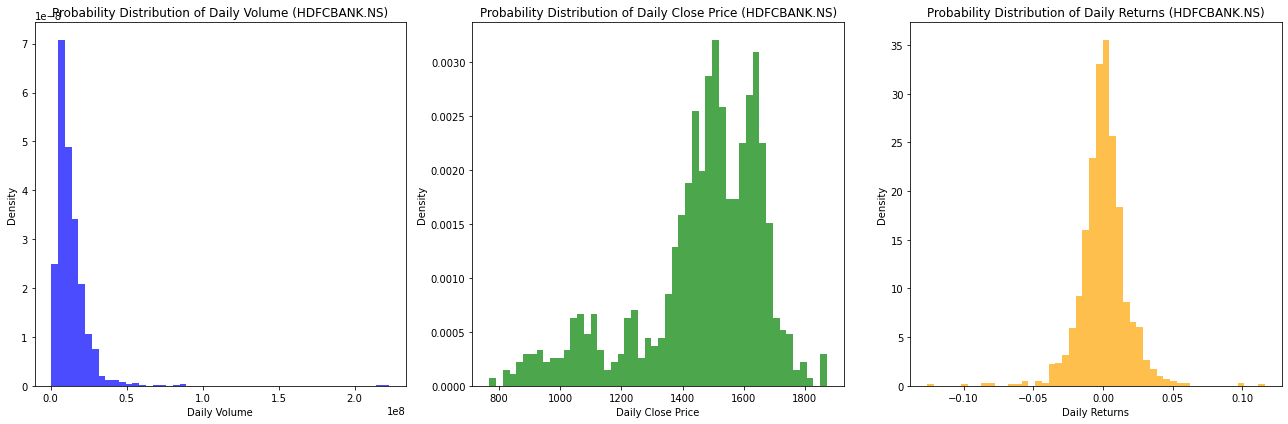

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


ICICIBANK.NS - T-scores:
T-score for Daily Returns: 1.661716394929034
T-score for Daily Volume: Ticker
ICICIBANK.NS    49.997036
dtype: float64
T-score for Daily Close Price: Ticker
ICICIBANK.NS    105.334012
dtype: float64
ICICIBANK.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.00017200149279145247, 0.0020762720560130567)
Confidence Interval for Daily Volume: (Ticker
ICICIBANK.NS    1.892617e+07
dtype: float64, Ticker
ICICIBANK.NS    2.047218e+07
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
ICICIBANK.NS    774.775955
dtype: float64, Ticker
ICICIBANK.NS    804.184924
dtype: float64)


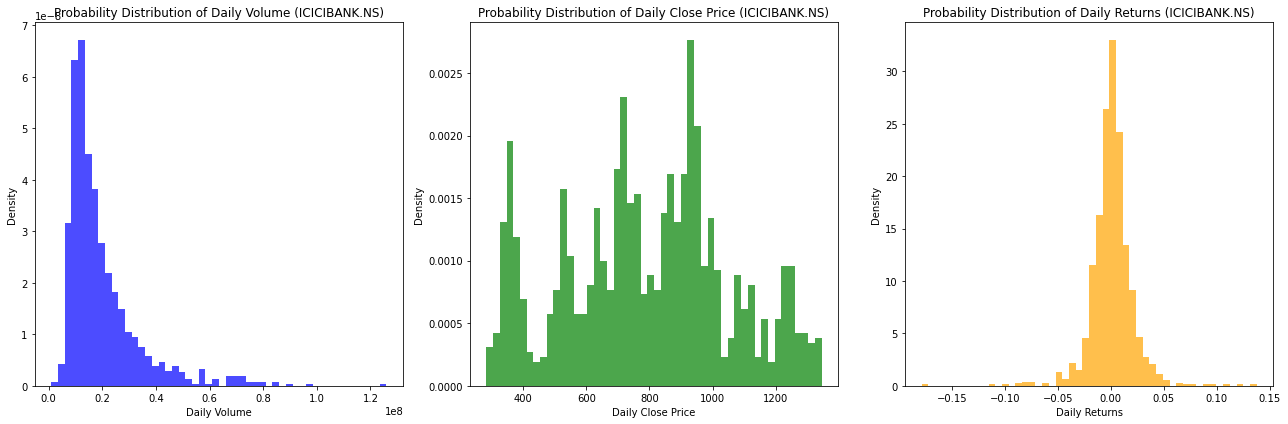

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


HINDUNILVR.NS - T-scores:
T-score for Daily Returns: 0.6589274475655301
T-score for Daily Volume: Ticker
HINDUNILVR.NS    13.73396
dtype: float64
T-score for Daily Close Price: Ticker
HINDUNILVR.NS    392.182951
dtype: float64
HINDUNILVR.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.000565257526887182, 0.0011369702746954102)
Confidence Interval for Daily Volume: (Ticker
HINDUNILVR.NS    1.839354e+06
dtype: float64, Ticker
HINDUNILVR.NS    2.452438e+06
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
HINDUNILVR.NS    2398.282867
dtype: float64, Ticker
HINDUNILVR.NS    2422.398394
dtype: float64)


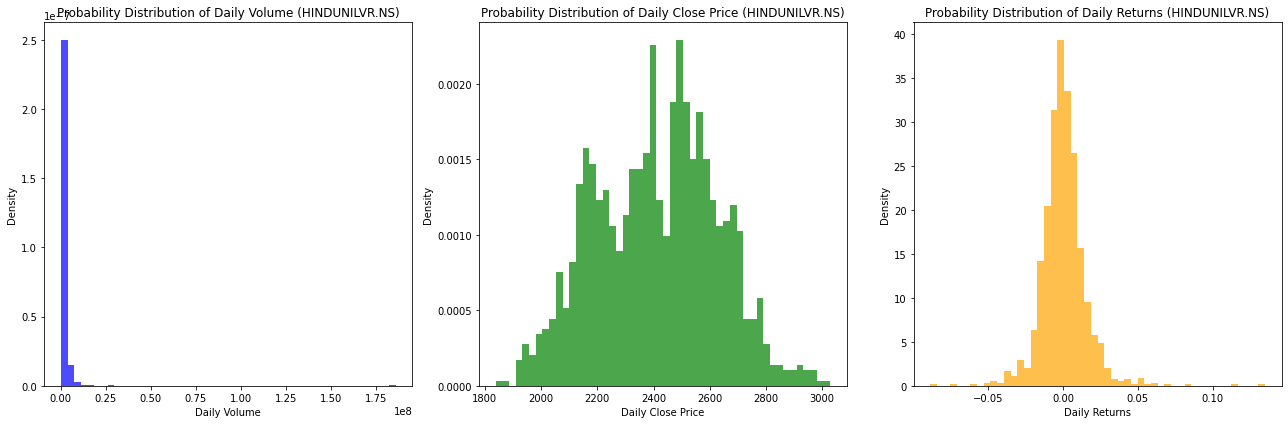

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


SBIN.NS - T-scores:
T-score for Daily Returns: 1.6613133605196495
T-score for Daily Volume: Ticker
SBIN.NS    39.944341
dtype: float64
T-score for Daily Close Price: Ticker
SBIN.NS    91.107803
dtype: float64
SBIN.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.0001794367012361059, 0.002162879444273987)
Confidence Interval for Daily Volume: (Ticker
SBIN.NS    2.787303e+07
dtype: float64, Ticker
SBIN.NS    3.075247e+07
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
SBIN.NS    490.063182
dtype: float64, Ticker
SBIN.NS    511.633559
dtype: float64)


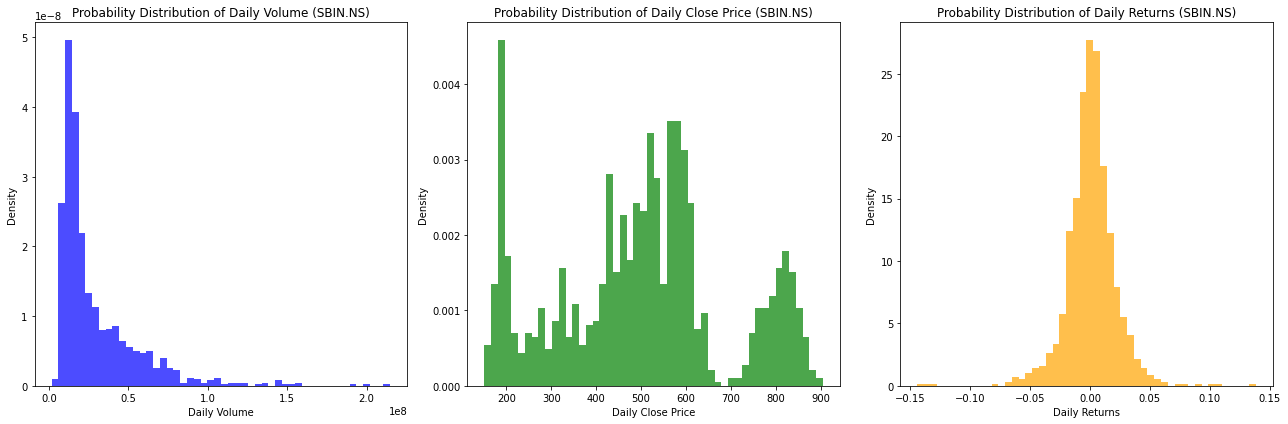

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


BAJFINANCE.NS - T-scores:
T-score for Daily Returns: 1.055509153377444
T-score for Daily Volume: Ticker
BAJFINANCE.NS    26.762541
dtype: float64
T-score for Daily Close Price: Ticker
BAJFINANCE.NS    139.514221
dtype: float64
BAJFINANCE.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.0006247065875459982, 0.0020796678045500276)
Confidence Interval for Daily Volume: (Ticker
BAJFINANCE.NS    2.255611e+06
dtype: float64, Ticker
BAJFINANCE.NS    2.612479e+06
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
BAJFINANCE.NS    5967.842819
dtype: float64, Ticker
BAJFINANCE.NS    6138.080817
dtype: float64)


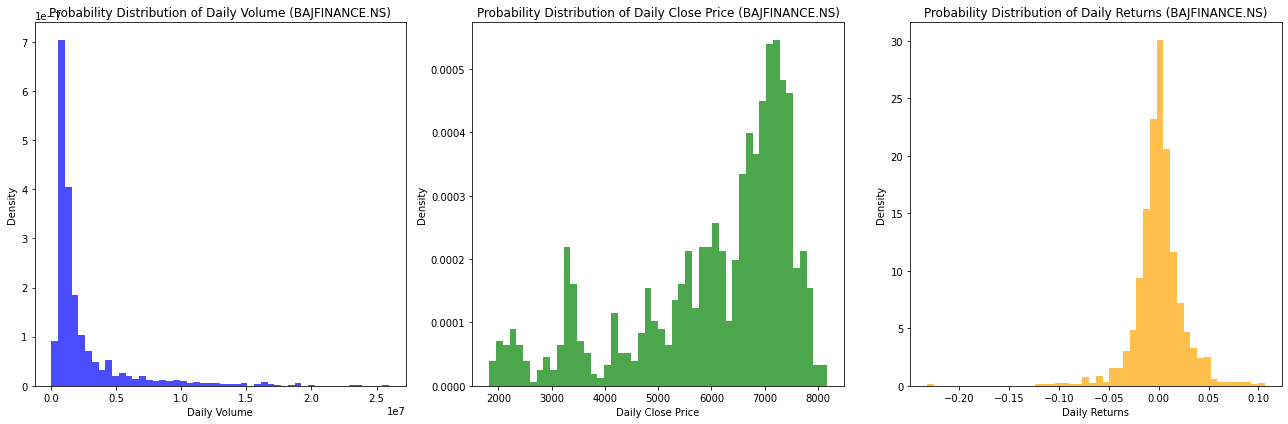

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


BHARTIARTL.NS - T-scores:
T-score for Daily Returns: 2.429408966338566
T-score for Daily Volume: Ticker
BHARTIARTL.NS    29.121479
dtype: float64
T-score for Daily Close Price: Ticker
BHARTIARTL.NS    86.199853
dtype: float64
BHARTIARTL.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (0.0002396873629138107, 0.002251394854479868)
Confidence Interval for Daily Volume: (Ticker
BHARTIARTL.NS    1.043932e+07
dtype: float64, Ticker
BHARTIARTL.NS    1.194751e+07
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
BHARTIARTL.NS    792.236478
dtype: float64, Ticker
BHARTIARTL.NS    829.138833
dtype: float64)


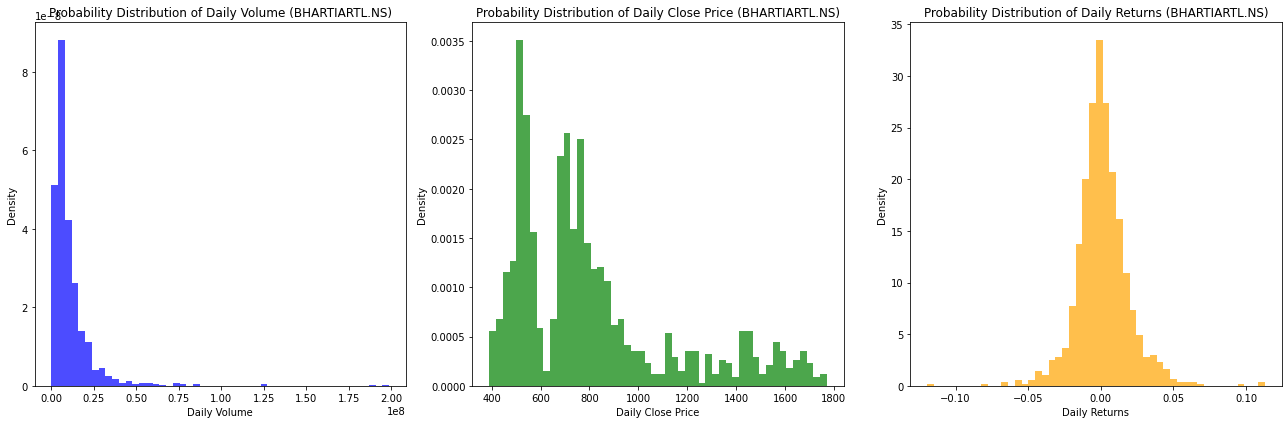

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['HDFC.NS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


HDFC.NS - T-scores:
T-score for Daily Returns: nan
T-score for Daily Volume: Ticker
HDFC.NS   NaN
dtype: float64
T-score for Daily Close Price: Ticker
HDFC.NS   NaN
dtype: float64
HDFC.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (nan, nan)
Confidence Interval for Daily Volume: (Ticker
HDFC.NS   NaN
dtype: float64, Ticker
HDFC.NS   NaN
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
HDFC.NS   NaN
dtype: float64, Ticker
HDFC.NS   NaN
dtype: float64)


C:\Users\Manan\anaconda3\lib\site-packages\numpy\lib\histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


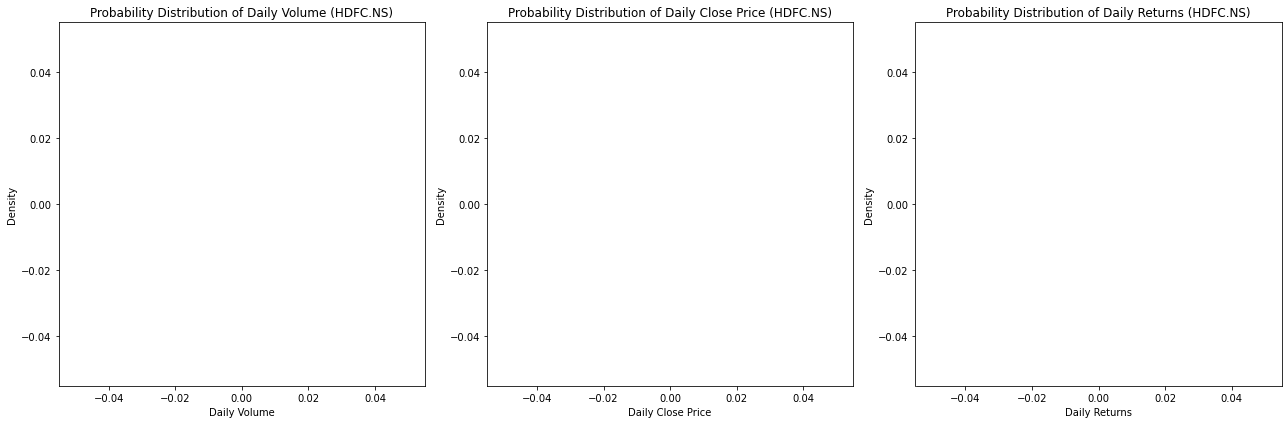

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


ITC.NS - T-scores:
T-score for Daily Returns: 1.4667148469431095
T-score for Daily Volume: Ticker
ITC.NS    44.349452
dtype: float64
T-score for Daily Close Price: Ticker
ITC.NS    97.86206
dtype: float64
ITC.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.0002336642772495165, 0.001617862455550363)
Confidence Interval for Daily Volume: (Ticker
ITC.NS    1.919255e+07
dtype: float64, Ticker
ITC.NS    2.096920e+07
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
ITC.NS    307.017645
dtype: float64, Ticker
ITC.NS    319.579421
dtype: float64)


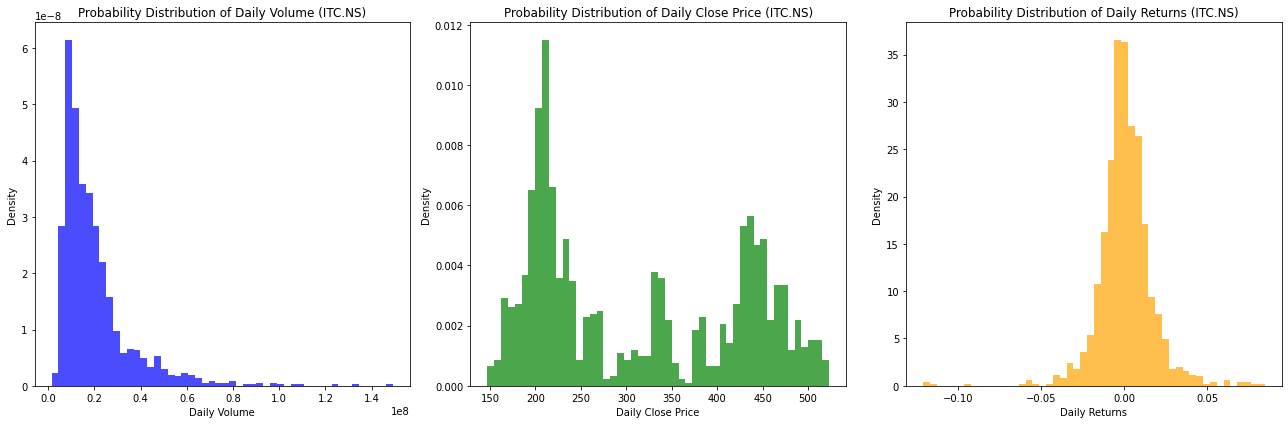

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


KOTAKBANK.NS - T-scores:
T-score for Daily Returns: 0.44252411467351493
T-score for Daily Volume: Ticker
KOTAKBANK.NS    33.009275
dtype: float64
T-score for Daily Close Price: Ticker
KOTAKBANK.NS    314.678372
dtype: float64
KOTAKBANK.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.000805657549720953, 0.0012749585709358553)
Confidence Interval for Daily Volume: (Ticker
KOTAKBANK.NS    4.114149e+06
dtype: float64, Ticker
KOTAKBANK.NS    4.634100e+06
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
KOTAKBANK.NS    1735.252763
dtype: float64, Ticker
KOTAKBANK.NS    1757.025801
dtype: float64)


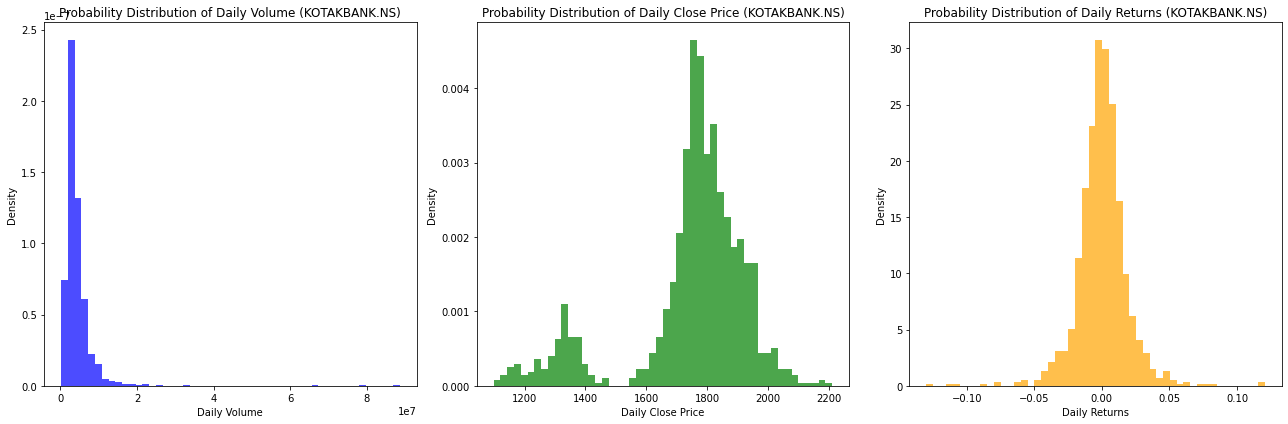

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


LT.NS - T-scores:
T-score for Daily Returns: 2.033126677077736
T-score for Daily Volume: Ticker
LT.NS    47.553757
dtype: float64
T-score for Daily Close Price: Ticker
LT.NS    80.677889
dtype: float64
LT.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (3.690671423582062e-05, 0.0020701288051340914)
Confidence Interval for Daily Volume: (Ticker
LT.NS    2.863058e+06
dtype: float64, Ticker
LT.NS    3.109464e+06
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
LT.NS    2049.003916
dtype: float64, Ticker
LT.NS    2151.141806
dtype: float64)


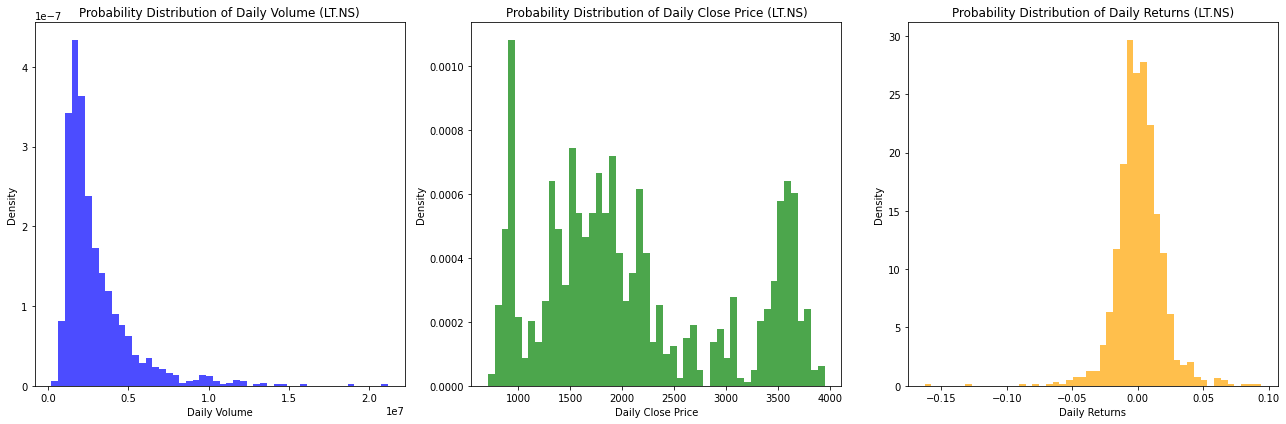

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


ASIANPAINT.NS - T-scores:
T-score for Daily Returns: 0.8004876286377121
T-score for Daily Volume: Ticker
ASIANPAINT.NS    47.558191
dtype: float64
T-score for Daily Close Price: Ticker
ASIANPAINT.NS    185.595366
dtype: float64
ASIANPAINT.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.0005471382111270341, 0.0013013517348344087)
Confidence Interval for Daily Volume: (Ticker
ASIANPAINT.NS    1.439104e+06
dtype: float64, Ticker
ASIANPAINT.NS    1.562946e+06
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
ASIANPAINT.NS    2762.167785
dtype: float64, Ticker
ASIANPAINT.NS    2821.18861
dtype: float64)


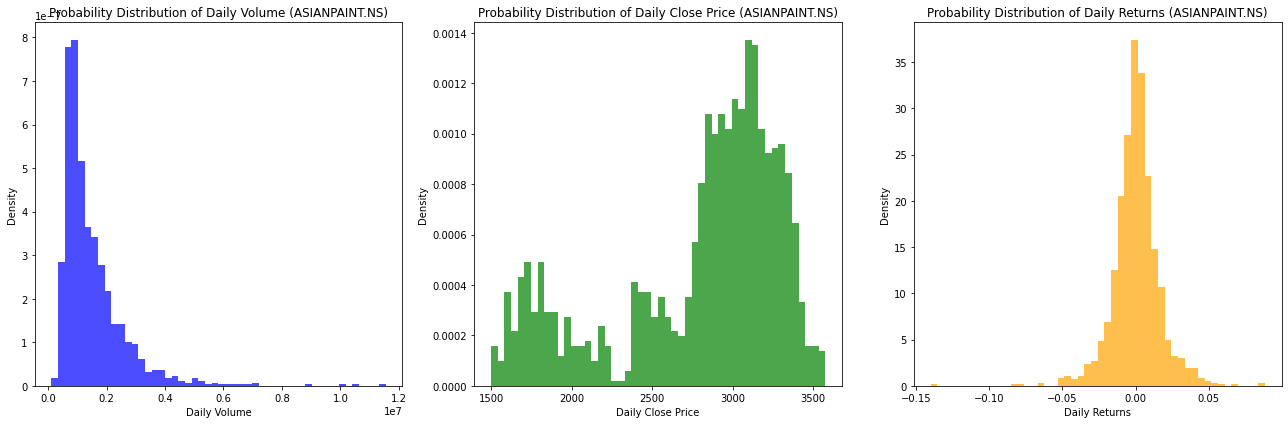

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


AXISBANK.NS - T-scores:
T-score for Daily Returns: 0.9414753224604044
T-score for Daily Volume: Ticker
AXISBANK.NS    43.016518
dtype: float64
T-score for Daily Close Price: Ticker
AXISBANK.NS    124.915828
dtype: float64
AXISBANK.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.0006742572149962927, 0.001918435331595805)
Confidence Interval for Daily Volume: (Ticker
AXISBANK.NS    1.341796e+07
dtype: float64, Ticker
AXISBANK.NS    1.470039e+07
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
AXISBANK.NS    805.212954
dtype: float64, Ticker
AXISBANK.NS    830.909539
dtype: float64)


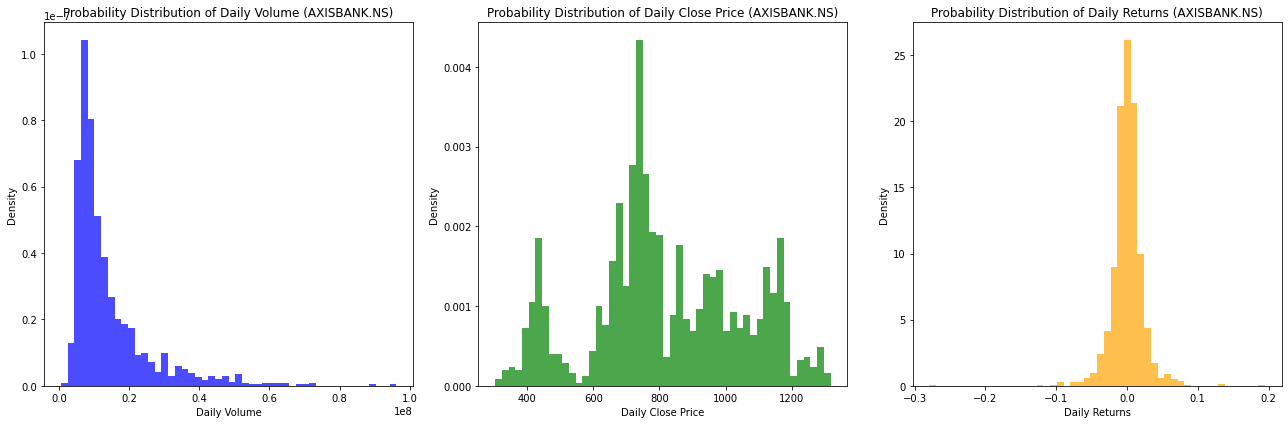

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


DMART.NS - T-scores:
T-score for Daily Returns: 1.3521797865313145
T-score for Daily Volume: Ticker
DMART.NS    37.841047
dtype: float64
T-score for Daily Close Price: Ticker
DMART.NS    144.338165
dtype: float64
DMART.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.0003404163646814765, 0.0018502967792129914)
Confidence Interval for Daily Volume: (Ticker
DMART.NS    475103.918789
dtype: float64, Ticker
DMART.NS    527062.055131
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
DMART.NS    3545.613974
dtype: float64, Ticker
DMART.NS    3643.3289
dtype: float64)


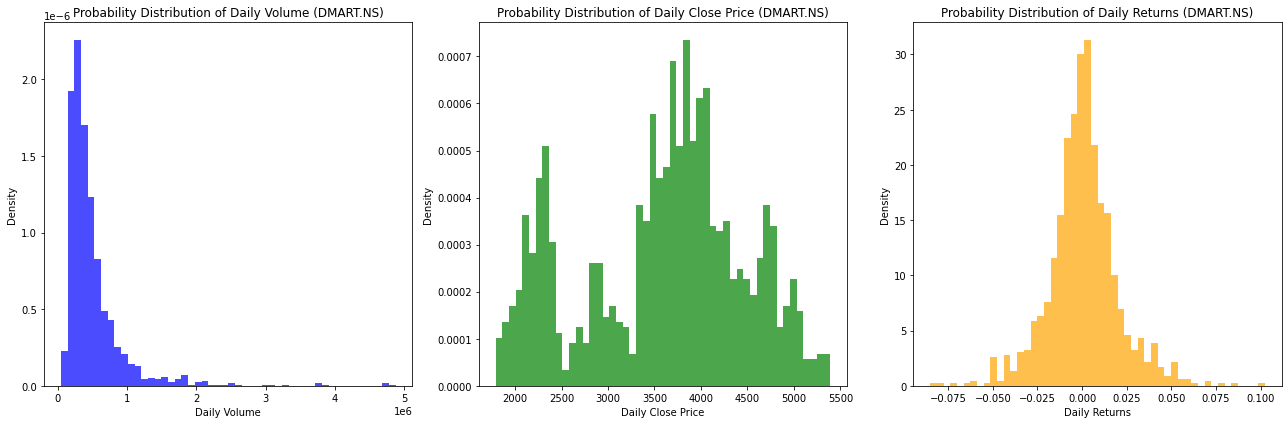

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


MARUTI.NS - T-scores:
T-score for Daily Returns: 0.9837282071912983
T-score for Daily Volume: Ticker
MARUTI.NS    51.61923
dtype: float64
T-score for Daily Close Price: Ticker
MARUTI.NS    147.864398
dtype: float64
MARUTI.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.0005309423934477094, 0.0015988564823468153)
Confidence Interval for Daily Volume: (Ticker
MARUTI.NS    752054.593968
dtype: float64, Ticker
MARUTI.NS    811480.123229
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
MARUTI.NS    8523.997231
dtype: float64, Ticker
MARUTI.NS    8753.235764
dtype: float64)


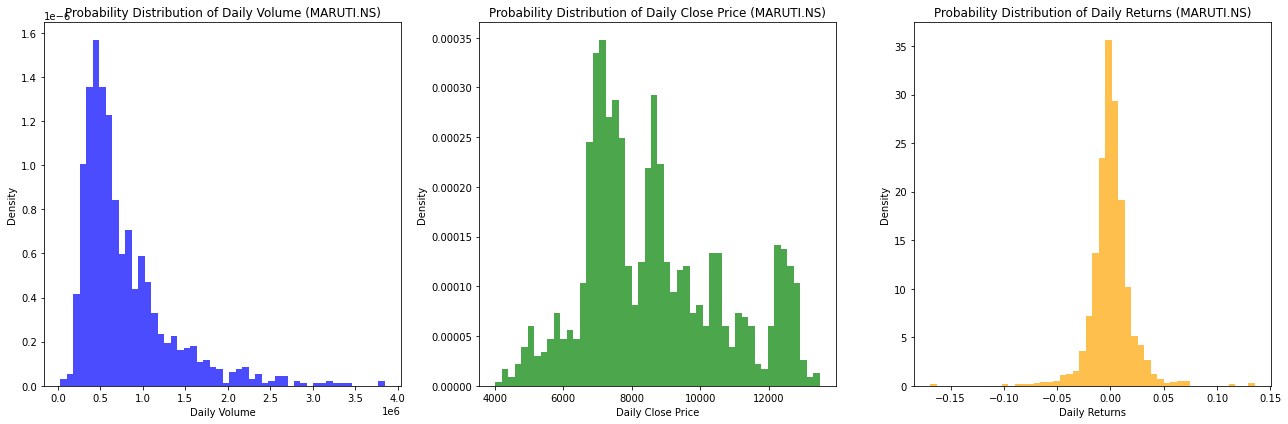

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


SUNPHARMA.NS - T-scores:
T-score for Daily Returns: 2.806213713068824
T-score for Daily Volume: Ticker
SUNPHARMA.NS    33.765076
dtype: float64
T-score for Daily Close Price: Ticker
SUNPHARMA.NS    82.915642
dtype: float64
SUNPHARMA.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (0.0003900657980088452, 0.002202835643815365)
Confidence Interval for Daily Volume: (Ticker
SUNPHARMA.NS    4.508088e+06
dtype: float64, Ticker
SUNPHARMA.NS    5.064285e+06
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
SUNPHARMA.NS    927.835769
dtype: float64, Ticker
SUNPHARMA.NS    972.807669
dtype: float64)


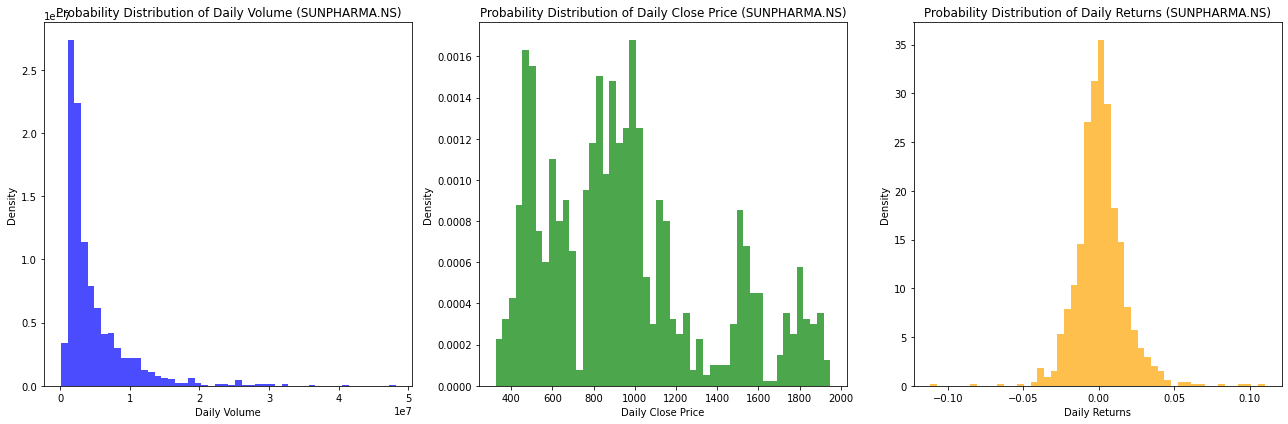

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


ULTRACEMCO.NS - T-scores:
T-score for Daily Returns: 2.0879222911278985
T-score for Daily Volume: Ticker
ULTRACEMCO.NS    49.524992
dtype: float64
T-score for Daily Close Price: Ticker
ULTRACEMCO.NS    113.225836
dtype: float64
ULTRACEMCO.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (6.287862960239641e-05, 0.0020206925682498154)
Confidence Interval for Daily Volume: (Ticker
ULTRACEMCO.NS    433079.748698
dtype: float64, Ticker
ULTRACEMCO.NS    468807.431416
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
ULTRACEMCO.NS    7101.661502
dtype: float64, Ticker
ULTRACEMCO.NS    7352.106638
dtype: float64)


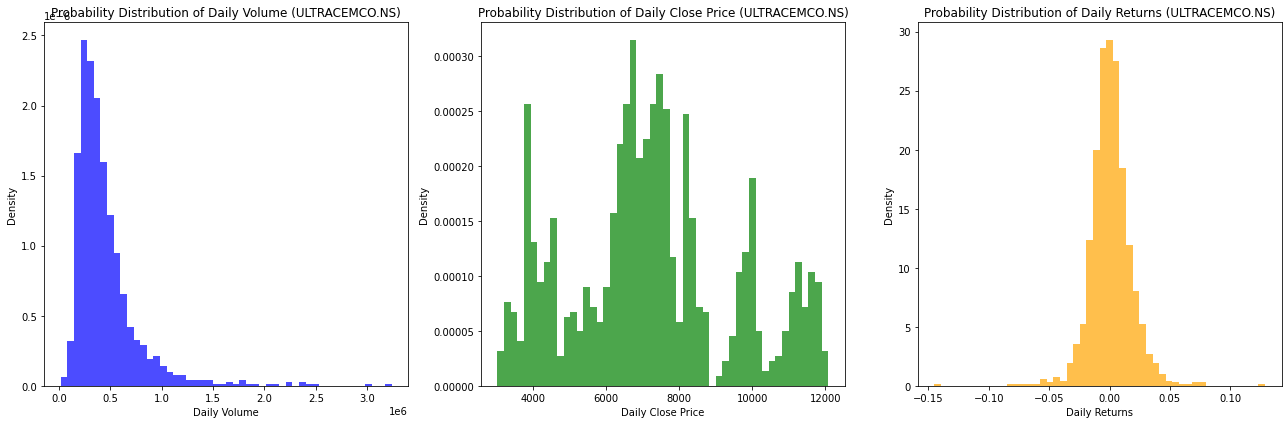

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


TITAN.NS - T-scores:
T-score for Daily Returns: 2.056963344313275
T-score for Daily Volume: Ticker
TITAN.NS    42.14824
dtype: float64
T-score for Daily Close Price: Ticker
TITAN.NS    94.62436
dtype: float64
TITAN.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (4.9604092690437975e-05, 0.0020970990979396276)
Confidence Interval for Daily Volume: (Ticker
TITAN.NS    1.641514e+06
dtype: float64, Ticker
TITAN.NS    1.801792e+06
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
TITAN.NS    2304.421133
dtype: float64, Ticker
TITAN.NS    2402.00209
dtype: float64)


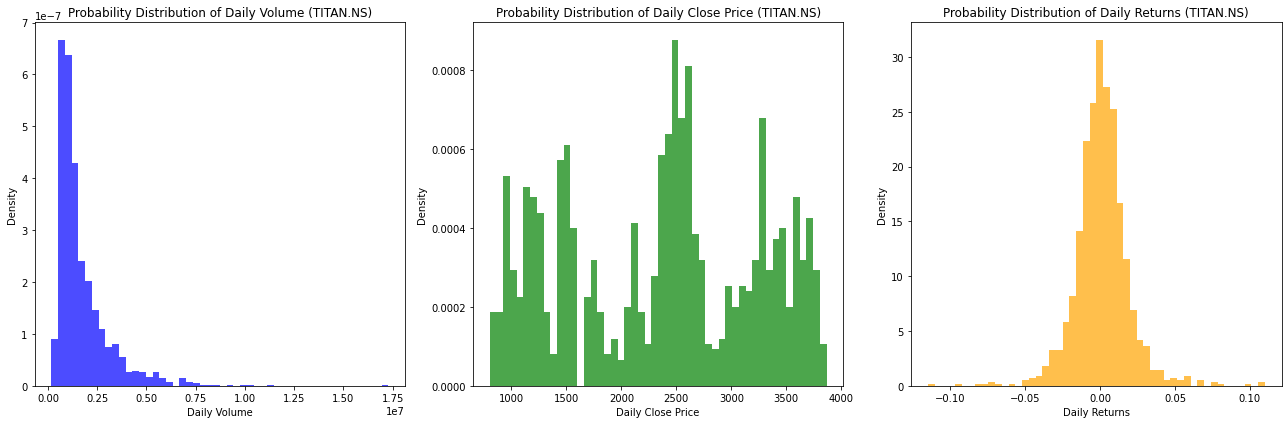

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


NESTLEIND.NS - T-scores:
T-score for Daily Returns: 1.096552322866325
T-score for Daily Volume: Ticker
NESTLEIND.NS    45.916992
dtype: float64
T-score for Daily Close Price: Ticker
NESTLEIND.NS    213.478428
dtype: float64
NESTLEIND.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.00035024787471100007, 0.0012379004541532381)
Confidence Interval for Daily Volume: (Ticker
NESTLEIND.NS    860126.33874
dtype: float64, Ticker
NESTLEIND.NS    936908.459956
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
NESTLEIND.NS    1975.056026
dtype: float64, Ticker
NESTLEIND.NS    2011.694903
dtype: float64)


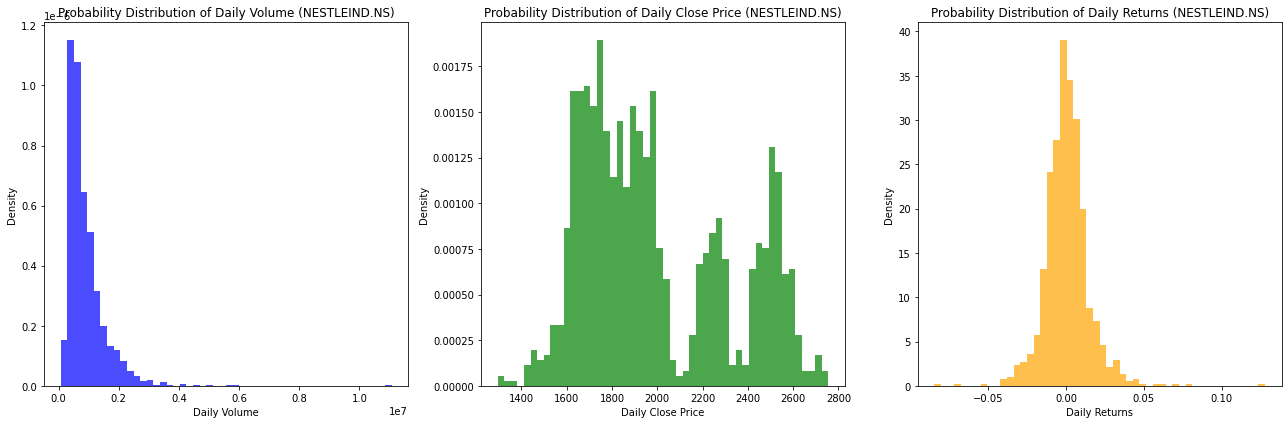

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


WIPRO.NS - T-scores:
T-score for Daily Returns: 1.737176618737467
T-score for Daily Volume: Ticker
WIPRO.NS    32.289854
dtype: float64
T-score for Daily Close Price: Ticker
WIPRO.NS    125.248685
dtype: float64
WIPRO.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.00011874651448925315, 0.0019546164696237957)
Confidence Interval for Daily Volume: (Ticker
WIPRO.NS    1.602858e+07
dtype: float64, Ticker
WIPRO.NS    1.810234e+07
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
WIPRO.NS    216.257226
dtype: float64, Ticker
WIPRO.NS    223.139963
dtype: float64)


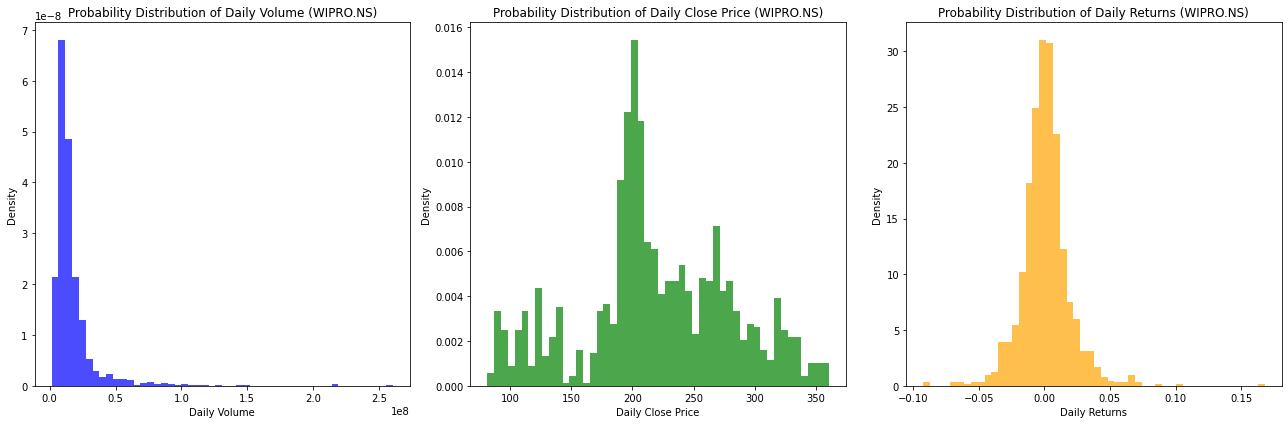

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


M&M.NS - T-scores:
T-score for Daily Returns: 2.695352940267232
T-score for Daily Volume: Ticker
M&M.NS    48.878333
dtype: float64
T-score for Daily Close Price: Ticker
M&M.NS    61.618767
dtype: float64
M&M.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (0.0004507030812970329, 0.0028618690230453794)
Confidence Interval for Daily Volume: (Ticker
M&M.NS    3.823399e+06
dtype: float64, Ticker
M&M.NS    4.143165e+06
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
M&M.NS    1211.841728
dtype: float64, Ticker
M&M.NS    1291.548002
dtype: float64)


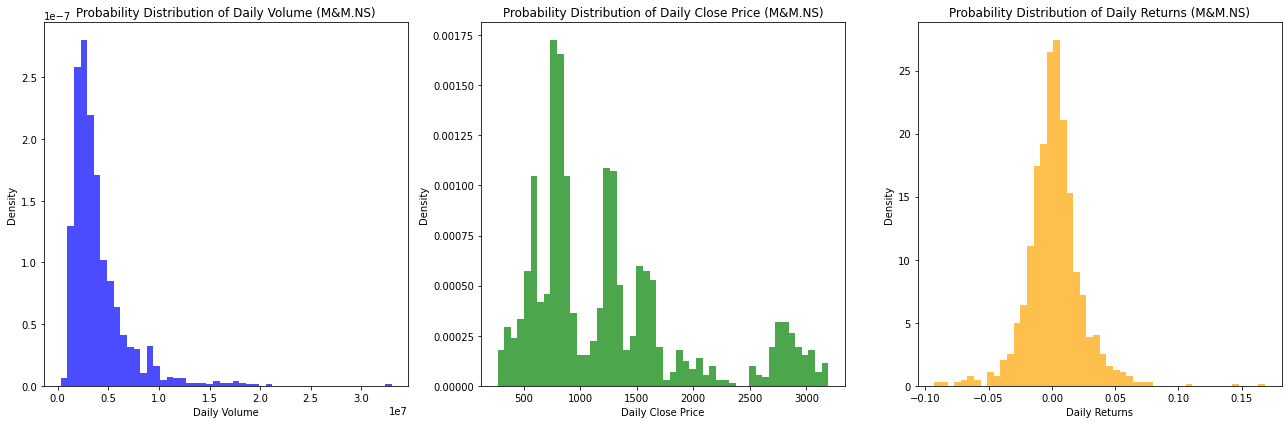

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


ONGC.NS - T-scores:
T-score for Daily Returns: 1.2321788448960695
T-score for Daily Volume: Ticker
ONGC.NS    41.92583
dtype: float64
T-score for Daily Close Price: Ticker
ONGC.NS    82.288917
dtype: float64
ONGC.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.0005166298169435625, 0.0022613461927688577)
Confidence Interval for Daily Volume: (Ticker
ONGC.NS    2.003107e+07
dtype: float64, Ticker
ONGC.NS    2.199780e+07
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
ONGC.NS    155.022742
dtype: float64, Ticker
ONGC.NS    162.595269
dtype: float64)


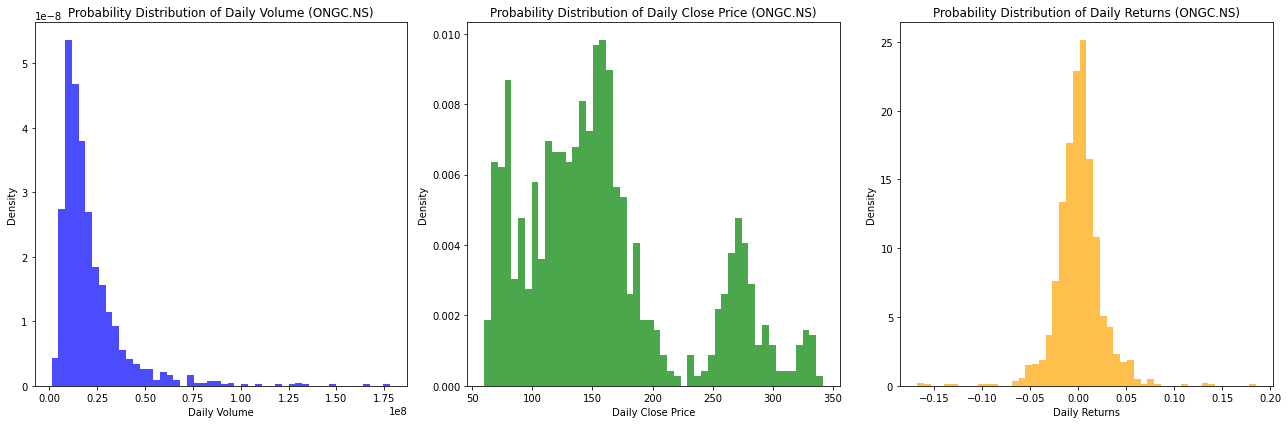

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


JSWSTEEL.NS - T-scores:
T-score for Daily Returns: 2.0624965440855227
T-score for Daily Volume: Ticker
JSWSTEEL.NS    34.860671
dtype: float64
T-score for Daily Close Price: Ticker
JSWSTEEL.NS    96.40579
dtype: float64
JSWSTEEL.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (6.499169177224683e-05, 0.0026000771461075533)
Confidence Interval for Daily Volume: (Ticker
JSWSTEEL.NS    5.135519e+06
dtype: float64, Ticker
JSWSTEEL.NS    5.748026e+06
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
JSWSTEEL.NS    620.335495
dtype: float64, Ticker
JSWSTEEL.NS    646.108189
dtype: float64)


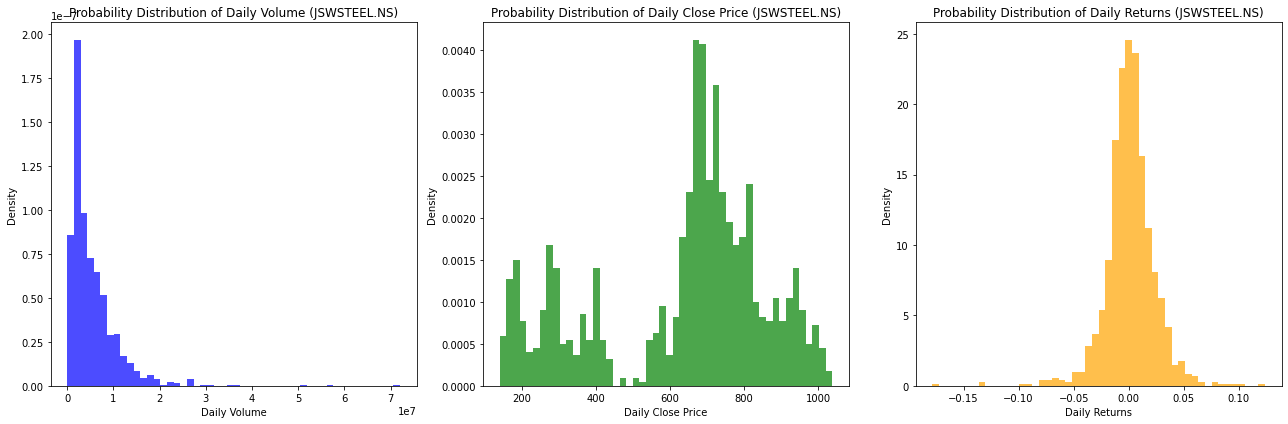

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


TECHM.NS - T-scores:
T-score for Daily Returns: 1.5933512502481348
T-score for Daily Volume: Ticker
TECHM.NS    50.649186
dtype: float64
T-score for Daily Close Price: Ticker
TECHM.NS    131.459259
dtype: float64
TECHM.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.0002068237337436552, 0.0019951390965848043)
Confidence Interval for Daily Volume: (Ticker
TECHM.NS    3.064053e+06
dtype: float64, Ticker
TECHM.NS    3.310990e+06
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
TECHM.NS    1124.097937
dtype: float64, Ticker
TECHM.NS    1158.15838
dtype: float64)


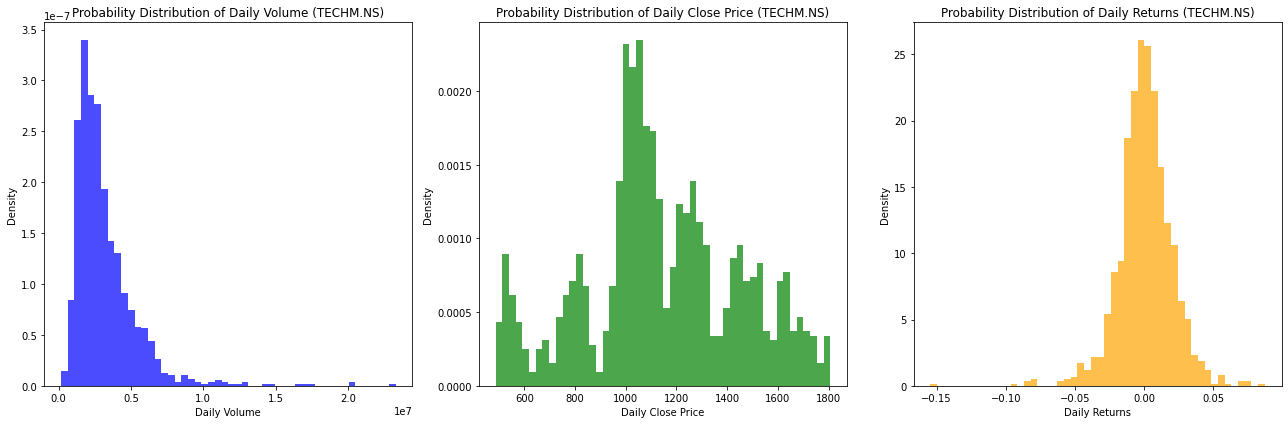

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


POWERGRID.NS - T-scores:
T-score for Daily Returns: 2.0585190395632895
T-score for Daily Volume: Ticker
POWERGRID.NS    44.031428
dtype: float64
T-score for Daily Close Price: Ticker
POWERGRID.NS    84.026877
dtype: float64
POWERGRID.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (5.037460309269097e-05, 0.002096193439081487)
Confidence Interval for Daily Volume: (Ticker
POWERGRID.NS    1.712928e+07
dtype: float64, Ticker
POWERGRID.NS    1.872692e+07
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
POWERGRID.NS    172.176311
dtype: float64, Ticker
POWERGRID.NS    180.408638
dtype: float64)


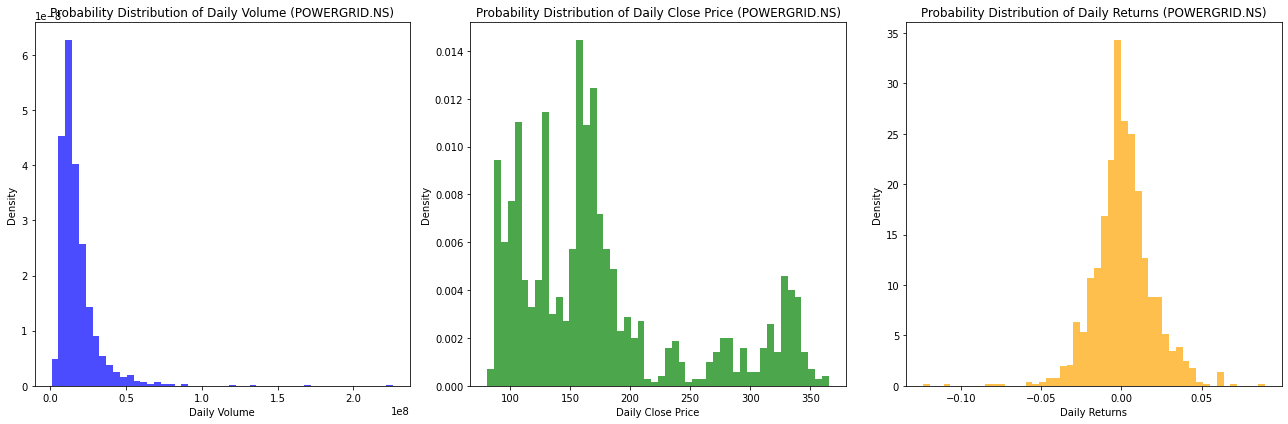

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


TATASTEEL.NS - T-scores:
T-score for Daily Returns: 1.8077263880486512
T-score for Daily Volume: Ticker
TATASTEEL.NS    41.787891
dtype: float64
T-score for Daily Close Price: Ticker
TATASTEEL.NS    91.699868
dtype: float64
TATASTEEL.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.00010481221757841354, 0.0025626756812117063)
Confidence Interval for Daily Volume: (Ticker
TATASTEEL.NS    9.125205e+07
dtype: float64, Ticker
TATASTEEL.NS    1.002425e+08
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
TATASTEEL.NS    103.338503
dtype: float64, Ticker
TATASTEEL.NS    107.85699
dtype: float64)


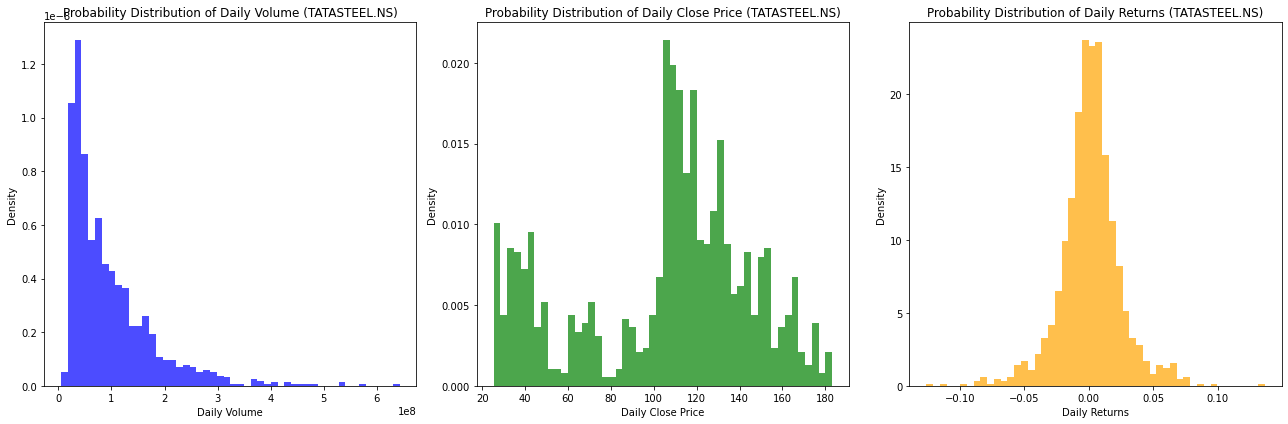

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


NTPC.NS - T-scores:
T-score for Daily Returns: 1.977897677503432
T-score for Daily Volume: Ticker
NTPC.NS    43.637275
dtype: float64
T-score for Daily Close Price: Ticker
NTPC.NS    64.887624
dtype: float64
NTPC.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (8.525777976802233e-06, 0.002099988064624663)
Confidence Interval for Daily Volume: (Ticker
NTPC.NS    1.730823e+07
dtype: float64, Ticker
NTPC.NS    1.893783e+07
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
NTPC.NS    180.440518
dtype: float64, Ticker
NTPC.NS    191.692082
dtype: float64)


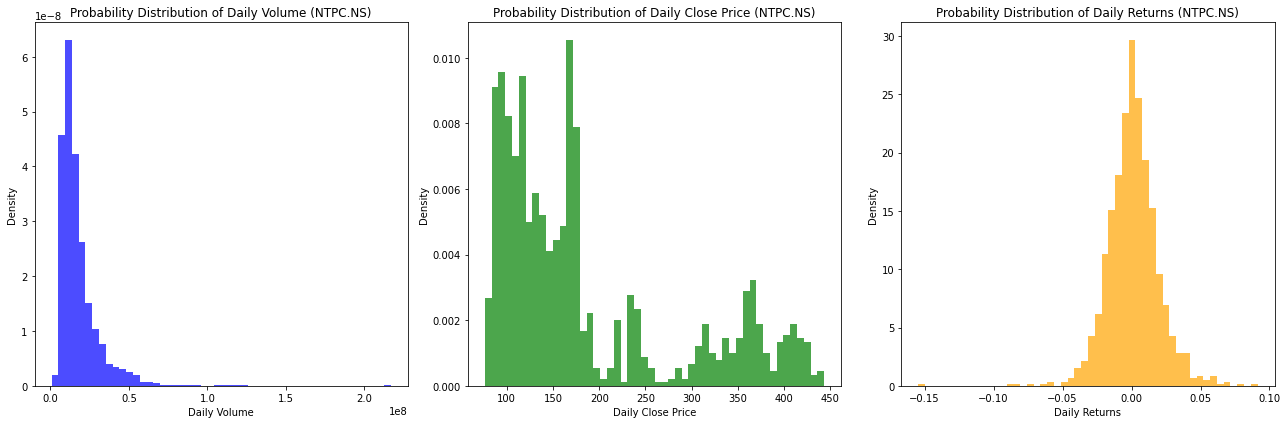

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


SBILIFE.NS - T-scores:
T-score for Daily Returns: 0.927706036476897
T-score for Daily Volume: Ticker
SBILIFE.NS    37.334422
dtype: float64
T-score for Daily Close Price: Ticker
SBILIFE.NS    153.187552
dtype: float64
SBILIFE.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.0005210256813514599, 0.0014557778810321833)
Confidence Interval for Daily Volume: (Ticker
SBILIFE.NS    1.383678e+06
dtype: float64, Ticker
SBILIFE.NS    1.537167e+06
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
SBILIFE.NS    1156.248985
dtype: float64, Ticker
SBILIFE.NS    1186.249793
dtype: float64)


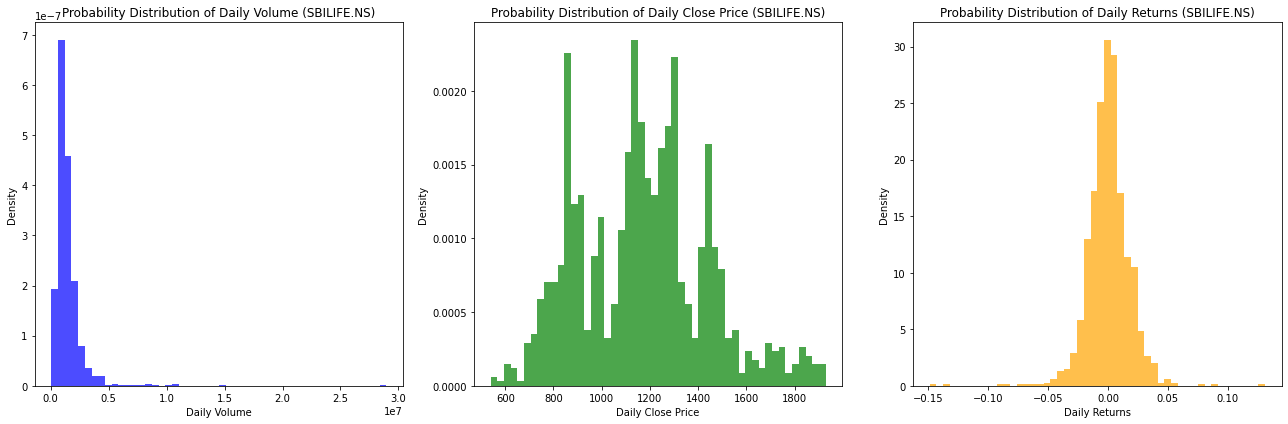

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


ADANIENT.NS - T-scores:
T-score for Daily Returns: 2.6999077099441307
T-score for Daily Volume: Ticker
ADANIENT.NS    29.72404
dtype: float64
T-score for Daily Close Price: Ticker
ADANIENT.NS    59.107433
dtype: float64
ADANIENT.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (0.0007207286032491938, 0.004552677225619314)
Confidence Interval for Daily Volume: (Ticker
ADANIENT.NS    4.111859e+06
dtype: float64, Ticker
ADANIENT.NS    4.693014e+06
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
ADANIENT.NS    1839.931452
dtype: float64, Ticker
ADANIENT.NS    1966.267245
dtype: float64)


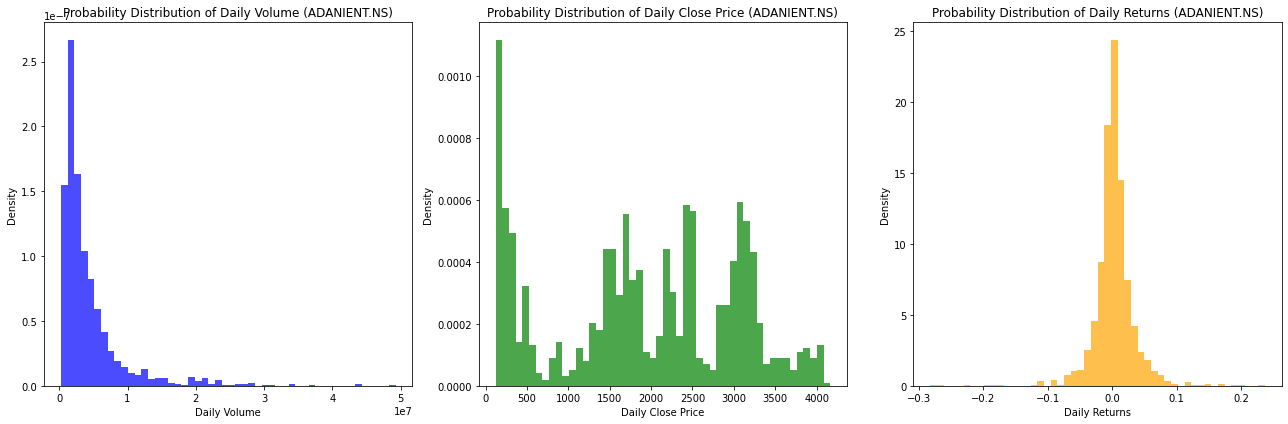

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


ADANIGREEN.NS - T-scores:
T-score for Daily Returns: 2.2031109615232856
T-score for Daily Volume: Ticker
ADANIGREEN.NS    20.42868
dtype: float64
T-score for Daily Close Price: Ticker
ADANIGREEN.NS    71.467674
dtype: float64
ADANIGREEN.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (0.00023682680247103524, 0.004089352609491498)
Confidence Interval for Daily Volume: (Ticker
ADANIGREEN.NS    1.694721e+06
dtype: float64, Ticker
ADANIGREEN.NS    2.054814e+06
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
ADANIGREEN.NS    1257.594511
dtype: float64, Ticker
ADANIGREEN.NS    1328.589353
dtype: float64)


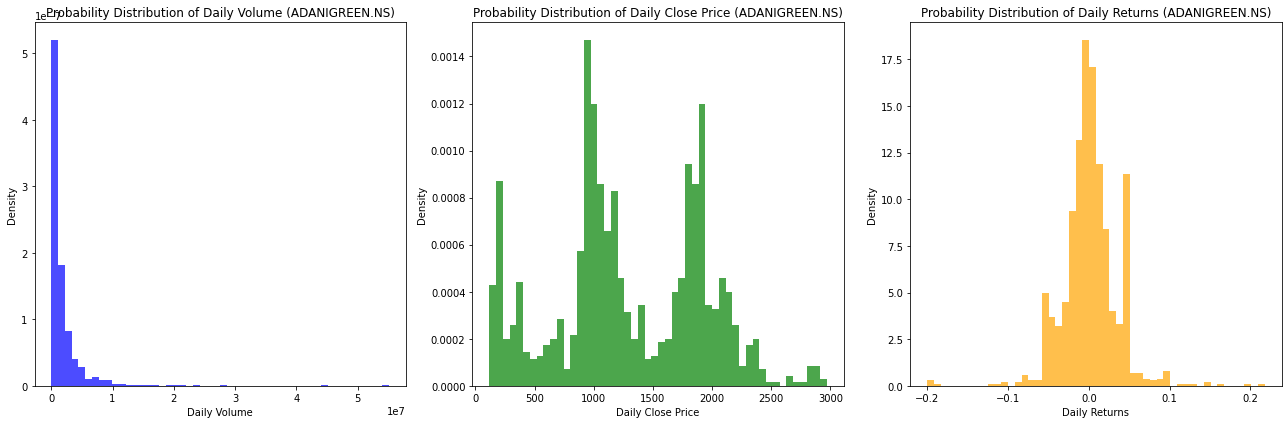

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


ADANIPORTS.NS - T-scores:
T-score for Daily Returns: 1.7824906133455798
T-score for Daily Volume: Ticker
ADANIPORTS.NS    27.704547
dtype: float64
T-score for Daily Close Price: Ticker
ADANIPORTS.NS    82.513588
dtype: float64
ADANIPORTS.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.00013421410883735331, 0.0028010998688604845)
Confidence Interval for Daily Volume: (Ticker
ADANIPORTS.NS    6.965057e+06
dtype: float64, Ticker
ADANIPORTS.NS    8.026700e+06
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
ADANIPORTS.NS    766.87818
dtype: float64, Ticker
ADANIPORTS.NS    804.234044
dtype: float64)


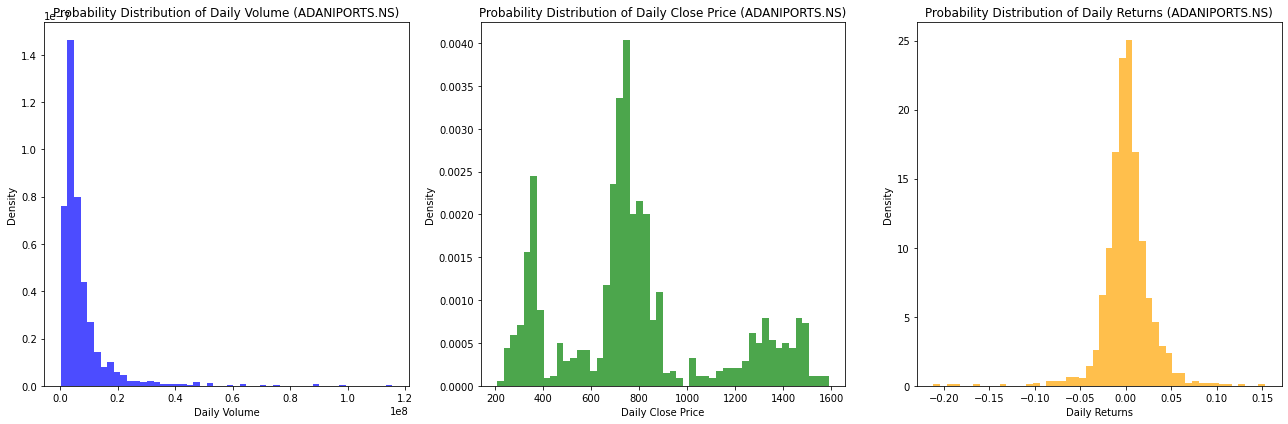

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


BAJAJ-AUTO.NS - T-scores:
T-score for Daily Returns: 2.019654279334835
T-score for Daily Volume: Ticker
BAJAJ-AUTO.NS    41.176173
dtype: float64
T-score for Daily Close Price: Ticker
BAJAJ-AUTO.NS    71.082203
dtype: float64
BAJAJ-AUTO.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (2.8974030768856183e-05, 0.001997541499384663)
Confidence Interval for Daily Volume: (Ticker
BAJAJ-AUTO.NS    531681.788596
dtype: float64, Ticker
BAJAJ-AUTO.NS    584882.160875
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
BAJAJ-AUTO.NS    4701.324975
dtype: float64, Ticker
BAJAJ-AUTO.NS    4968.208456
dtype: float64)


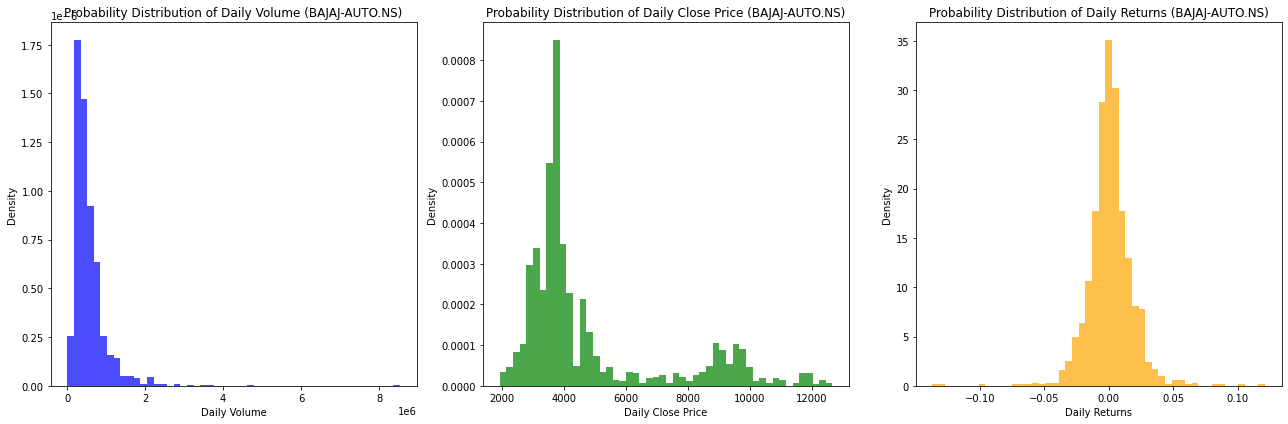

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


BPCL.NS - T-scores:
T-score for Daily Returns: 0.6526452815314117
T-score for Daily Volume: Ticker
BPCL.NS    31.33516
dtype: float64
T-score for Daily Close Price: Ticker
BPCL.NS    139.828528
dtype: float64
BPCL.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.0008209997550551666, 0.0016395121811901441)
Confidence Interval for Daily Volume: (Ticker
BPCL.NS    1.285345e+07
dtype: float64, Ticker
BPCL.NS    1.457047e+07
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
BPCL.NS    210.593326
dtype: float64, Ticker
BPCL.NS    216.586992
dtype: float64)


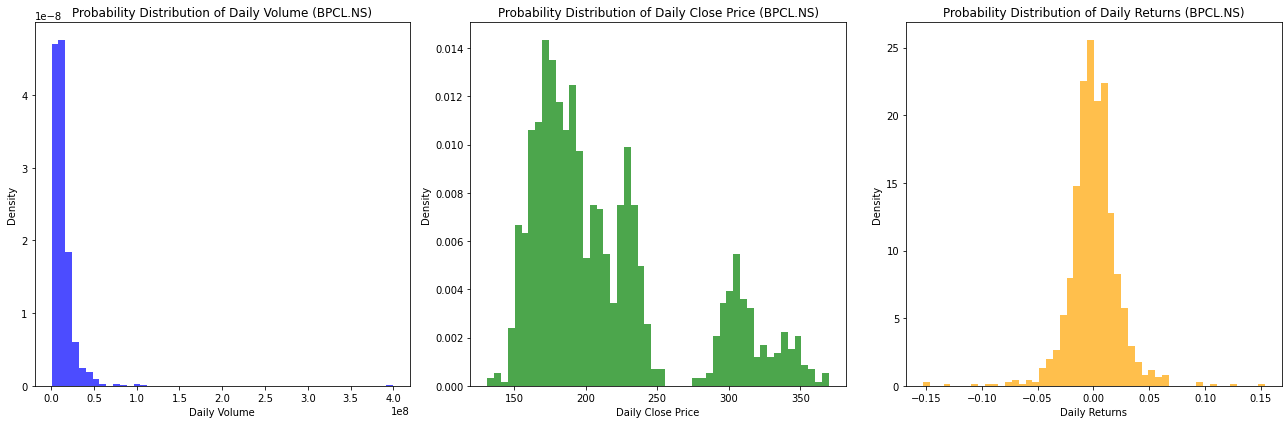

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


BRITANNIA.NS - T-scores:
T-score for Daily Returns: 1.140259902854475
T-score for Daily Volume: Ticker
BRITANNIA.NS    38.502504
dtype: float64
T-score for Daily Close Price: Ticker
BRITANNIA.NS    177.640746
dtype: float64
BRITANNIA.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.0003589638927410211, 0.00135529046430008)
Confidence Interval for Daily Volume: (Ticker
BRITANNIA.NS    436941.38692
dtype: float64, Ticker
BRITANNIA.NS    483861.010798
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
BRITANNIA.NS    4071.113339
dtype: float64, Ticker
BRITANNIA.NS    4162.041995
dtype: float64)


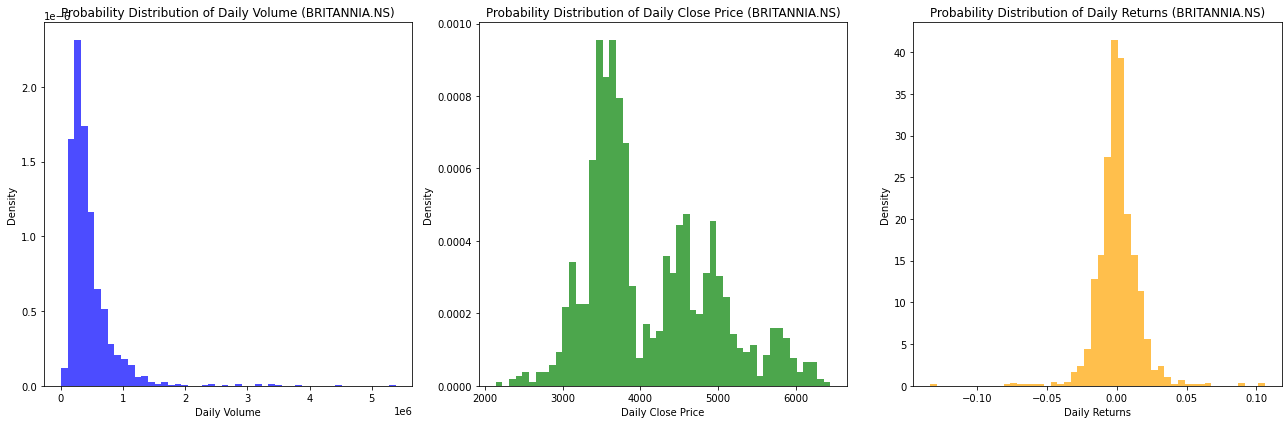

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


CIPLA.NS - T-scores:
T-score for Daily Returns: 2.11458542567443
T-score for Daily Volume: Ticker
CIPLA.NS    30.602328
dtype: float64
T-score for Daily Close Price: Ticker
CIPLA.NS    120.67205
dtype: float64
CIPLA.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (7.649274392407192e-05, 0.002042281840084906)
Confidence Interval for Daily Volume: (Ticker
CIPLA.NS    3.212829e+06
dtype: float64, Ticker
CIPLA.NS    3.652994e+06
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
CIPLA.NS    1000.605797
dtype: float64, Ticker
CIPLA.NS    1033.679454
dtype: float64)


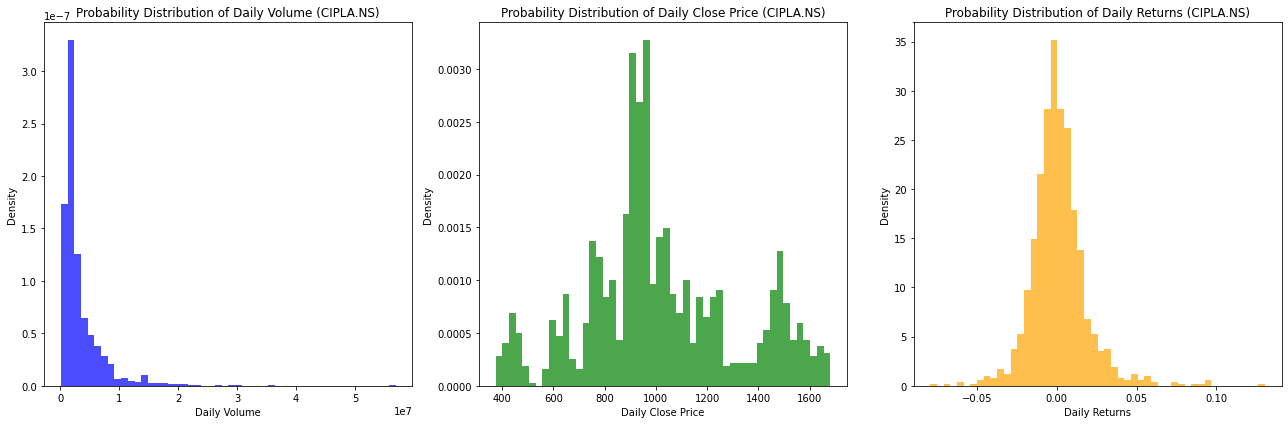

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


COALINDIA.NS - T-scores:
T-score for Daily Returns: 1.2584741892516162
T-score for Daily Volume: Ticker
COALINDIA.NS    46.180578
dtype: float64
T-score for Daily Close Price: Ticker
COALINDIA.NS    69.627754
dtype: float64
COALINDIA.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.00042918260299042296, 0.001964848101632553)
Confidence Interval for Daily Volume: (Ticker
COALINDIA.NS    1.201359e+07
dtype: float64, Ticker
COALINDIA.NS    1.307963e+07
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
COALINDIA.NS    232.523346
dtype: float64, Ticker
COALINDIA.NS    246.00689
dtype: float64)


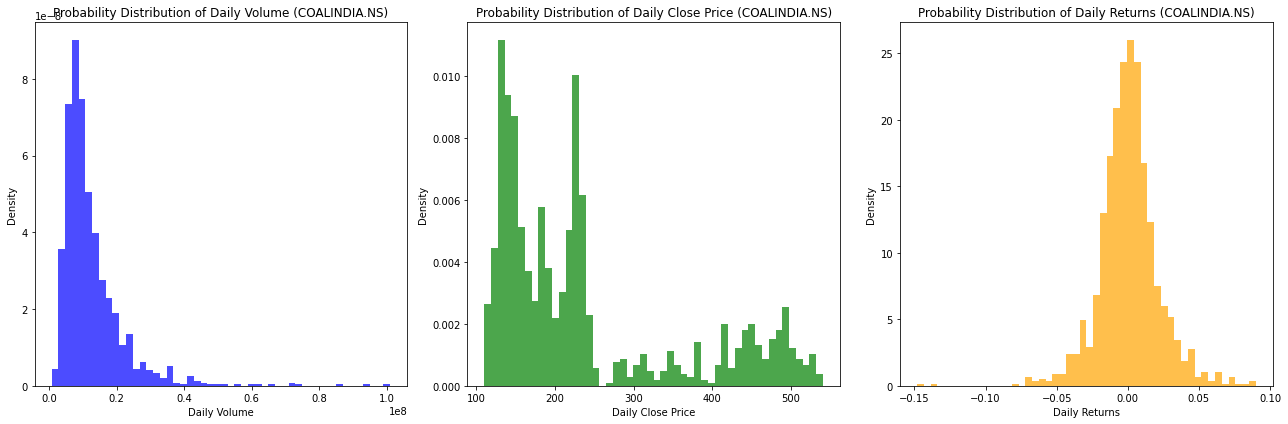

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


DIVISLAB.NS - T-scores:
T-score for Daily Returns: 2.1308099587987277
T-score for Daily Volume: Ticker
DIVISLAB.NS    36.503473
dtype: float64
T-score for Daily Close Price: Ticker
DIVISLAB.NS    144.413743
dtype: float64
DIVISLAB.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (8.950319963245954e-05, 0.0021687062865376576)
Confidence Interval for Daily Volume: (Ticker
DIVISLAB.NS    637907.135236
dtype: float64, Ticker
DIVISLAB.NS    710371.151643
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
DIVISLAB.NS    3722.300872
dtype: float64, Ticker
DIVISLAB.NS    3824.830753
dtype: float64)


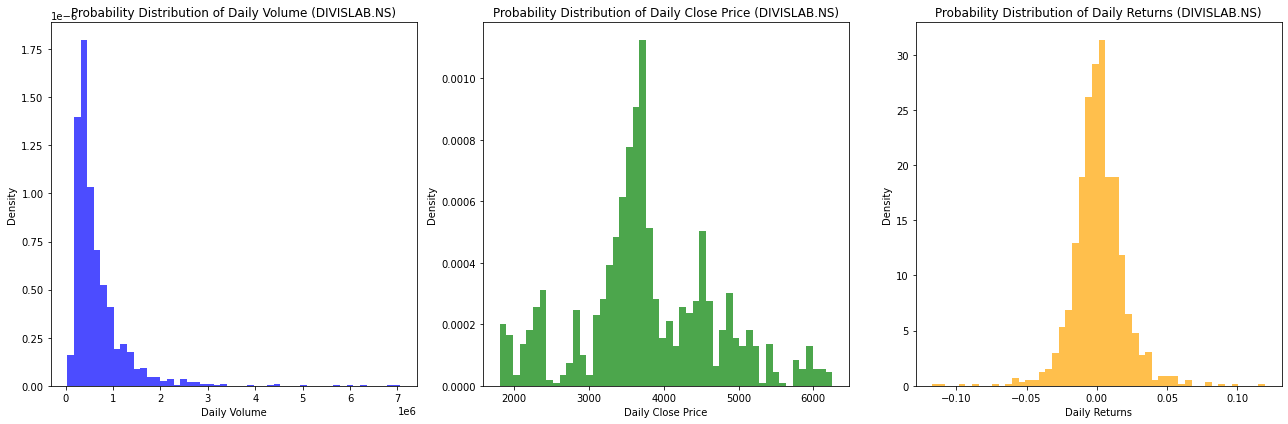

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


DRREDDY.NS - T-scores:
T-score for Daily Returns: 1.6549995051679887
T-score for Daily Volume: Ticker
DRREDDY.NS    24.837582
dtype: float64
T-score for Daily Close Price: Ticker
DRREDDY.NS    189.056717
dtype: float64
DRREDDY.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.00014039500933542227, 0.001654578575010268)
Confidence Interval for Daily Volume: (Ticker
DRREDDY.NS    3.321314e+06
dtype: float64, Ticker
DRREDDY.NS    3.891010e+06
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
DRREDDY.NS    973.195596
dtype: float64, Ticker
DRREDDY.NS    993.605709
dtype: float64)


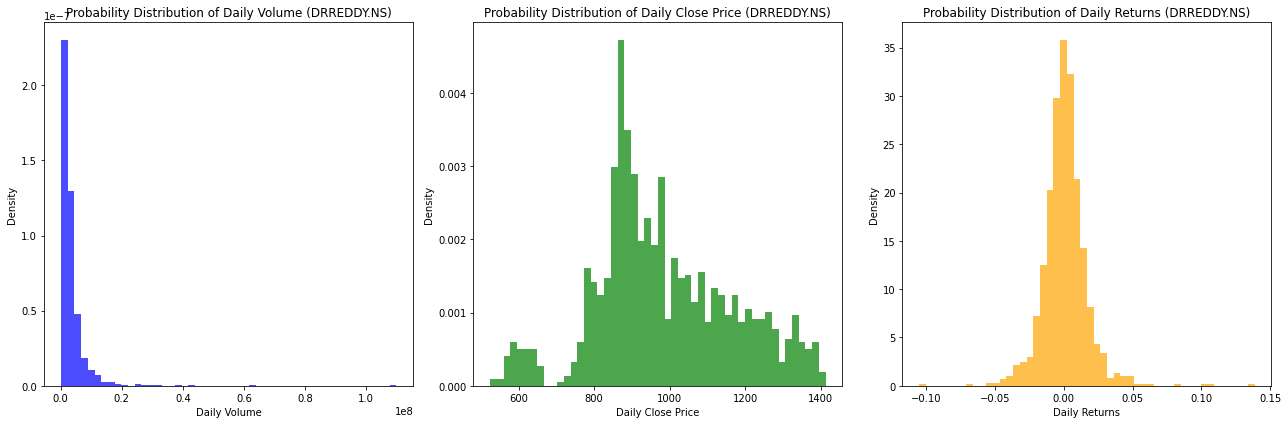

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


EICHERMOT.NS - T-scores:
T-score for Daily Returns: 1.489625146013801
T-score for Daily Volume: Ticker
EICHERMOT.NS    38.539303
dtype: float64
T-score for Daily Close Price: Ticker
EICHERMOT.NS    118.751573
dtype: float64
EICHERMOT.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.0002621612600933013, 0.0019159440321733267)
Confidence Interval for Daily Volume: (Ticker
EICHERMOT.NS    993840.393337
dtype: float64, Ticker
EICHERMOT.NS    1.100454e+06
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
EICHERMOT.NS    3037.799486
dtype: float64, Ticker
EICHERMOT.NS    3139.860931
dtype: float64)


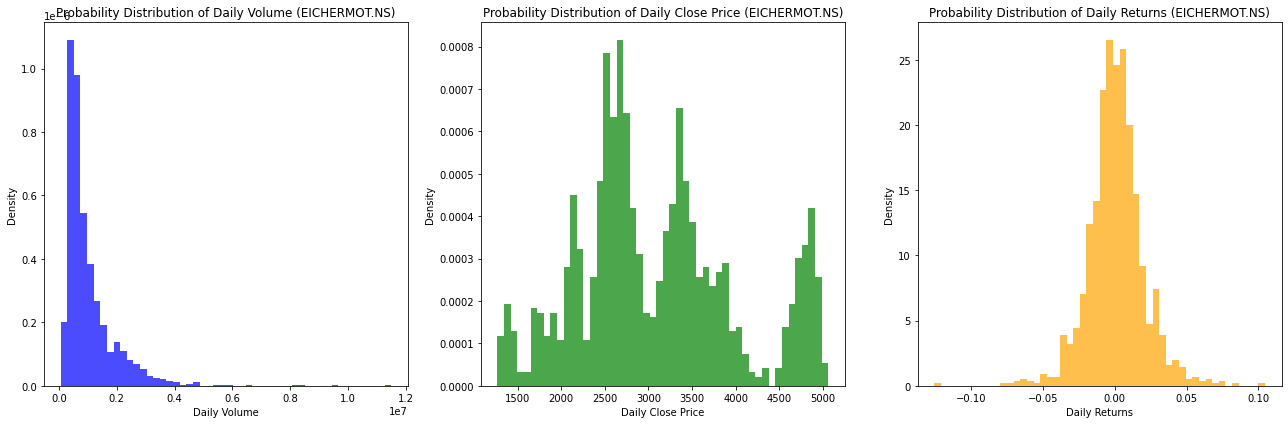

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


GRASIM.NS - T-scores:
T-score for Daily Returns: 2.2516619910760722
T-score for Daily Volume: Ticker
GRASIM.NS    38.276636
dtype: float64
T-score for Daily Close Price: Ticker
GRASIM.NS    92.92021
dtype: float64
GRASIM.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (0.00015979619708578609, 0.002323690477393916)
Confidence Interval for Daily Volume: (Ticker
GRASIM.NS    1.242827e+06
dtype: float64, Ticker
GRASIM.NS    1.377115e+06
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
GRASIM.NS    1560.016161
dtype: float64, Ticker
GRASIM.NS    1627.312861
dtype: float64)


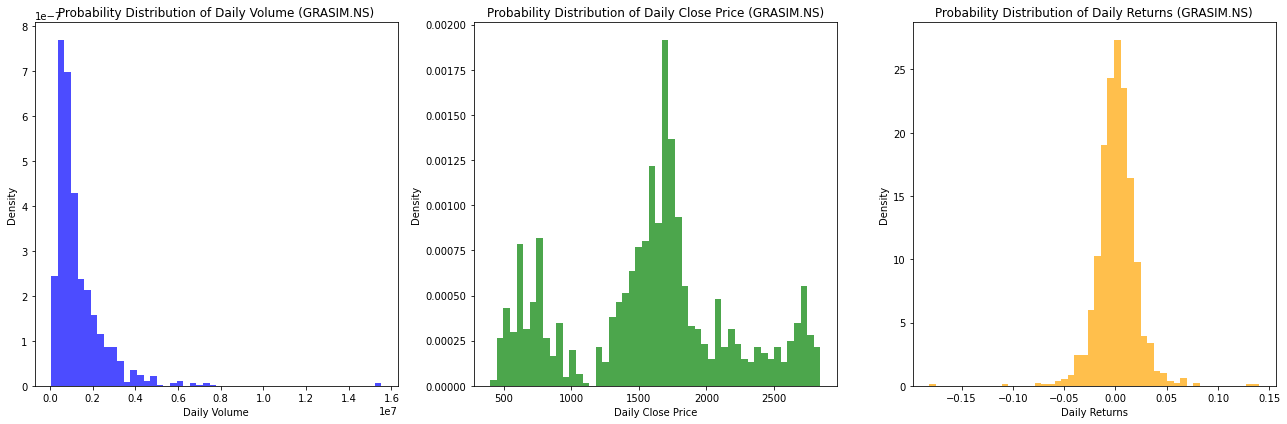

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


HDFCLIFE.NS - T-scores:
T-score for Daily Returns: 0.36666532202086144
T-score for Daily Volume: Ticker
HDFCLIFE.NS    41.929387
dtype: float64
T-score for Daily Close Price: Ticker
HDFCLIFE.NS    303.292639
dtype: float64
HDFCLIFE.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.0008823634876536499, 0.0012879860672856288)
Confidence Interval for Daily Volume: (Ticker
HDFCLIFE.NS    3.804570e+06
dtype: float64, Ticker
HDFCLIFE.NS    4.178083e+06
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
HDFCLIFE.NS    608.9045
dtype: float64, Ticker
HDFCLIFE.NS    616.833397
dtype: float64)


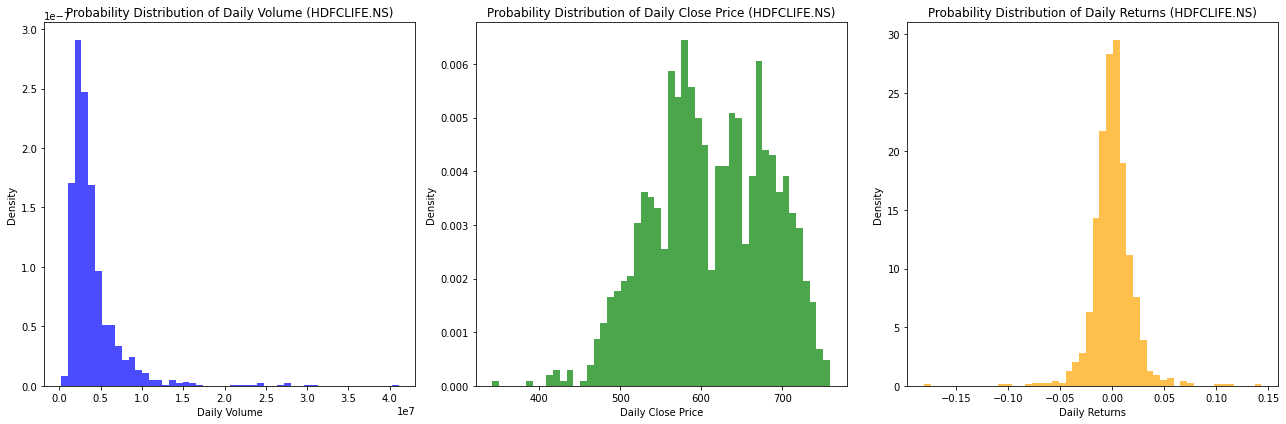

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


HEROMOTOCO.NS - T-scores:
T-score for Daily Returns: 1.2830145453810144
T-score for Daily Volume: Ticker
HEROMOTOCO.NS    46.867934
dtype: float64
T-score for Daily Close Price: Ticker
HEROMOTOCO.NS    114.525463
dtype: float64
HEROMOTOCO.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.0003678298806436552, 0.001758136316744421)
Confidence Interval for Daily Volume: (Ticker
HEROMOTOCO.NS    838482.320909
dtype: float64, Ticker
HEROMOTOCO.NS    911747.271593
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
HEROMOTOCO.NS    3138.734771
dtype: float64, Ticker
HEROMOTOCO.NS    3248.146489
dtype: float64)


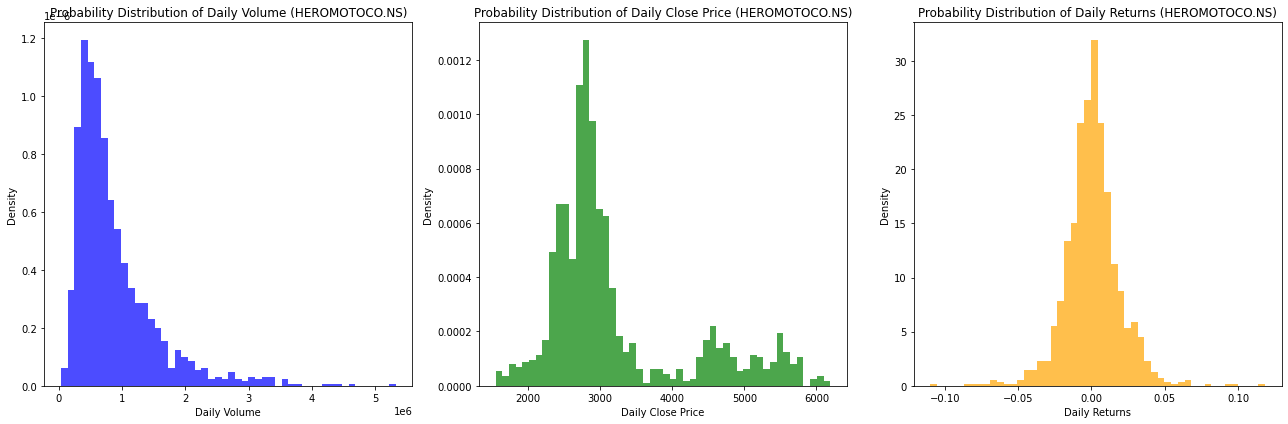

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


INDUSINDBK.NS - T-scores:
T-score for Daily Returns: 0.17148916964517077
T-score for Daily Volume: Ticker
INDUSINDBK.NS    27.423306
dtype: float64
T-score for Daily Close Price: Ticker
INDUSINDBK.NS    122.082103
dtype: float64
INDUSINDBK.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.0016091213367092443, 0.0019173707117002938)
Confidence Interval for Daily Volume: (Ticker
INDUSINDBK.NS    7.214025e+06
dtype: float64, Ticker
INDUSINDBK.NS    8.325763e+06
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
INDUSINDBK.NS    1065.879855
dtype: float64, Ticker
INDUSINDBK.NS    1100.697488
dtype: float64)


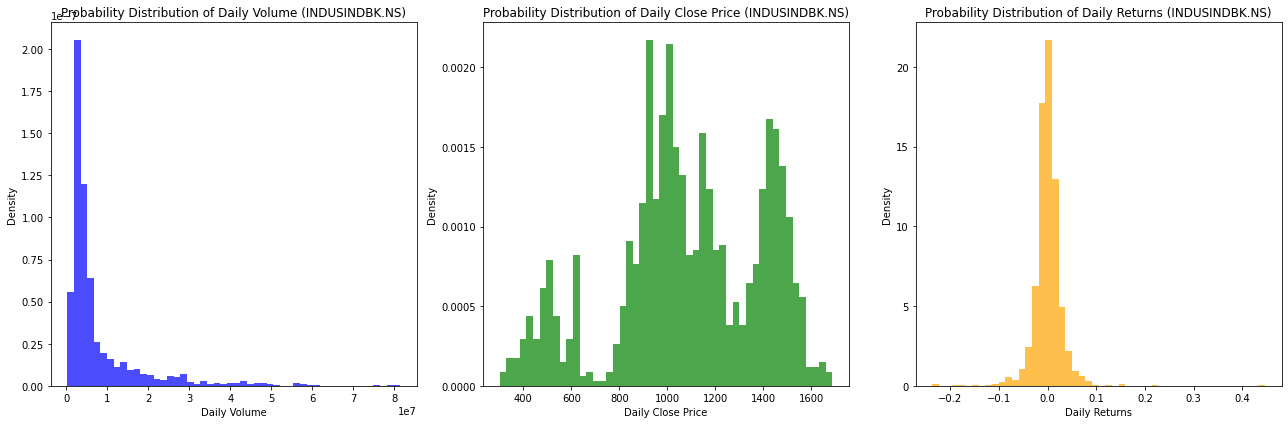

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


IOC.NS - T-scores:
T-score for Daily Returns: 1.1464387254723323
T-score for Daily Volume: Ticker
IOC.NS    42.802648
dtype: float64
T-score for Daily Close Price: Ticker
IOC.NS    85.373064
dtype: float64
IOC.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.00044340761474025343, 0.0016901575740276447)
Confidence Interval for Daily Volume: (Ticker
IOC.NS    2.236993e+07
dtype: float64, Ticker
IOC.NS    2.451913e+07
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
IOC.NS    89.405677
dtype: float64, Ticker
IOC.NS    93.61147
dtype: float64)


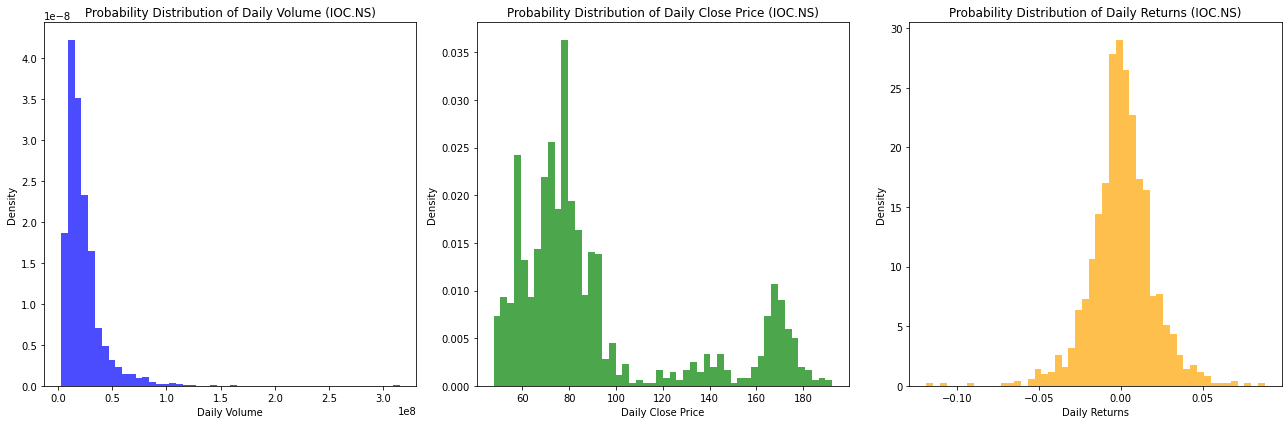

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


SHREECEM.NS - T-scores:
T-score for Daily Returns: 0.7969579977270345
T-score for Daily Volume: Ticker
SHREECEM.NS    39.411043
dtype: float64
T-score for Daily Close Price: Ticker
SHREECEM.NS    306.522758
dtype: float64
SHREECEM.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.0006127273208416003, 0.0014510813772795053)
Confidence Interval for Daily Volume: (Ticker
SHREECEM.NS    47542.115389
dtype: float64, Ticker
SHREECEM.NS    52523.426583
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
SHREECEM.NS    24481.378952
dtype: float64, Ticker
SHREECEM.NS    24796.784143
dtype: float64)


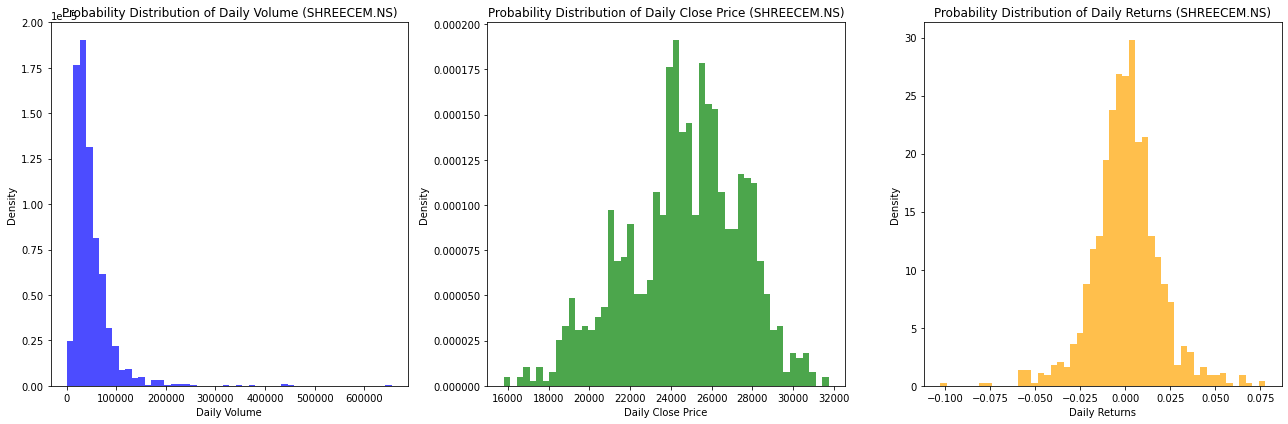

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


TATAMOTORS.NS - T-scores:
T-score for Daily Returns: 2.0111248494135916
T-score for Daily Volume: Ticker
TATAMOTORS.NS    31.247618
dtype: float64
T-score for Daily Close Price: Ticker
TATAMOTORS.NS    60.161197
dtype: float64
TATAMOTORS.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (3.781927584597185e-05, 0.0030526123929718136)
Confidence Interval for Daily Volume: (Ticker
TATAMOTORS.NS    3.106731e+07
dtype: float64, Ticker
TATAMOTORS.NS    3.522982e+07
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
TATAMOTORS.NS    462.617216
dtype: float64, Ticker
TATAMOTORS.NS    493.806909
dtype: float64)


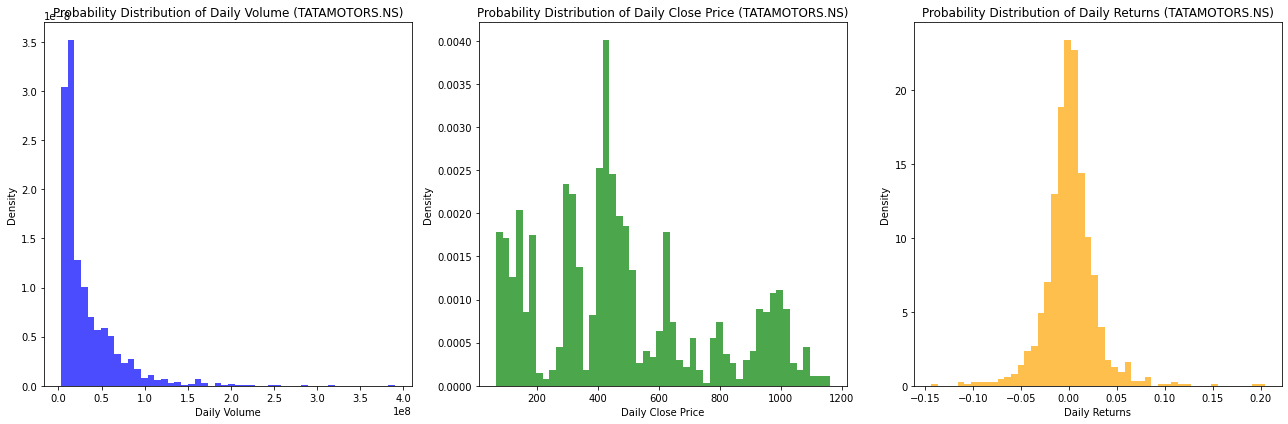

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


UPL.NS - T-scores:
T-score for Daily Returns: 0.3109960012757998
T-score for Daily Volume: Ticker
UPL.NS    29.849018
dtype: float64
T-score for Daily Close Price: Ticker
UPL.NS    171.283949
dtype: float64
UPL.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.0010592918783598345, 0.0014583884421187927)
Confidence Interval for Daily Volume: (Ticker
UPL.NS    3.810749e+06
dtype: float64, Ticker
UPL.NS    4.346933e+06
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
UPL.NS    613.068764
dtype: float64, Ticker
UPL.NS    627.275775
dtype: float64)


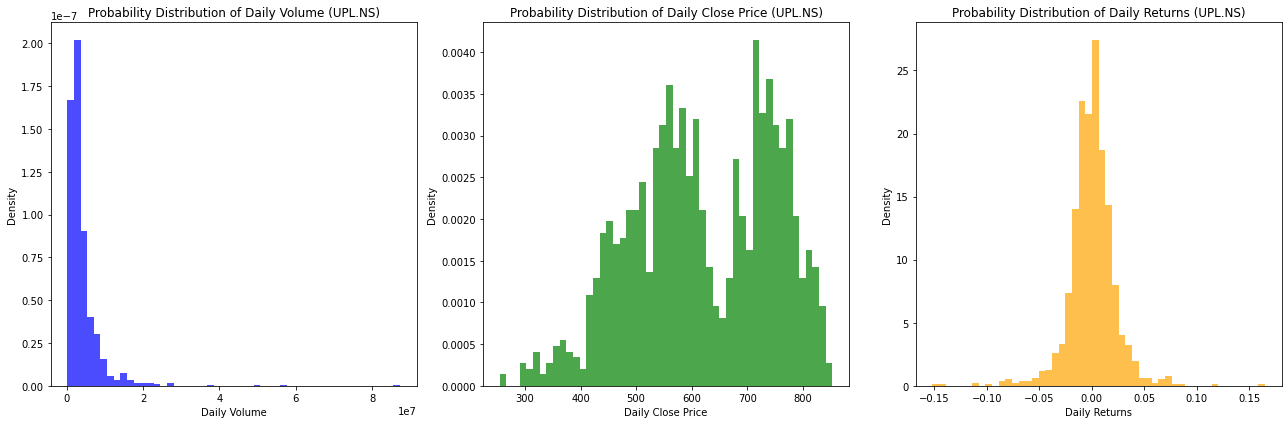

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


VEDL.NS - T-scores:
T-score for Daily Returns: 1.726770062272567
T-score for Daily Volume: Ticker
VEDL.NS    29.749015
dtype: float64
T-score for Daily Close Price: Ticker
VEDL.NS    88.803483
dtype: float64
VEDL.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.00019005698998130448, 0.002981546267902856)
Confidence Interval for Daily Volume: (Ticker
VEDL.NS    1.605787e+07
dtype: float64, Ticker
VEDL.NS    1.832539e+07
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
VEDL.NS    265.531344
dtype: float64, Ticker
VEDL.NS    277.528965
dtype: float64)


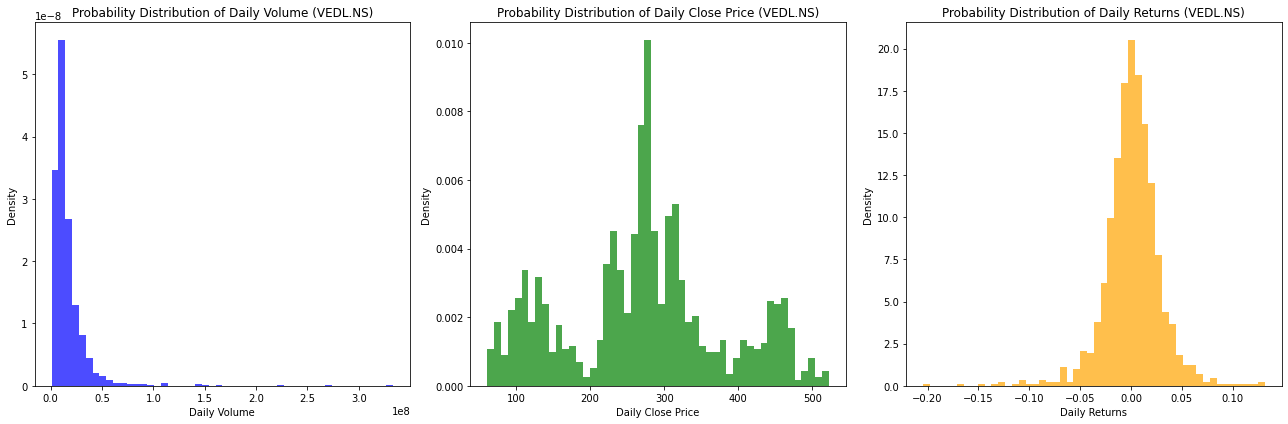

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


ZOMATO.NS - T-scores:
T-score for Daily Returns: 1.3520710285300261
T-score for Daily Volume: Ticker
ZOMATO.NS    27.567165
dtype: float64
T-score for Daily Close Price: Ticker
ZOMATO.NS    52.414516
dtype: float64
ZOMATO.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.0006786621002255577, 0.003683582424512167)
Confidence Interval for Daily Volume: (Ticker
ZOMATO.NS    6.001762e+07
dtype: float64, Ticker
ZOMATO.NS    6.921937e+07
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
ZOMATO.NS    118.169883
dtype: float64, Ticker
ZOMATO.NS    127.364563
dtype: float64)


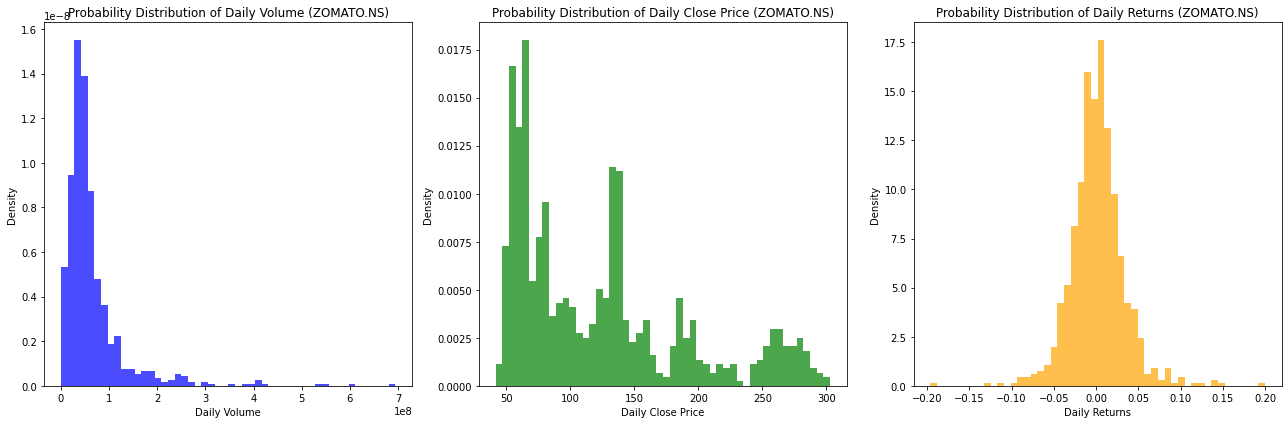

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


PIDILITIND.NS - T-scores:
T-score for Daily Returns: 1.7682076665586708
T-score for Daily Volume: Ticker
PIDILITIND.NS    40.190313
dtype: float64
T-score for Daily Close Price: Ticker
PIDILITIND.NS    148.727335
dtype: float64
PIDILITIND.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-8.667629905664517e-05, 0.0016691838056055218)
Confidence Interval for Daily Volume: (Ticker
PIDILITIND.NS    516257.096531
dtype: float64, Ticker
PIDILITIND.NS    569246.230282
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
PIDILITIND.NS    2272.456465
dtype: float64, Ticker
PIDILITIND.NS    2333.211019
dtype: float64)


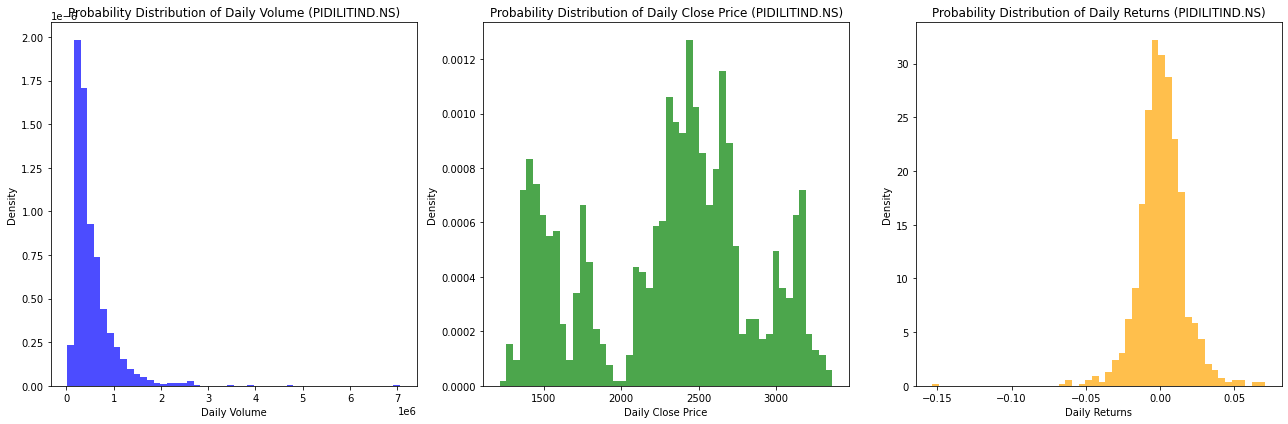

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


SIEMENS.NS - T-scores:
T-score for Daily Returns: 2.83414826983987
T-score for Daily Volume: Ticker
SIEMENS.NS    31.093789
dtype: float64
T-score for Daily Close Price: Ticker
SIEMENS.NS    59.709131
dtype: float64
SIEMENS.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (0.0004743905644425861, 0.0026084402443422635)
Confidence Interval for Daily Volume: (Ticker
SIEMENS.NS    412999.456865
dtype: float64, Ticker
SIEMENS.NS    468626.745254
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
SIEMENS.NS    3004.989517
dtype: float64, Ticker
SIEMENS.NS    3209.172171
dtype: float64)


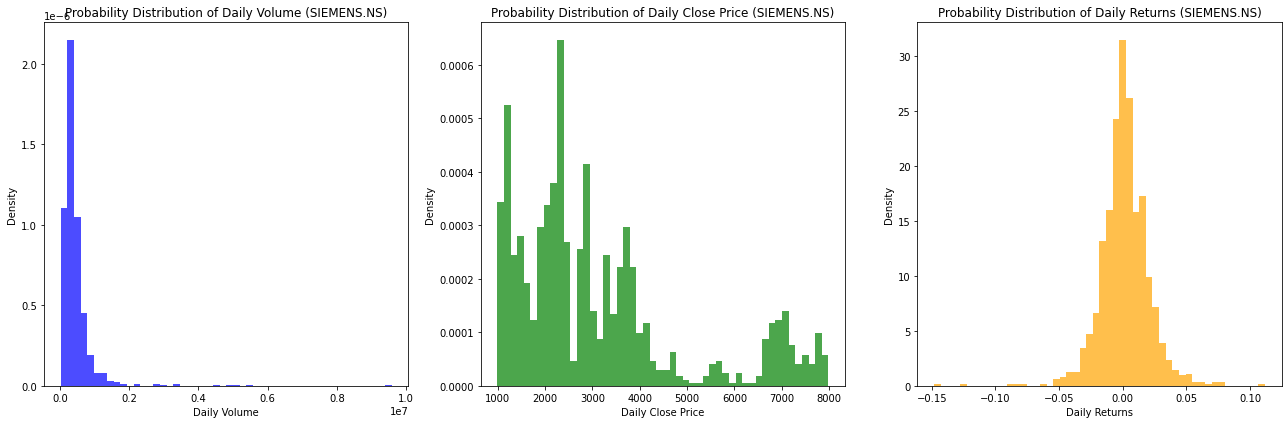

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['GAILEQ.NS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


GAILEQ.NS - T-scores:
T-score for Daily Returns: nan
T-score for Daily Volume: Ticker
GAILEQ.NS   NaN
dtype: float64
T-score for Daily Close Price: Ticker
GAILEQ.NS   NaN
dtype: float64
GAILEQ.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (nan, nan)
Confidence Interval for Daily Volume: (Ticker
GAILEQ.NS   NaN
dtype: float64, Ticker
GAILEQ.NS   NaN
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
GAILEQ.NS   NaN
dtype: float64, Ticker
GAILEQ.NS   NaN
dtype: float64)


C:\Users\Manan\anaconda3\lib\site-packages\numpy\lib\histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


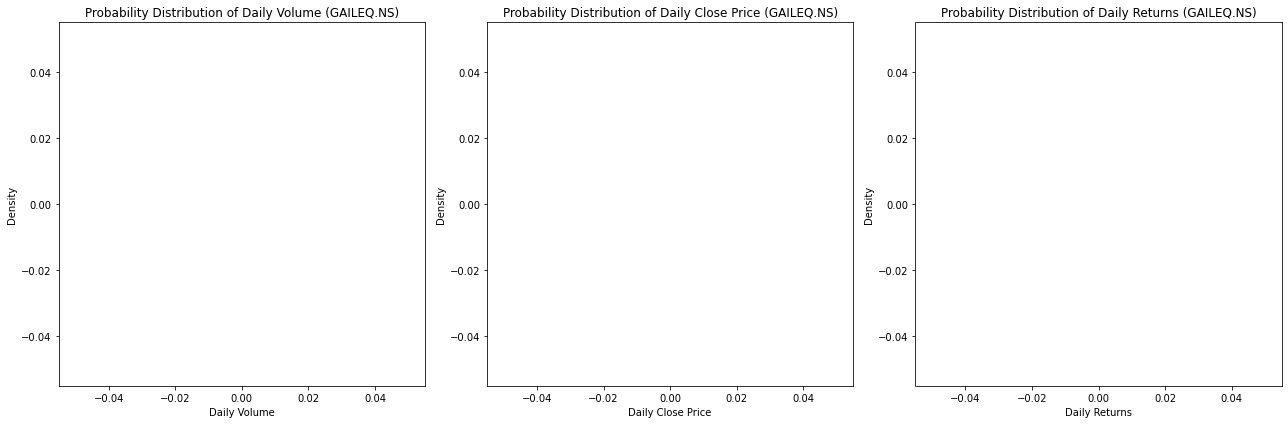

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


DABUR.NS - T-scores:
T-score for Daily Returns: 0.46906865206905946
T-score for Daily Volume: Ticker
DABUR.NS    47.214943
dtype: float64
T-score for Daily Close Price: Ticker
DABUR.NS    419.98661
dtype: float64
DABUR.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.0006251593770916677, 0.0010180265183236084)
Confidence Interval for Daily Volume: (Ticker
DABUR.NS    2.398567e+06
dtype: float64, Ticker
DABUR.NS    2.606542e+06
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
DABUR.NS    541.680772
dtype: float64, Ticker
DABUR.NS    546.765275
dtype: float64)


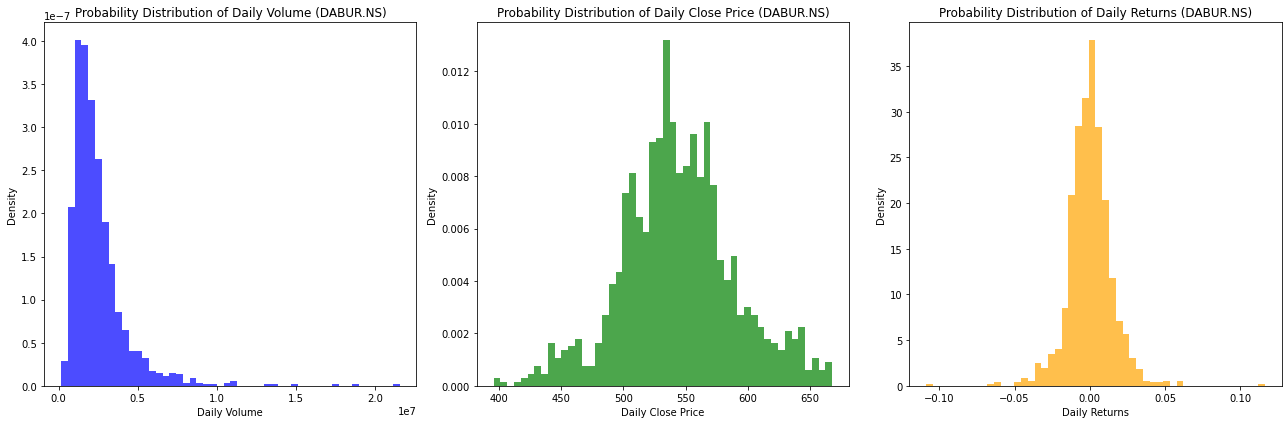

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


HAVELLS.NS - T-scores:
T-score for Daily Returns: 1.847915283887113
T-score for Daily Volume: Ticker
HAVELLS.NS    33.728452
dtype: float64
T-score for Daily Close Price: Ticker
HAVELLS.NS    115.578592
dtype: float64
HAVELLS.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-6.093771021116034e-05, 0.0020367348937292465)
Confidence Interval for Daily Volume: (Ticker
HAVELLS.NS    1.322014e+06
dtype: float64, Ticker
HAVELLS.NS    1.485310e+06
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
HAVELLS.NS    1177.859388
dtype: float64, Ticker
HAVELLS.NS    1218.537272
dtype: float64)


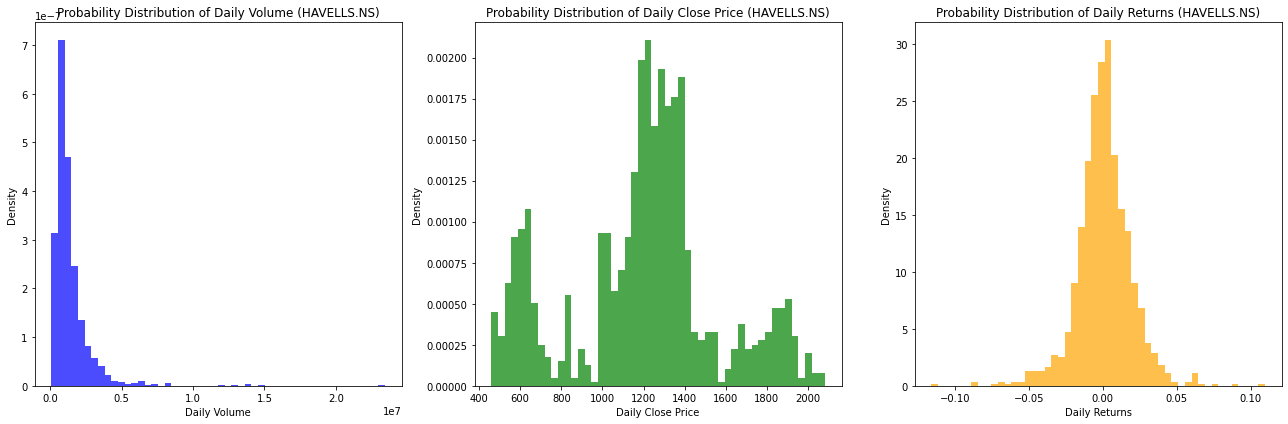

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


BAJAJHLDNG.NS - T-scores:
T-score for Daily Returns: 1.9698052490002051
T-score for Daily Volume: Ticker
BAJAJHLDNG.NS    16.247818
dtype: float64
T-score for Daily Close Price: Ticker
BAJAJHLDNG.NS    82.91328
dtype: float64
BAJAJHLDNG.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (4.8377543729561864e-06, 0.002406811955862959)
Confidence Interval for Daily Volume: (Ticker
BAJAJHLDNG.NS    55310.384713
dtype: float64, Ticker
BAJAJHLDNG.NS    70502.057015
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
BAJAJHLDNG.NS    5486.693017
dtype: float64, Ticker
BAJAJHLDNG.NS    5752.639013
dtype: float64)


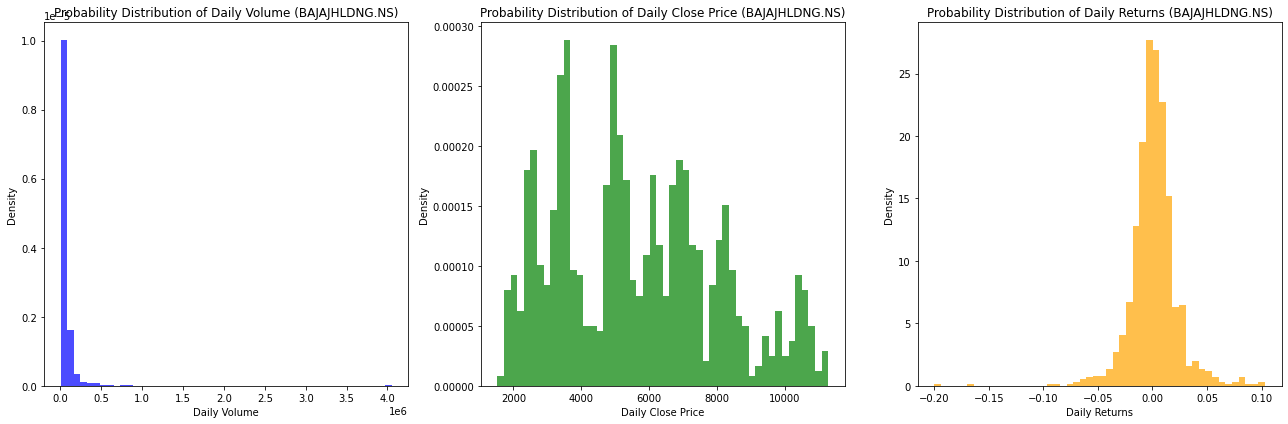

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


ABB.NS - T-scores:
T-score for Daily Returns: 2.7709600757777504
T-score for Daily Volume: Ticker
ABB.NS    28.471759
dtype: float64
T-score for Daily Close Price: Ticker
ABB.NS    50.649061
dtype: float64
ABB.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (0.0004913744663368146, 0.002874464815765354)
Confidence Interval for Daily Volume: (Ticker
ABB.NS    260057.763695
dtype: float64, Ticker
ABB.NS    298549.673958
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
ABB.NS    3077.267315
dtype: float64, Ticker
ABB.NS    3325.270825
dtype: float64)


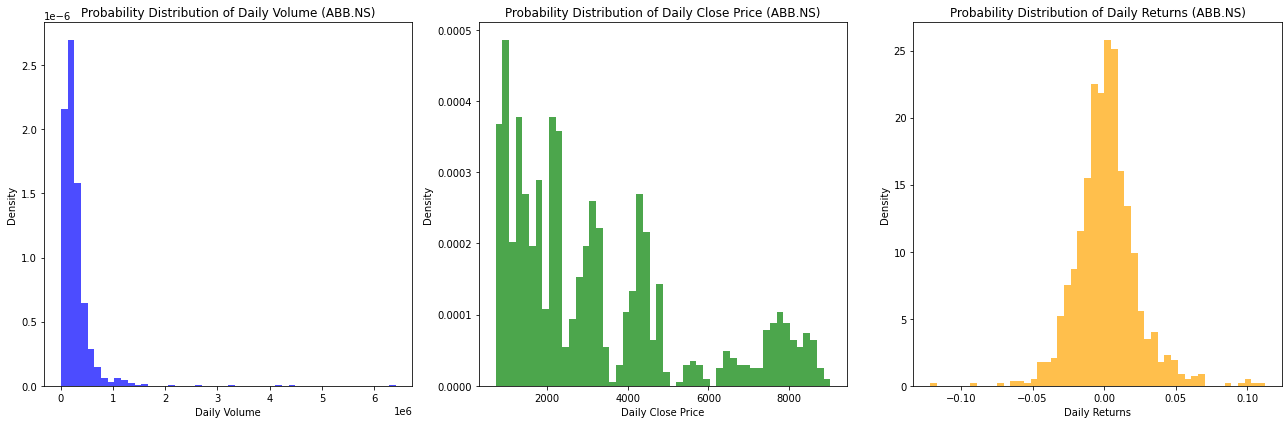

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


COLPAL.NS - T-scores:
T-score for Daily Returns: 1.5938410141329649
T-score for Daily Volume: Ticker
COLPAL.NS    40.81072
dtype: float64
T-score for Daily Close Price: Ticker
COLPAL.NS    107.957236
dtype: float64
COLPAL.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.00015121961312760843, 0.0014608925162679209)
Confidence Interval for Daily Volume: (Ticker
COLPAL.NS    492320.000324
dtype: float64, Ticker
COLPAL.NS    542045.21891
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
COLPAL.NS    1820.854365
dtype: float64, Ticker
COLPAL.NS    1888.259892
dtype: float64)


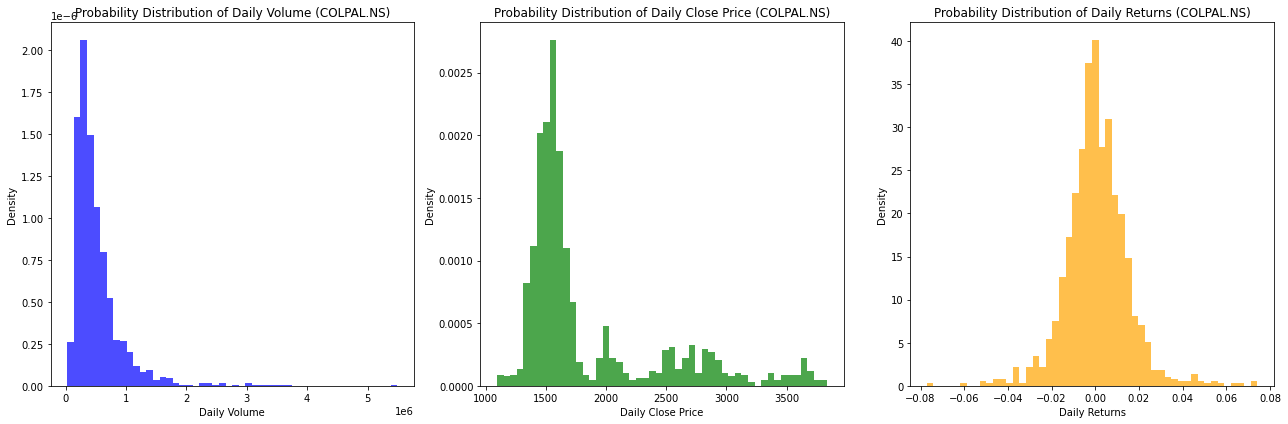

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['LTI.NS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


LTI.NS - T-scores:
T-score for Daily Returns: nan
T-score for Daily Volume: Ticker
LTI.NS   NaN
dtype: float64
T-score for Daily Close Price: Ticker
LTI.NS   NaN
dtype: float64
LTI.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (nan, nan)
Confidence Interval for Daily Volume: (Ticker
LTI.NS   NaN
dtype: float64, Ticker
LTI.NS   NaN
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
LTI.NS   NaN
dtype: float64, Ticker
LTI.NS   NaN
dtype: float64)


C:\Users\Manan\anaconda3\lib\site-packages\numpy\lib\histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


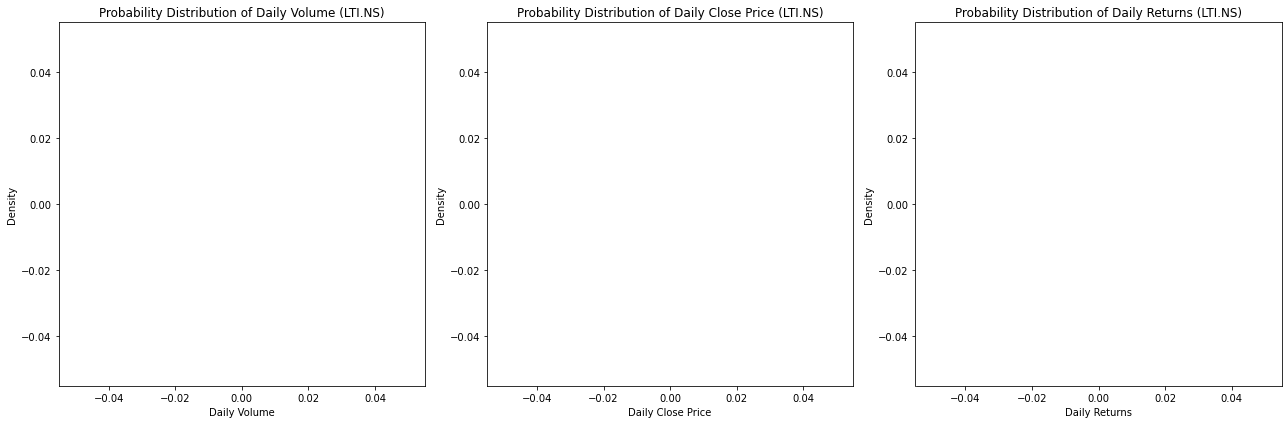

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


AUROPHARMA.NS - T-scores:
T-score for Daily Returns: 1.5605583282169428
T-score for Daily Volume: Ticker
AUROPHARMA.NS    33.38297
dtype: float64
T-score for Daily Close Price: Ticker
AUROPHARMA.NS    102.093925
dtype: float64
AUROPHARMA.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.000279589007531578, 0.0024538577650136564)
Confidence Interval for Daily Volume: (Ticker
AUROPHARMA.NS    2.543779e+06
dtype: float64, Ticker
AUROPHARMA.NS    2.861441e+06
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
AUROPHARMA.NS    800.128231
dtype: float64, Ticker
AUROPHARMA.NS    831.482281
dtype: float64)


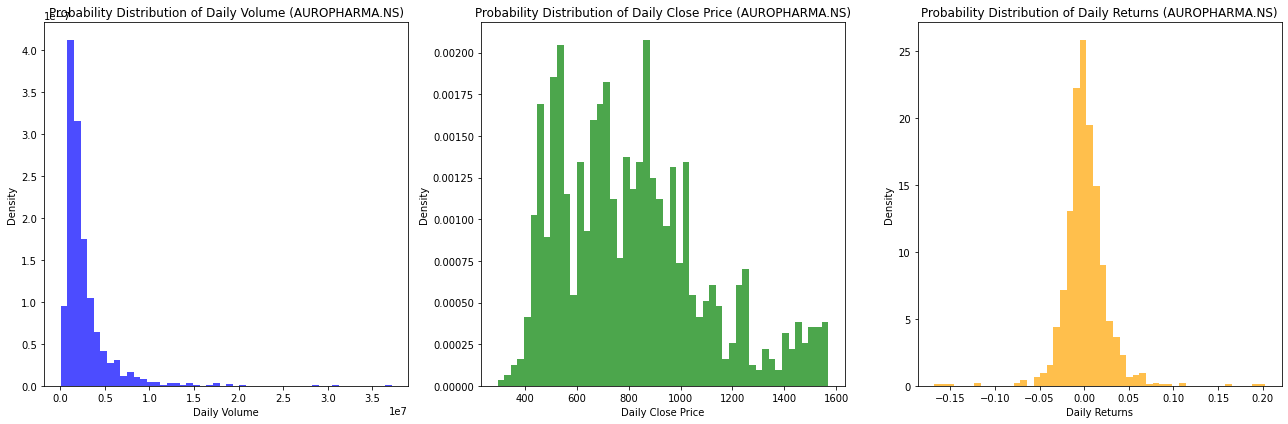

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


BERGEPAINT.NS - T-scores:
T-score for Daily Returns: 0.46109931079049166
T-score for Daily Volume: Ticker
BERGEPAINT.NS    27.565356
dtype: float64
T-score for Daily Close Price: Ticker
BERGEPAINT.NS    249.989265
dtype: float64
BERGEPAINT.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.0007316779980751597, 0.0011812722449707435)
Confidence Interval for Daily Volume: (Ticker
BERGEPAINT.NS    1.199885e+06
dtype: float64, Ticker
BERGEPAINT.NS    1.383770e+06
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
BERGEPAINT.NS    542.526192
dtype: float64, Ticker
BERGEPAINT.NS    551.108975
dtype: float64)


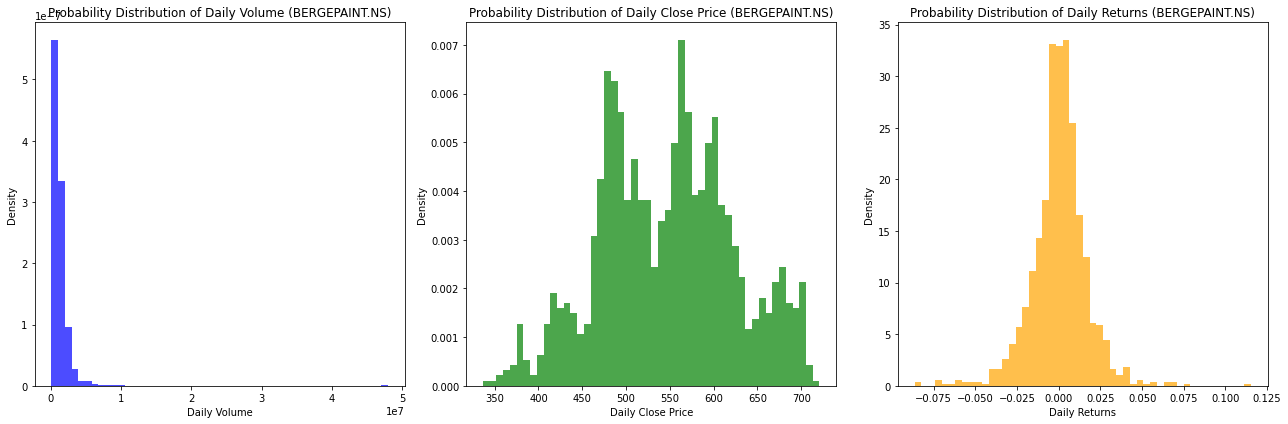

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


ICICIGI.NS - T-scores:
T-score for Daily Returns: 0.8756389425673857
T-score for Daily Volume: Ticker
ICICIGI.NS    26.402804
dtype: float64
T-score for Daily Close Price: Ticker
ICICIGI.NS    198.490849
dtype: float64
ICICIGI.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.0005797298687978398, 0.0015143724528220654)
Confidence Interval for Daily Volume: (Ticker
ICICIGI.NS    658286.110586
dtype: float64, Ticker
ICICIGI.NS    763968.953798
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
ICICIGI.NS    1399.301405
dtype: float64, Ticker
ICICIGI.NS    1427.239178
dtype: float64)


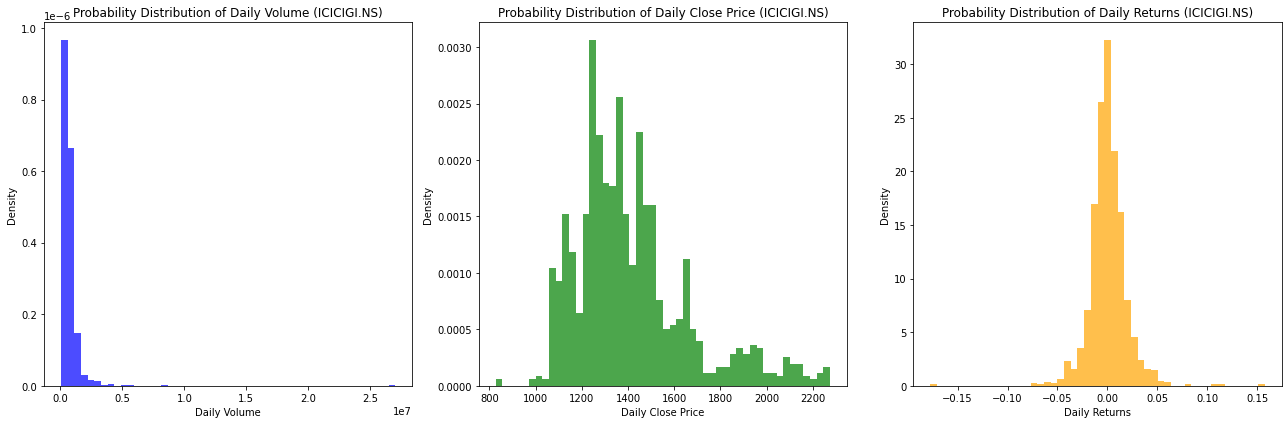

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


MOTHERSON.NS - T-scores:
T-score for Daily Returns: 1.5077564652562572
T-score for Daily Volume: Ticker
MOTHERSON.NS    27.627851
dtype: float64
T-score for Daily Close Price: Ticker
MOTHERSON.NS    78.94705
dtype: float64
MOTHERSON.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.0003735448285443182, 0.002853869186477313)
Confidence Interval for Daily Volume: (Ticker
MOTHERSON.NS    2.307727e+07
dtype: float64, Ticker
MOTHERSON.NS    2.660532e+07
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
MOTHERSON.NS    89.749692
dtype: float64, Ticker
MOTHERSON.NS    94.324081
dtype: float64)


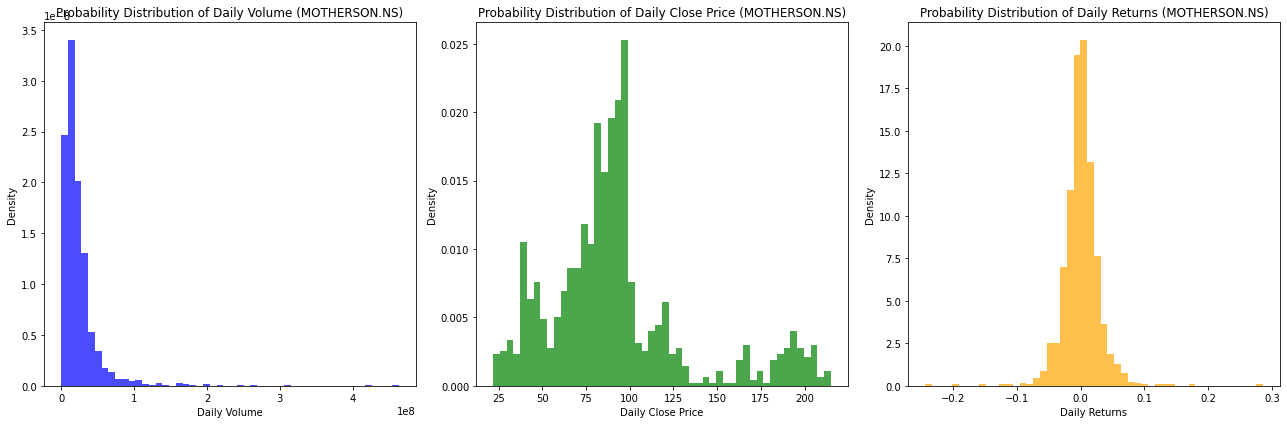

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


BANKBARODA.NS - T-scores:
T-score for Daily Returns: 1.46814838530833
T-score for Daily Volume: Ticker
BANKBARODA.NS    45.950347
dtype: float64
T-score for Daily Close Price: Ticker
BANKBARODA.NS    65.596213
dtype: float64
BANKBARODA.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.00037267485169821665, 0.0025889280836060885)
Confidence Interval for Daily Volume: (Ticker
BANKBARODA.NS    2.992691e+07
dtype: float64, Ticker
BANKBARODA.NS    3.259641e+07
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
BANKBARODA.NS    135.303275
dtype: float64, Ticker
BANKBARODA.NS    143.646309
dtype: float64)


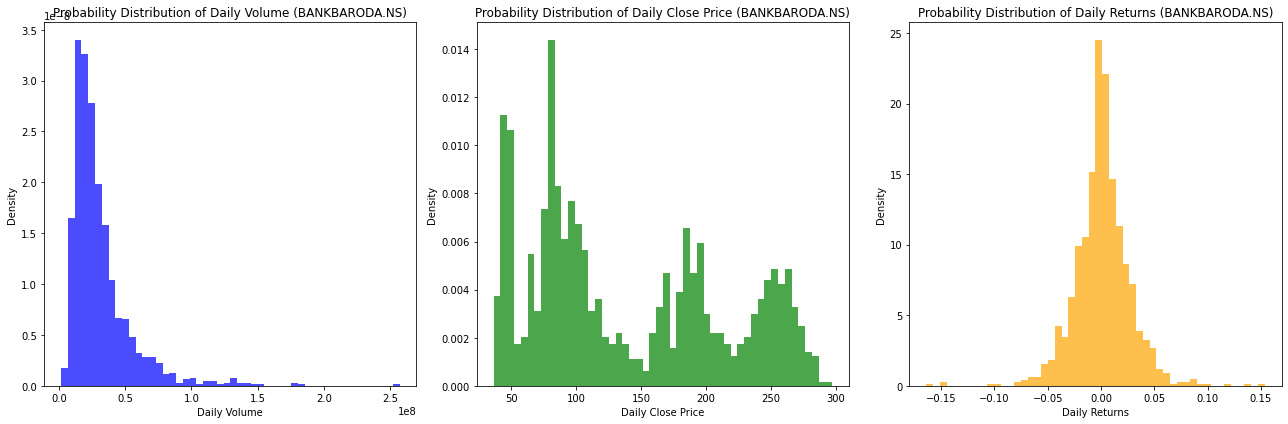

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


AMBUJACEM.NS - T-scores:
T-score for Daily Returns: 1.7536185367320316
T-score for Daily Volume: Ticker
AMBUJACEM.NS    28.30233
dtype: float64
T-score for Daily Close Price: Ticker
AMBUJACEM.NS    100.243716
dtype: float64
AMBUJACEM.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.00013429516017534737, 0.0023956558042237427)
Confidence Interval for Daily Volume: (Ticker
AMBUJACEM.NS    5.641253e+06
dtype: float64, Ticker
AMBUJACEM.NS    6.481602e+06
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
AMBUJACEM.NS    391.428404
dtype: float64, Ticker
AMBUJACEM.NS    407.055785
dtype: float64)


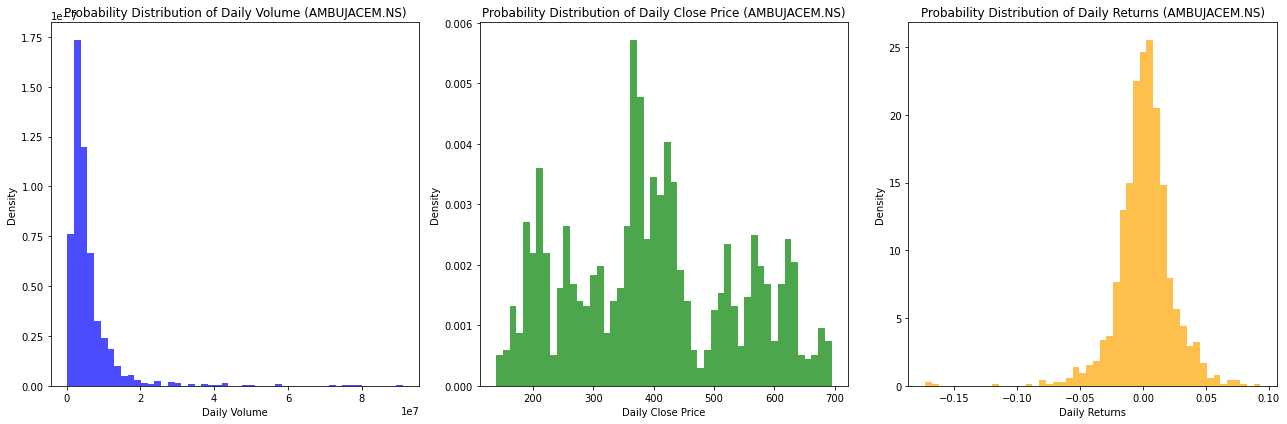

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


BOSCHLTD.NS - T-scores:
T-score for Daily Returns: 1.597988737587626
T-score for Daily Volume: Ticker
BOSCHLTD.NS    27.232383
dtype: float64
T-score for Daily Close Price: Ticker
BOSCHLTD.NS    93.583584
dtype: float64
BOSCHLTD.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.0002062957697279242, 0.0020180348568764966)
Confidence Interval for Daily Volume: (Ticker
BOSCHLTD.NS    39520.447234
dtype: float64, Ticker
BOSCHLTD.NS    45656.871429
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
BOSCHLTD.NS    18314.798826
dtype: float64, Ticker
BOSCHLTD.NS    19099.150695
dtype: float64)


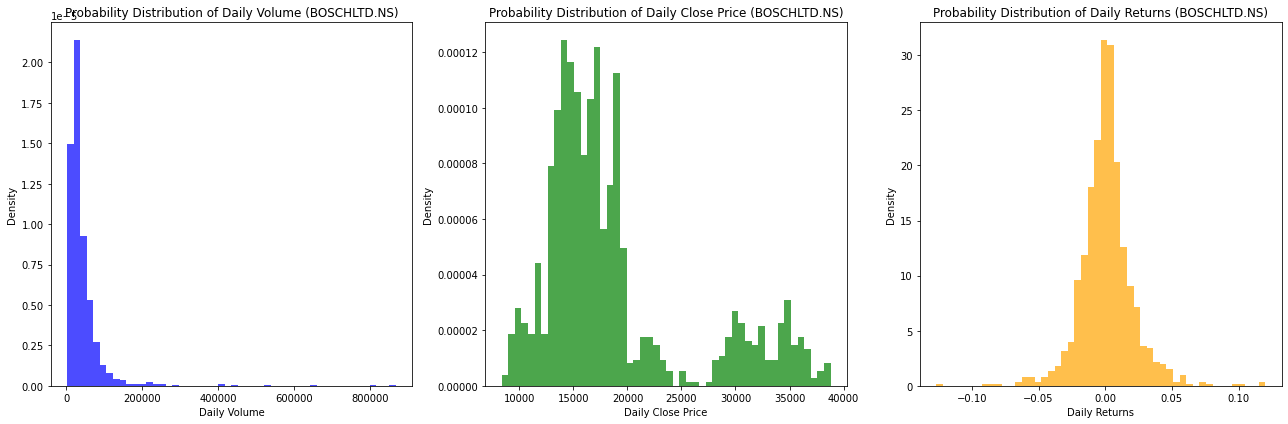

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


HINDPETRO.NS - T-scores:
T-score for Daily Returns: 1.4243038028388757
T-score for Daily Volume: Ticker
HINDPETRO.NS    49.190498
dtype: float64
T-score for Daily Close Price: Ticker
HINDPETRO.NS    87.19557
dtype: float64
HINDPETRO.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.0003752424000911759, 0.0023635629261805524)
Confidence Interval for Daily Volume: (Ticker
HINDPETRO.NS    8.493454e+06
dtype: float64, Ticker
HINDPETRO.NS    9.199099e+06
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
HINDPETRO.NS    198.921182
dtype: float64, Ticker
HINDPETRO.NS    208.078682
dtype: float64)


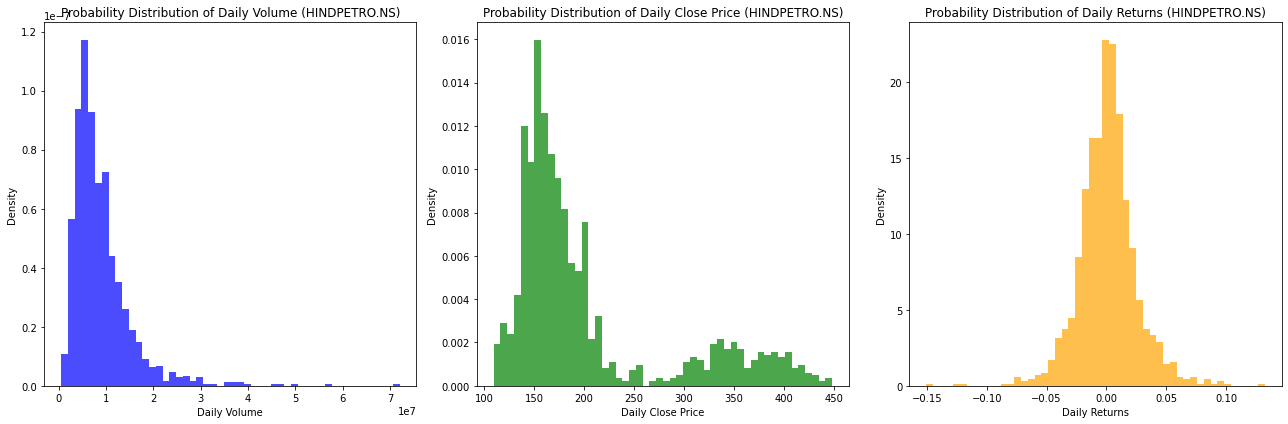

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


TORNTPHARM.NS - T-scores:
T-score for Daily Returns: 2.393465844264904
T-score for Daily Volume: Ticker
TORNTPHARM.NS    23.462225
dtype: float64
T-score for Daily Close Price: Ticker
TORNTPHARM.NS    96.215194
dtype: float64
TORNTPHARM.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (0.00021784686295203345, 0.002198525749294572)
Confidence Interval for Daily Volume: (Ticker
TORNTPHARM.NS    530894.584444
dtype: float64, Ticker
TORNTPHARM.NS    627782.65924
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
TORNTPHARM.NS    1723.444422
dtype: float64, Ticker
TORNTPHARM.NS    1795.192091
dtype: float64)


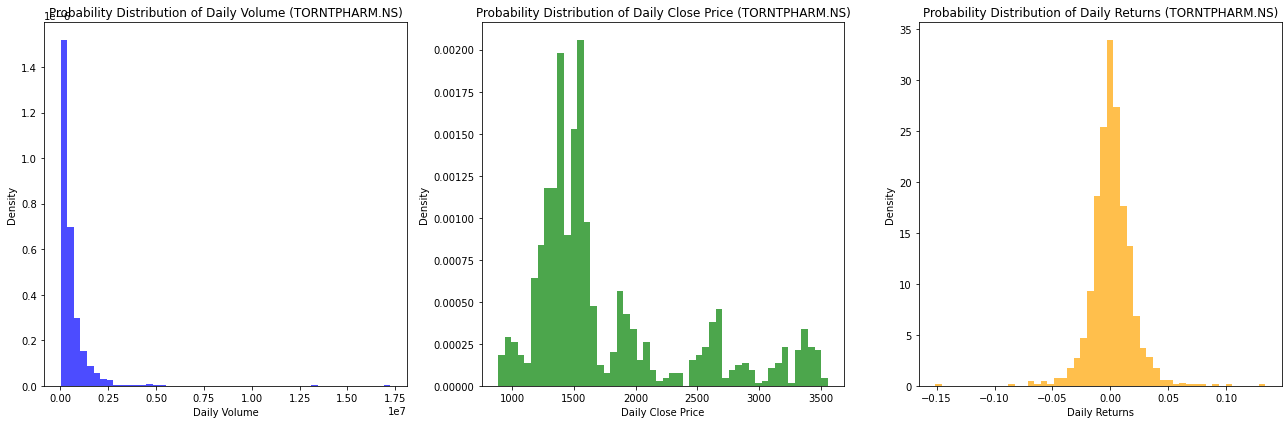

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


BIOCON.NS - T-scores:
T-score for Daily Returns: 0.6126140408308874
T-score for Daily Volume: Ticker
BIOCON.NS    34.933888
dtype: float64
T-score for Daily Close Price: Ticker
BIOCON.NS    179.642487
dtype: float64
BIOCON.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.0008080805550158677, 0.0015418621597368108)
Confidence Interval for Daily Volume: (Ticker
BIOCON.NS    4.152941e+06
dtype: float64, Ticker
BIOCON.NS    4.647158e+06
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
BIOCON.NS    325.931391
dtype: float64, Ticker
BIOCON.NS    333.129083
dtype: float64)


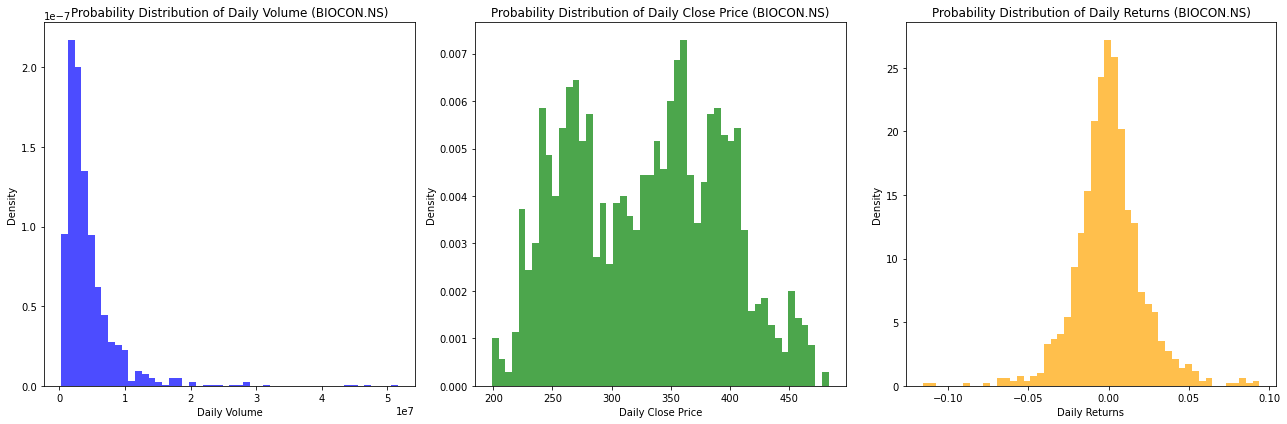

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


NMDC.NS - T-scores:
T-score for Daily Returns: 1.412833210781695
T-score for Daily Volume: Ticker
NMDC.NS    41.089505
dtype: float64
T-score for Daily Close Price: Ticker
NMDC.NS    79.337381
dtype: float64
NMDC.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.00040266094389842426, 0.0024748687825691534)
Confidence Interval for Daily Volume: (Ticker
NMDC.NS    1.325067e+07
dtype: float64, Ticker
NMDC.NS    1.457947e+07
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
NMDC.NS    126.419716
dtype: float64, Ticker
NMDC.NS    132.830609
dtype: float64)


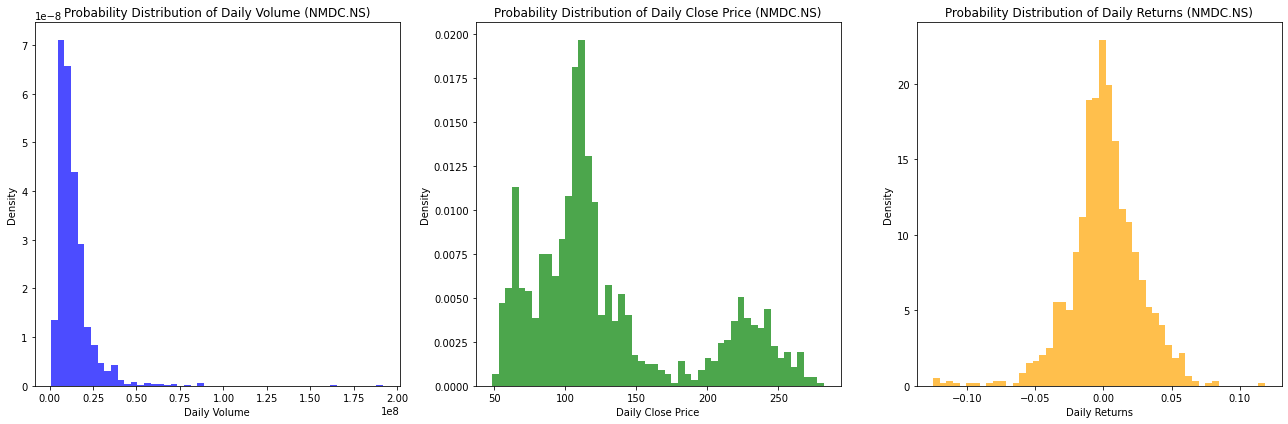

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


INDIGO.NS - T-scores:
T-score for Daily Returns: 1.8847483433003693
T-score for Daily Volume: Ticker
INDIGO.NS    28.83806
dtype: float64
T-score for Daily Close Price: Ticker
INDIGO.NS    78.696135
dtype: float64
INDIGO.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-5.109170401325098e-05, 0.0025472659869327473)
Confidence Interval for Daily Volume: (Ticker
INDIGO.NS    1.177045e+06
dtype: float64, Ticker
INDIGO.NS    1.348889e+06
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
INDIGO.NS    2176.193117
dtype: float64, Ticker
INDIGO.NS    2287.472656
dtype: float64)


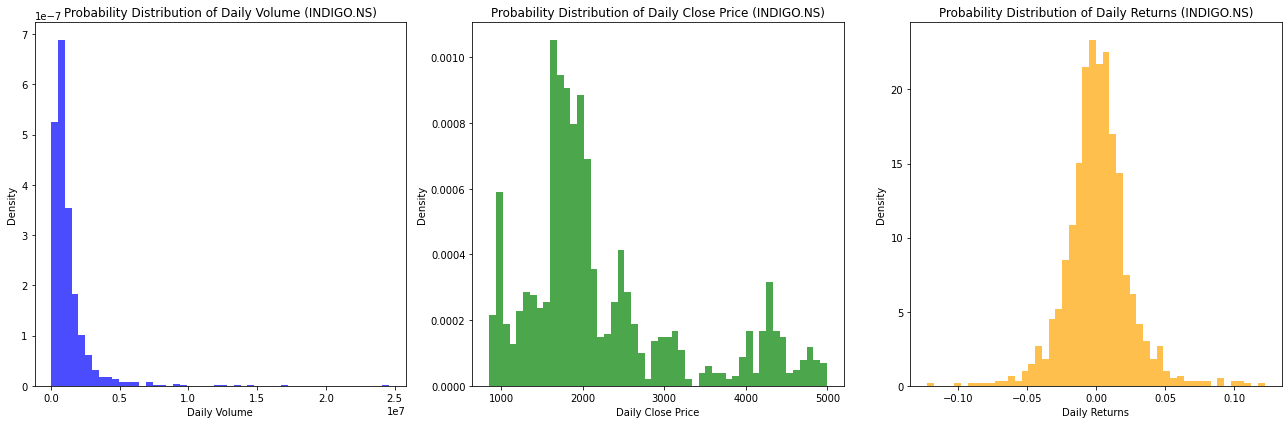

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


LUPIN.NS - T-scores:
T-score for Daily Returns: 1.7876157667076866
T-score for Daily Volume: Ticker
LUPIN.NS    32.386392
dtype: float64
T-score for Daily Close Price: Ticker
LUPIN.NS    88.820353
dtype: float64
LUPIN.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-9.72514922821066e-05, 0.0020922213065032195)
Confidence Interval for Daily Volume: (Ticker
LUPIN.NS    1.757591e+06
dtype: float64, Ticker
LUPIN.NS    1.984265e+06
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
LUPIN.NS    1042.228199
dtype: float64, Ticker
LUPIN.NS    1089.310511
dtype: float64)


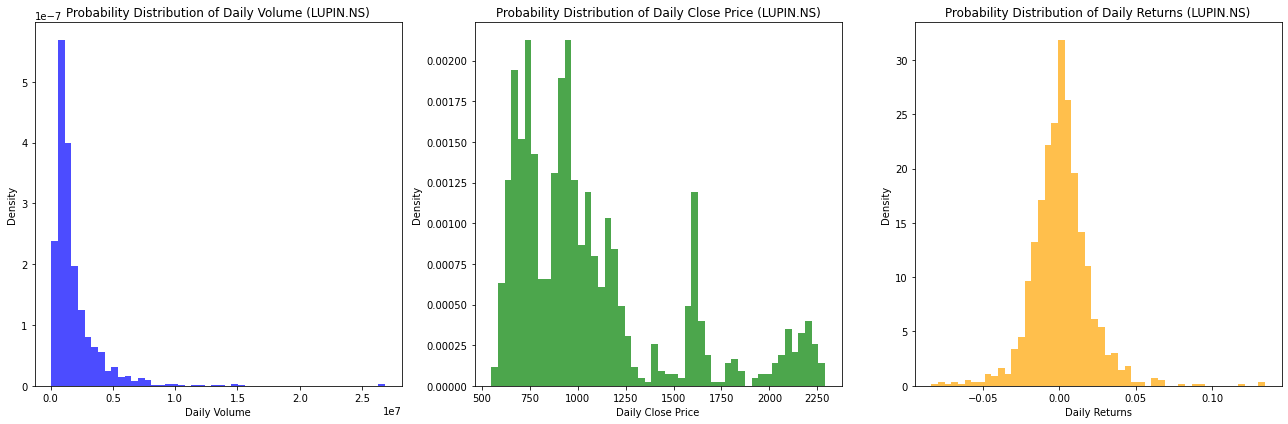

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


BANDHANBNK.NS - T-scores:
T-score for Daily Returns: -0.4316661164334594
T-score for Daily Volume: Ticker
BANDHANBNK.NS    38.399009
dtype: float64
T-score for Daily Close Price: Ticker
BANDHANBNK.NS    143.969505
dtype: float64
BANDHANBNK.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.002166885947463553, 0.001385315476840008)
Confidence Interval for Daily Volume: (Ticker
BANDHANBNK.NS    1.021287e+07
dtype: float64, Ticker
BANDHANBNK.NS    1.131266e+07
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
BANDHANBNK.NS    268.260974
dtype: float64, Ticker
BANDHANBNK.NS    275.673273
dtype: float64)


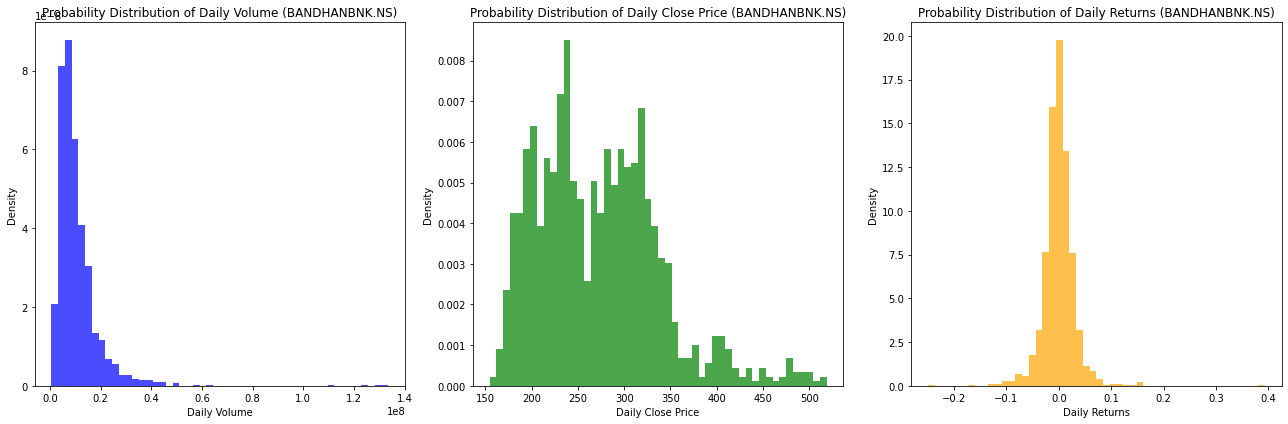

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['ADANITRANS.NS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


ADANITRANS.NS - T-scores:
T-score for Daily Returns: nan
T-score for Daily Volume: Ticker
ADANITRANS.NS   NaN
dtype: float64
T-score for Daily Close Price: Ticker
ADANITRANS.NS   NaN
dtype: float64
ADANITRANS.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (nan, nan)
Confidence Interval for Daily Volume: (Ticker
ADANITRANS.NS   NaN
dtype: float64, Ticker
ADANITRANS.NS   NaN
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
ADANITRANS.NS   NaN
dtype: float64, Ticker
ADANITRANS.NS   NaN
dtype: float64)


C:\Users\Manan\anaconda3\lib\site-packages\numpy\lib\histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


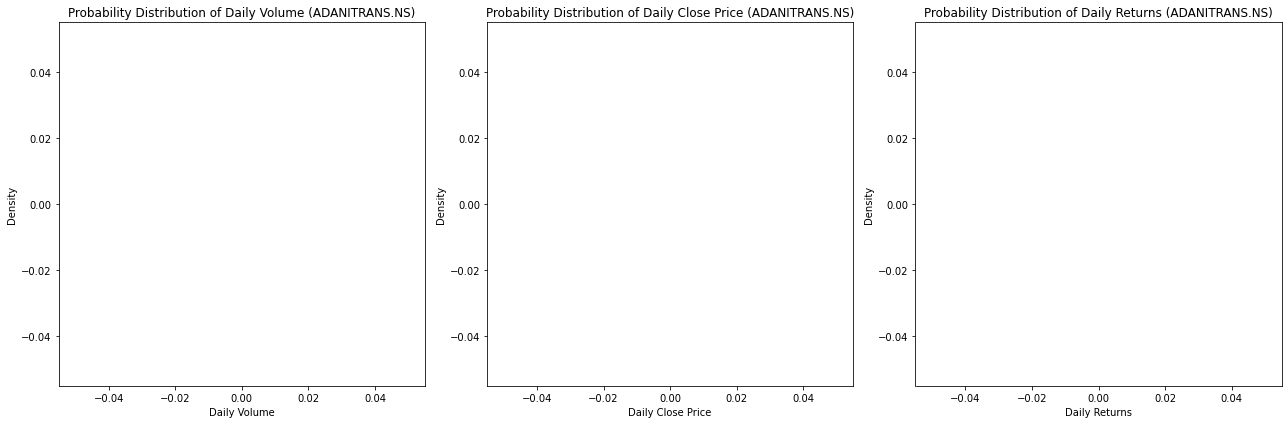

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


HAL.NS - T-scores:
T-score for Daily Returns: 3.3856206103104736
T-score for Daily Volume: Ticker
HAL.NS    32.942873
dtype: float64
T-score for Daily Close Price: Ticker
HAL.NS    37.847458
dtype: float64
HAL.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (0.0010021136265724625, 0.0037639651642882486)
Confidence Interval for Daily Volume: (Ticker
HAL.NS    1.683316e+06
dtype: float64, Ticker
HAL.NS    1.896511e+06
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
HAL.NS    1459.336038
dtype: float64, Ticker
HAL.NS    1618.902882
dtype: float64)


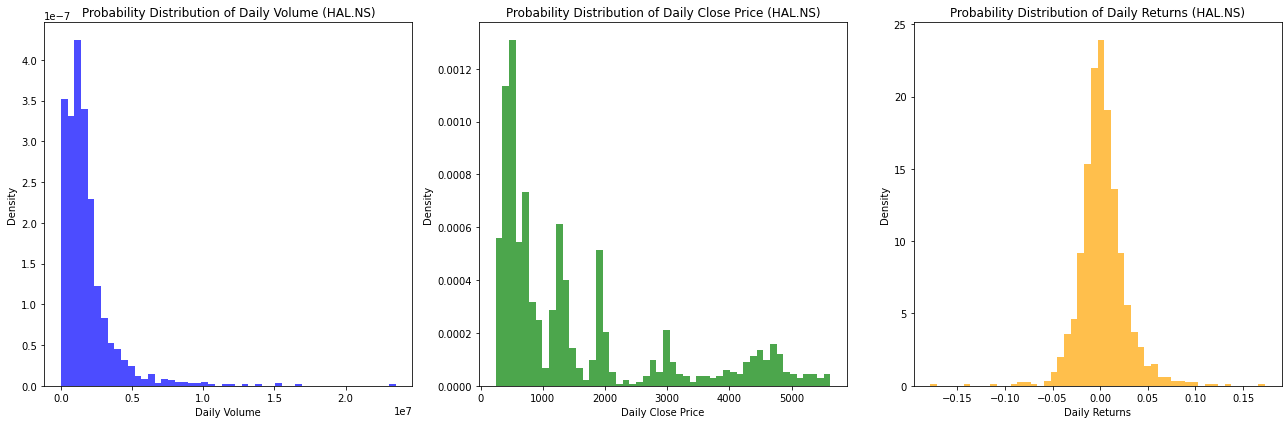

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


IDFCFIRSTB.NS - T-scores:
T-score for Daily Returns: 0.8254852311934244
T-score for Daily Volume: Ticker
IDFCFIRSTB.NS    49.293048
dtype: float64
T-score for Daily Close Price: Ticker
IDFCFIRSTB.NS    98.81309
dtype: float64
IDFCFIRSTB.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.0008098118541629211, 0.001986294813635683)
Confidence Interval for Daily Volume: (Ticker
IDFCFIRSTB.NS    3.477028e+07
dtype: float64, Ticker
IDFCFIRSTB.NS    3.765277e+07
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
IDFCFIRSTB.NS    54.553851
dtype: float64, Ticker
IDFCFIRSTB.NS    56.76403
dtype: float64)


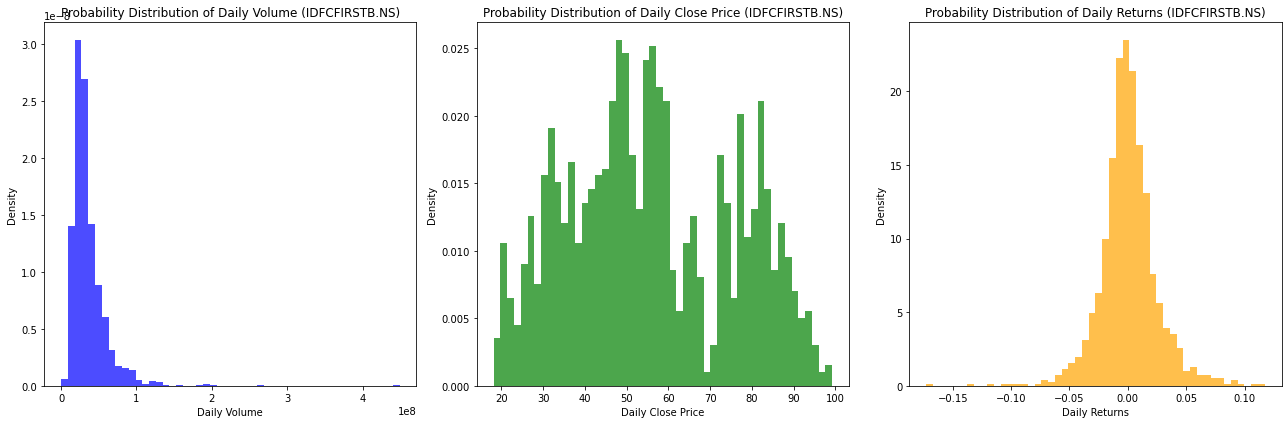

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


IRCTC.NS - T-scores:
T-score for Daily Returns: 2.124948473532821
T-score for Daily Volume: Ticker
IRCTC.NS    21.13158
dtype: float64
T-score for Daily Close Price: Ticker
IRCTC.NS    86.892163
dtype: float64
IRCTC.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (0.00011755817708135915, 0.002946668837233337)
Confidence Interval for Daily Volume: (Ticker
IRCTC.NS    5.520581e+06
dtype: float64, Ticker
IRCTC.NS    6.650577e+06
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
IRCTC.NS    605.908499
dtype: float64, Ticker
IRCTC.NS    633.90164
dtype: float64)


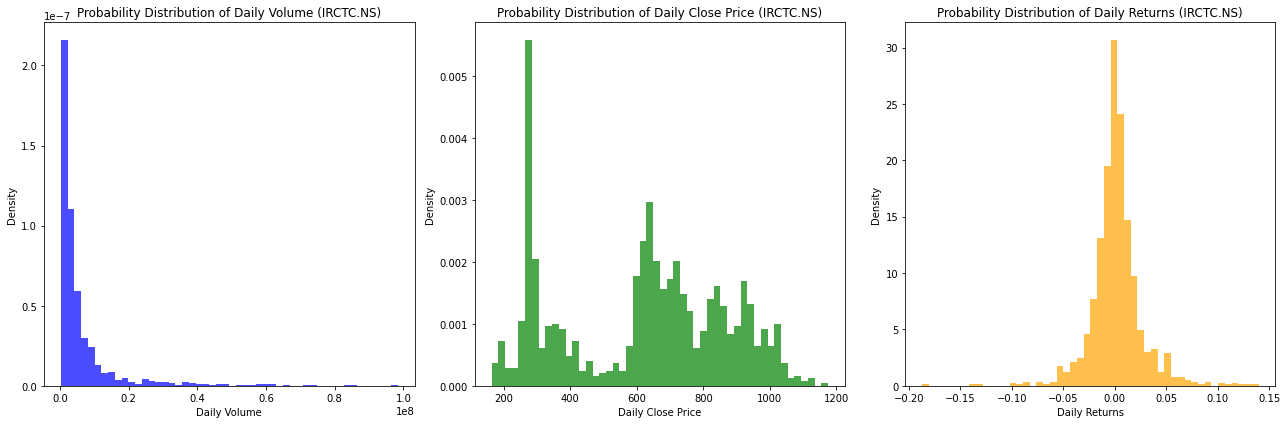

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


MUTHOOTFIN.NS - T-scores:
T-score for Daily Returns: 1.6605249985836619
T-score for Daily Volume: Ticker
MUTHOOTFIN.NS    25.435625
dtype: float64
T-score for Daily Close Price: Ticker
MUTHOOTFIN.NS    147.571008
dtype: float64
MUTHOOTFIN.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.0001972761214323565, 0.002371174454109317)
Confidence Interval for Daily Volume: (Ticker
MUTHOOTFIN.NS    1.104055e+06
dtype: float64, Ticker
MUTHOOTFIN.NS    1.288606e+06
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
MUTHOOTFIN.NS    1273.916133
dtype: float64, Ticker
MUTHOOTFIN.NS    1308.24499
dtype: float64)


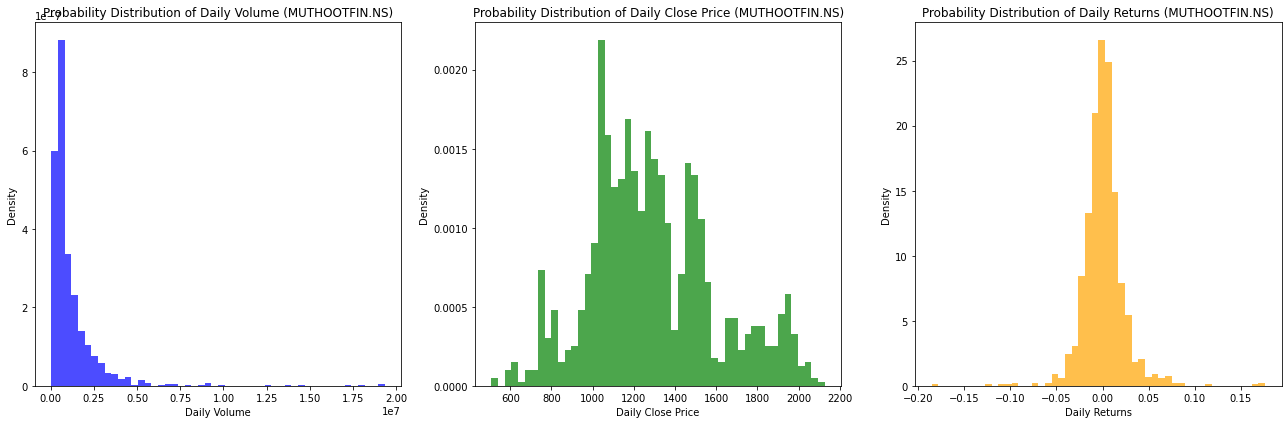

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


DLF.NS - T-scores:
T-score for Daily Returns: 1.9464328937016904
T-score for Daily Volume: Ticker
DLF.NS    38.940907
dtype: float64
T-score for Daily Close Price: Ticker
DLF.NS    66.011117
dtype: float64
DLF.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-1.1318608013087756e-05, 0.002859617643241154)
Confidence Interval for Daily Volume: (Ticker
DLF.NS    7.162748e+06
dtype: float64, Ticker
DLF.NS    7.922779e+06
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
DLF.NS    420.753802
dtype: float64, Ticker
DLF.NS    446.530143
dtype: float64)


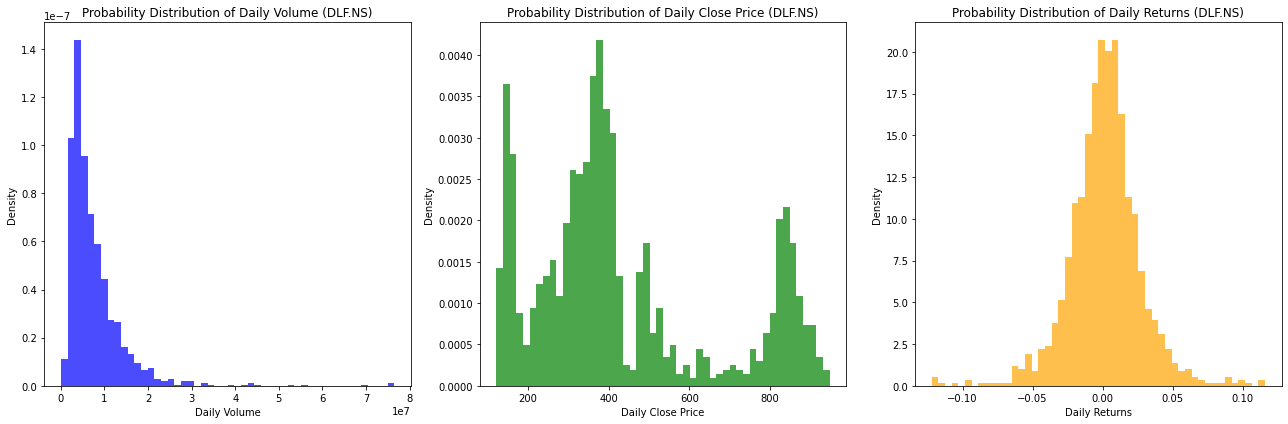

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


POLYCAB.NS - T-scores:
T-score for Daily Returns: 2.9217779222373013
T-score for Daily Volume: Ticker
POLYCAB.NS    21.763423
dtype: float64
T-score for Daily Close Price: Ticker
POLYCAB.NS    54.789797
dtype: float64
POLYCAB.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (0.0006317850021412769, 0.0032144126692655937)
Confidence Interval for Daily Volume: (Ticker
POLYCAB.NS    434065.641203
dtype: float64, Ticker
POLYCAB.NS    520078.596776
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
POLYCAB.NS    2924.375836
dtype: float64, Ticker
POLYCAB.NS    3141.584388
dtype: float64)


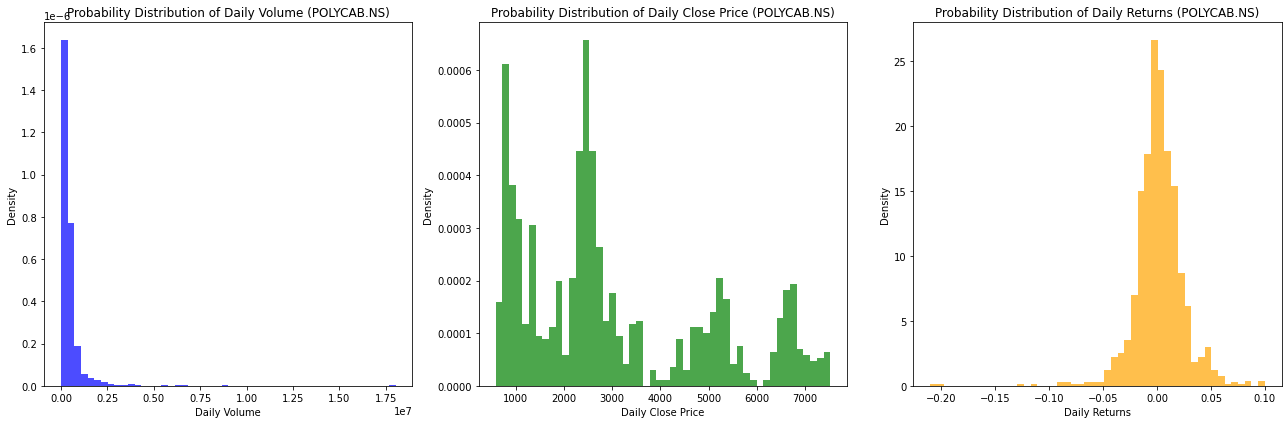

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


TRENT.NS - T-scores:
T-score for Daily Returns: 3.4539073033971364
T-score for Daily Volume: Ticker
TRENT.NS    28.077498
dtype: float64
T-score for Daily Close Price: Ticker
TRENT.NS    36.690192
dtype: float64
TRENT.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (0.0010377356143474984, 0.0037668634116720047)
Confidence Interval for Daily Volume: (Ticker
TRENT.NS    718224.584961
dtype: float64, Ticker
TRENT.NS    826135.992056
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
TRENT.NS    1844.273516
dtype: float64, Ticker
TRENT.NS    2052.650123
dtype: float64)


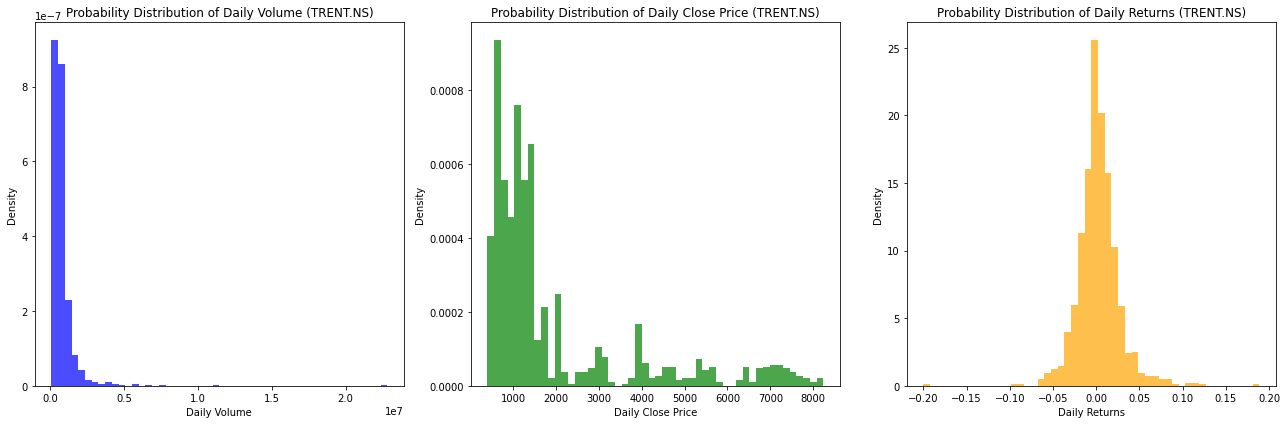

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


ALKEM.NS - T-scores:
T-score for Daily Returns: 1.9188241589075599
T-score for Daily Volume: Ticker
ALKEM.NS    25.19218
dtype: float64
T-score for Daily Close Price: Ticker
ALKEM.NS    125.124449
dtype: float64
ALKEM.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-2.0429419059982872e-05, 0.0018403945997497154)
Confidence Interval for Daily Volume: (Ticker
ALKEM.NS    165222.583888
dtype: float64, Ticker
ALKEM.NS    193130.154498
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
ALKEM.NS    3541.24977
dtype: float64, Ticker
ALKEM.NS    3654.06947
dtype: float64)


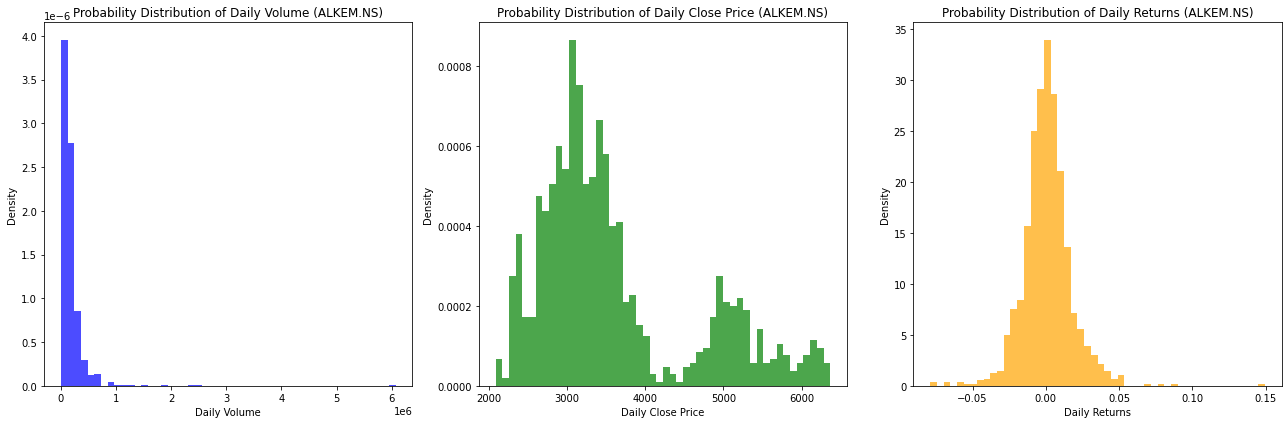

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


SRF.NS - T-scores:
T-score for Daily Returns: 2.0461694148225806
T-score for Daily Volume: Ticker
SRF.NS    33.696025
dtype: float64
T-score for Daily Close Price: Ticker
SRF.NS    98.862018
dtype: float64
SRF.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (4.914766715938832e-05, 0.002337657446877585)
Confidence Interval for Daily Volume: (Ticker
SRF.NS    832871.946355
dtype: float64, Ticker
SRF.NS    935853.339709
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
SRF.NS    1870.331024
dtype: float64, Ticker
SRF.NS    1946.066825
dtype: float64)


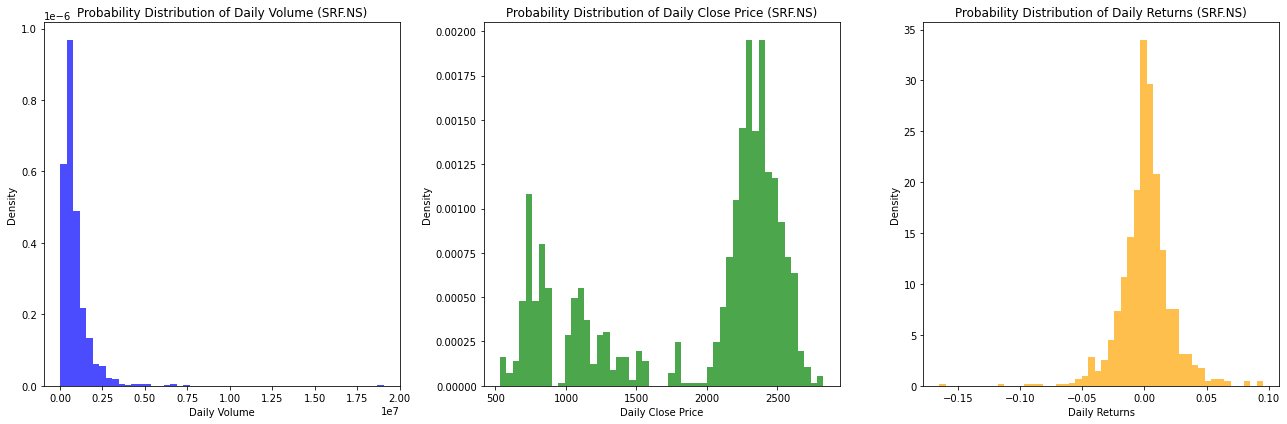

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


JUBLFOOD.NS - T-scores:
T-score for Daily Returns: 1.2980557634699554
T-score for Daily Volume: Ticker
JUBLFOOD.NS    36.768537
dtype: float64
T-score for Daily Close Price: Ticker
JUBLFOOD.NS    156.251469
dtype: float64
JUBLFOOD.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.0004296592841407552, 0.0021099320068444366)
Confidence Interval for Daily Volume: (Ticker
JUBLFOOD.NS    3.530861e+06
dtype: float64, Ticker
JUBLFOOD.NS    3.928900e+06
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
JUBLFOOD.NS    529.518823
dtype: float64, Ticker
JUBLFOOD.NS    542.985234
dtype: float64)


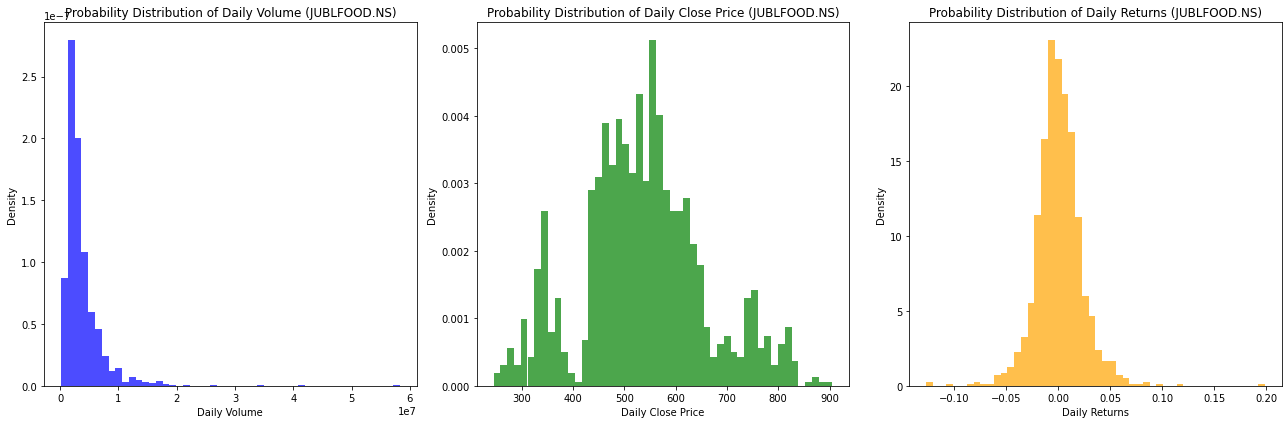

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


PEL.NS - T-scores:
T-score for Daily Returns: 0.8374487396564786
T-score for Daily Volume: Ticker
PEL.NS    38.206921
dtype: float64
T-score for Daily Close Price: Ticker
PEL.NS    136.799656
dtype: float64
PEL.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.0009131377743994622, 0.002273275760049589)
Confidence Interval for Daily Volume: (Ticker
PEL.NS    1.908402e+06
dtype: float64, Ticker
PEL.NS    2.115001e+06
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
PEL.NS    976.941491
dtype: float64, Ticker
PEL.NS    1005.370655
dtype: float64)


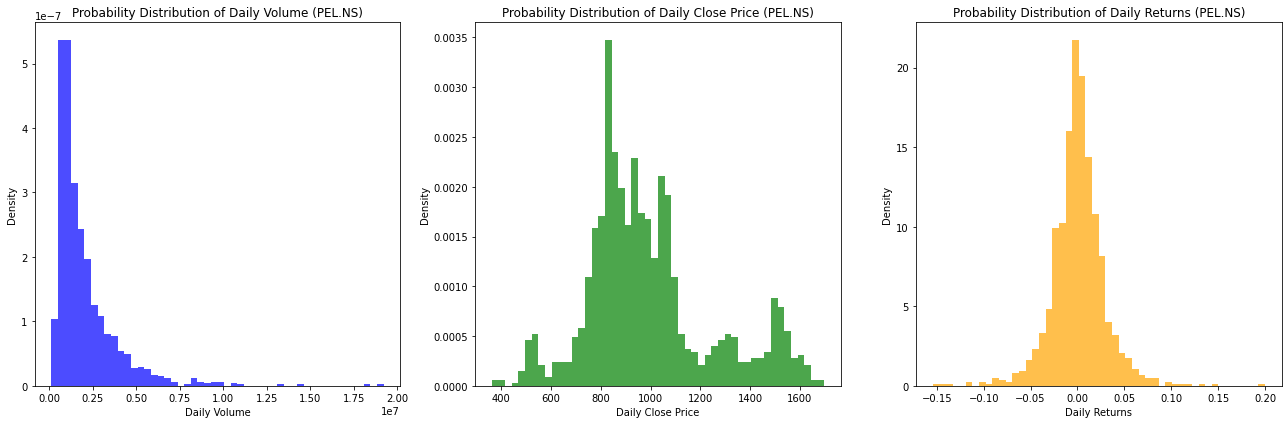

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


CROMPTON.NS - T-scores:
T-score for Daily Returns: 1.096853218483299
T-score for Daily Volume: Ticker
CROMPTON.NS    24.807269
dtype: float64
T-score for Daily Close Price: Ticker
CROMPTON.NS    166.162962
dtype: float64
CROMPTON.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.0005015847664377983, 0.0017735699154440288)
Confidence Interval for Daily Volume: (Ticker
CROMPTON.NS    2.012787e+06
dtype: float64, Ticker
CROMPTON.NS    2.358493e+06
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
CROMPTON.NS    343.41258
dtype: float64, Ticker
CROMPTON.NS    351.618878
dtype: float64)


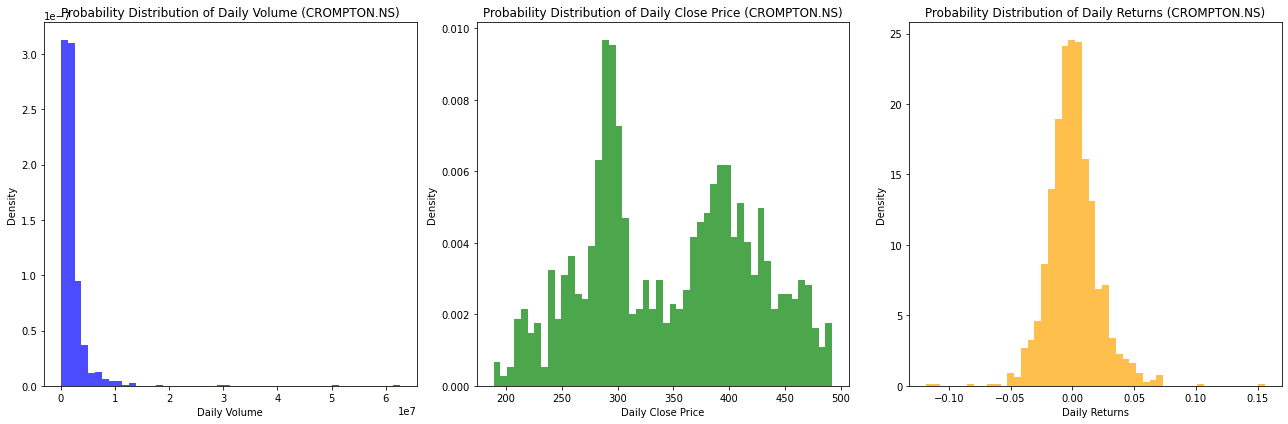

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


MPHASIS.NS - T-scores:
T-score for Daily Returns: 1.9722737072172196
T-score for Daily Volume: Ticker
MPHASIS.NS    19.008159
dtype: float64
T-score for Daily Close Price: Ticker
MPHASIS.NS    103.998899
dtype: float64
MPHASIS.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (6.638955551530046e-06, 0.0025183766154506073)
Confidence Interval for Daily Volume: (Ticker
MPHASIS.NS    542895.762785
dtype: float64, Ticker
MPHASIS.NS    667862.499644
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
MPHASIS.NS    2100.775626
dtype: float64, Ticker
MPHASIS.NS    2181.560312
dtype: float64)


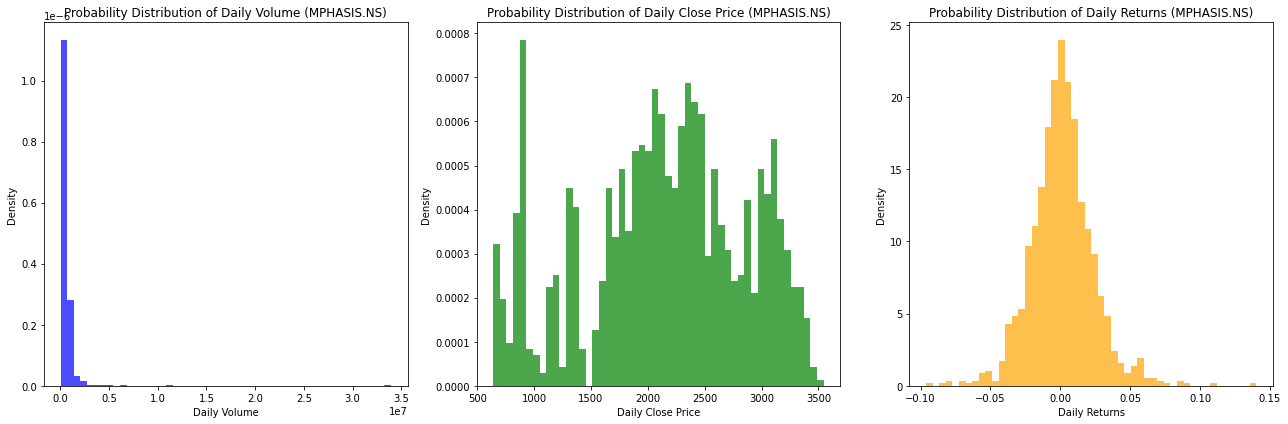

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


ABBOTINDIA.NS - T-scores:
T-score for Daily Returns: 1.6484166535909852
T-score for Daily Volume: Ticker
ABBOTINDIA.NS    44.844384
dtype: float64
T-score for Daily Close Price: Ticker
ABBOTINDIA.NS    156.122905
dtype: float64
ABBOTINDIA.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.000146041325819045, 0.0016819130202638732)
Confidence Interval for Daily Volume: (Ticker
ABBOTINDIA.NS    15262.730965
dtype: float64, Ticker
ABBOTINDIA.NS    16659.290225
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
ABBOTINDIA.NS    19932.094262
dtype: float64, Ticker
ABBOTINDIA.NS    20439.418309
dtype: float64)


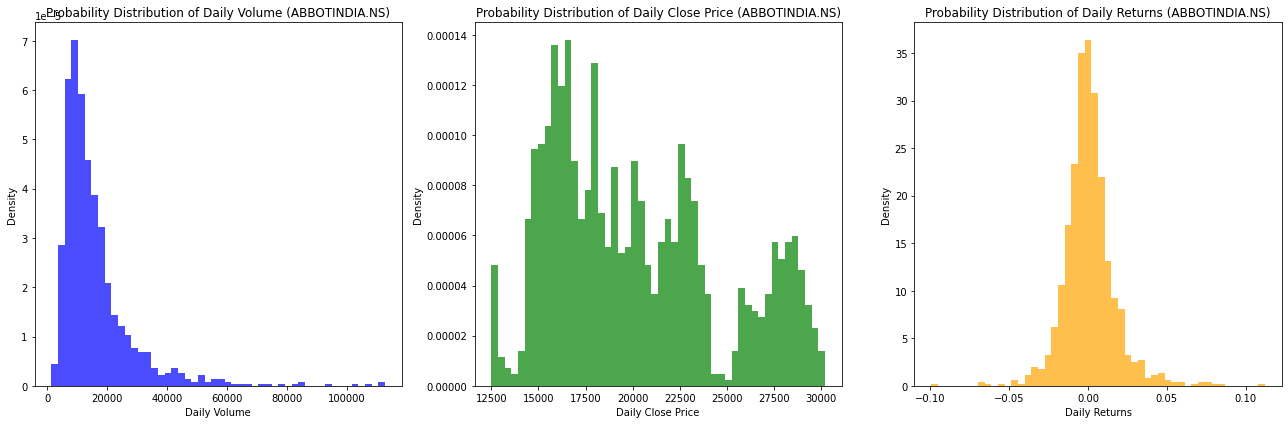

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


INDIAMART.NS - T-scores:
T-score for Daily Returns: 1.2241726229296421
T-score for Daily Volume: Ticker
INDIAMART.NS    30.252787
dtype: float64
T-score for Daily Close Price: Ticker
INDIAMART.NS    111.408378
dtype: float64
INDIAMART.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.0008747771657204092, 0.0037779492195083265)
Confidence Interval for Daily Volume: (Ticker
INDIAMART.NS    255228.66803
dtype: float64, Ticker
INDIAMART.NS    290627.582988
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
INDIAMART.NS    2594.697691
dtype: float64, Ticker
INDIAMART.NS    2687.721052
dtype: float64)


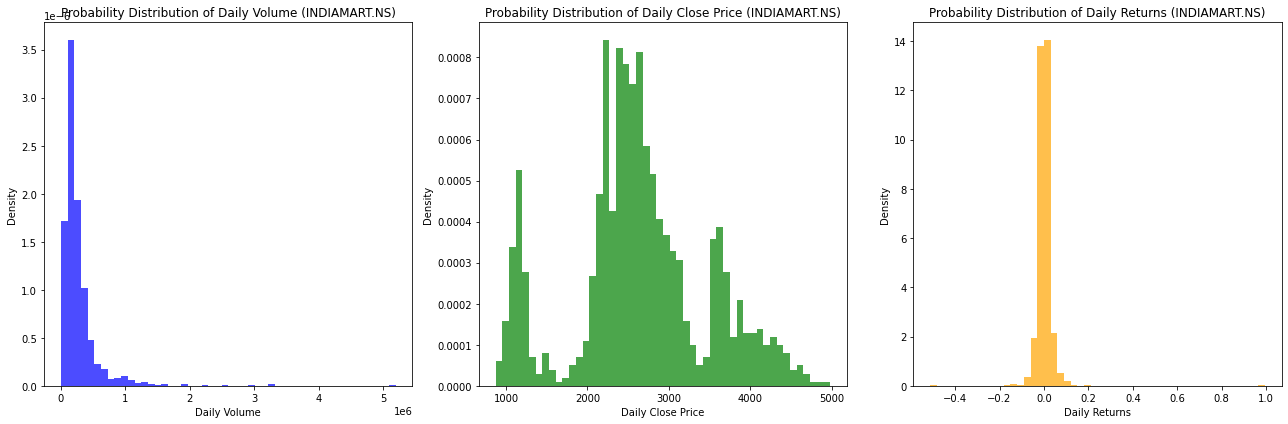

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


GLAND.NS - T-scores:
T-score for Daily Returns: 0.3554821120838876
T-score for Daily Volume: Ticker
GLAND.NS    14.828366
dtype: float64
T-score for Daily Close Price: Ticker
GLAND.NS    86.308189
dtype: float64
GLAND.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.0013054200126801797, 0.0018830132185711215)
Confidence Interval for Daily Volume: (Ticker
GLAND.NS    392814.457207
dtype: float64, Ticker
GLAND.NS    512638.849566
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
GLAND.NS    2234.793751
dtype: float64, Ticker
GLAND.NS    2338.78006
dtype: float64)


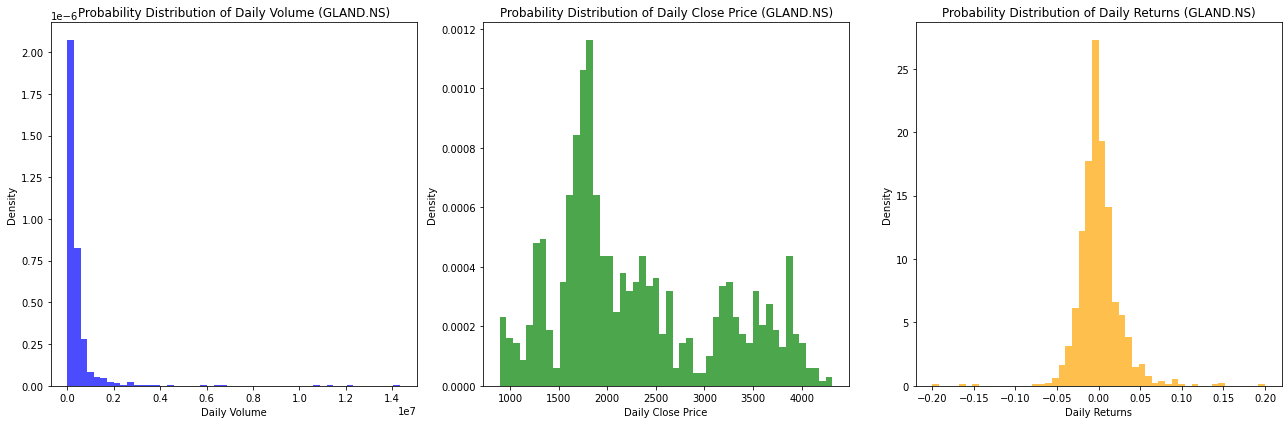

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MCDOWELL-N.NS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


MCDOWELL-N.NS - T-scores:
T-score for Daily Returns: nan
T-score for Daily Volume: Ticker
MCDOWELL-N.NS   NaN
dtype: float64
T-score for Daily Close Price: Ticker
MCDOWELL-N.NS   NaN
dtype: float64
MCDOWELL-N.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (nan, nan)
Confidence Interval for Daily Volume: (Ticker
MCDOWELL-N.NS   NaN
dtype: float64, Ticker
MCDOWELL-N.NS   NaN
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
MCDOWELL-N.NS   NaN
dtype: float64, Ticker
MCDOWELL-N.NS   NaN
dtype: float64)


C:\Users\Manan\anaconda3\lib\site-packages\numpy\lib\histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


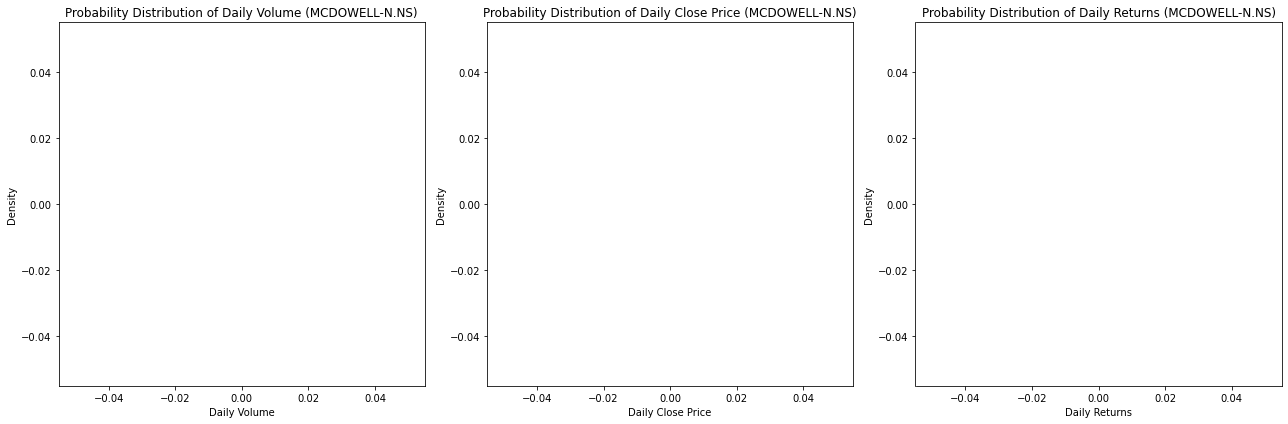

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


ICICIPRULI.NS - T-scores:
T-score for Daily Returns: 0.8434602040097178
T-score for Daily Volume: Ticker
ICICIPRULI.NS    41.754818
dtype: float64
T-score for Daily Close Price: Ticker
ICICIPRULI.NS    193.720011
dtype: float64
ICICIPRULI.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.0007198221247375455, 0.0018055131159181808)
Confidence Interval for Daily Volume: (Ticker
ICICIPRULI.NS    1.934219e+06
dtype: float64, Ticker
ICICIPRULI.NS    2.124944e+06
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
ICICIPRULI.NS    525.976091
dtype: float64, Ticker
ICICIPRULI.NS    536.738743
dtype: float64)


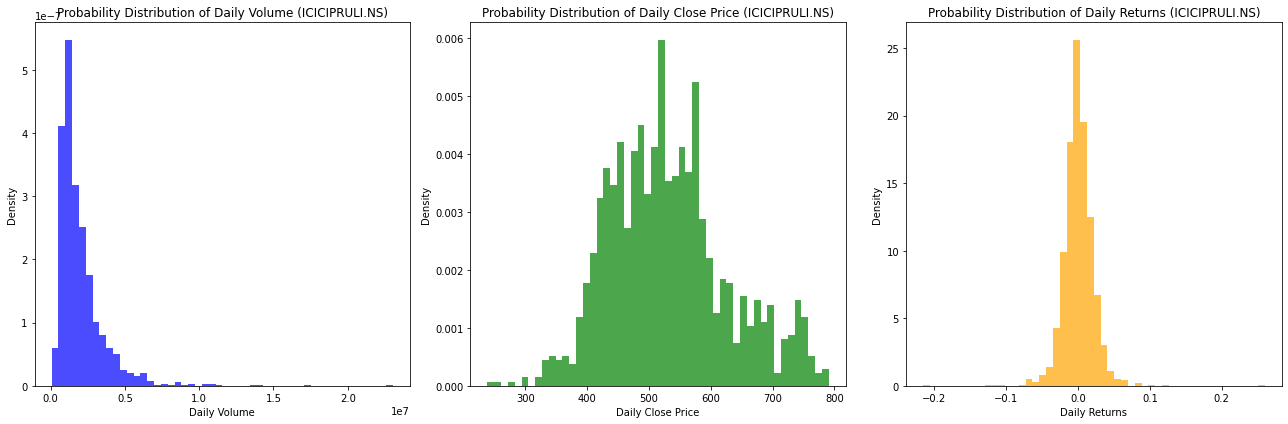

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


HINDZINC.NS - T-scores:
T-score for Daily Returns: 1.4179164593781666
T-score for Daily Volume: Ticker
HINDZINC.NS    21.292641
dtype: float64
T-score for Daily Close Price: Ticker
HINDZINC.NS    102.308733
dtype: float64
HINDZINC.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.0003893385499833238, 0.002418984840789059)
Confidence Interval for Daily Volume: (Ticker
HINDZINC.NS    1.366839e+06
dtype: float64, Ticker
HINDZINC.NS    1.644283e+06
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
HINDZINC.NS    315.332549
dtype: float64, Ticker
HINDZINC.NS    327.662807
dtype: float64)


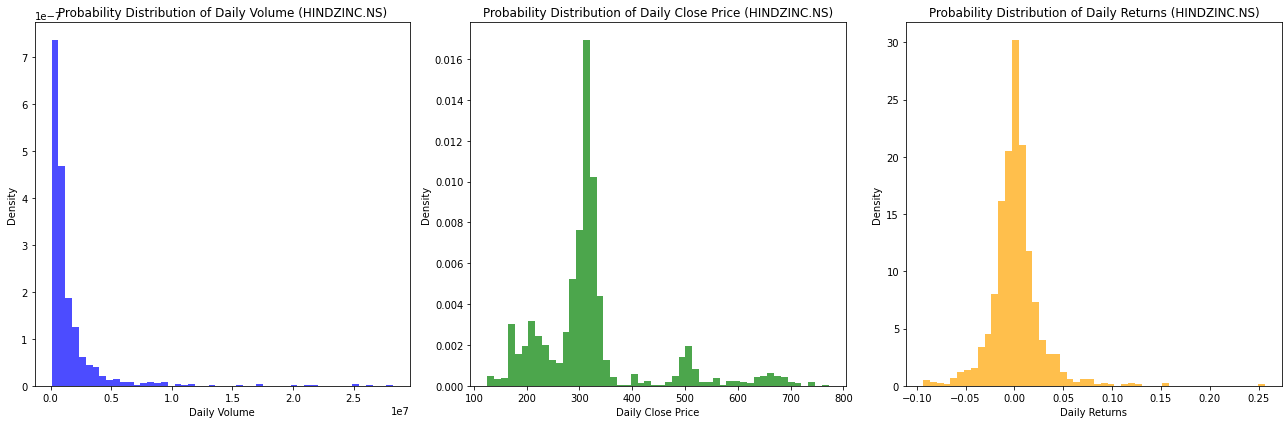

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


CANBK.NS - T-scores:
T-score for Daily Returns: 1.4051594573842745
T-score for Daily Volume: Ticker
CANBK.NS    41.527592
dtype: float64
T-score for Daily Close Price: Ticker
CANBK.NS    62.012399
dtype: float64
CANBK.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.00042956524855405497, 0.002597918394568099)
Confidence Interval for Daily Volume: (Ticker
CANBK.NS    5.831325e+07
dtype: float64, Ticker
CANBK.NS    6.409628e+07
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
CANBK.NS    53.748285
dtype: float64, Ticker
CANBK.NS    57.260289
dtype: float64)


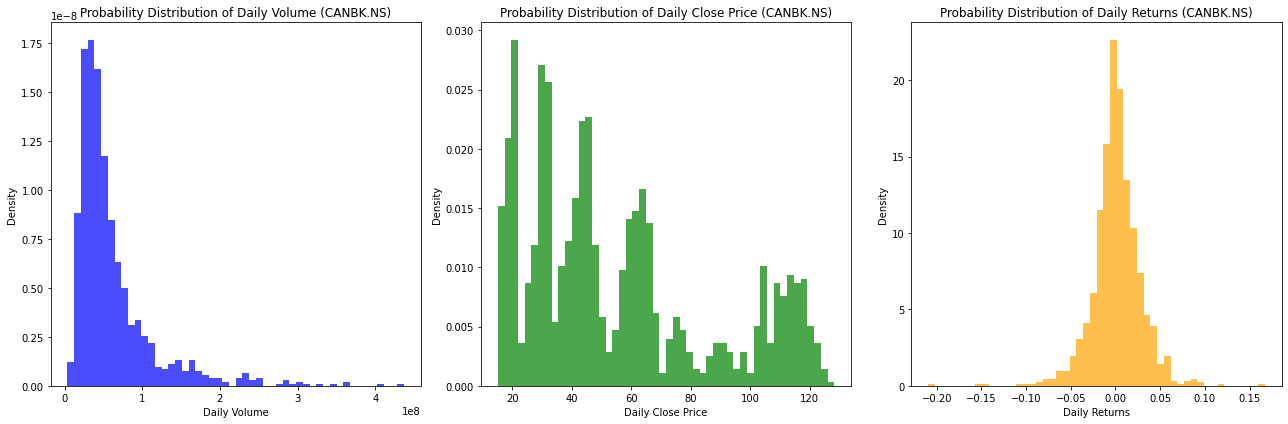

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


GODREJCP.NS - T-scores:
T-score for Daily Returns: 1.0355857139140041
T-score for Daily Volume: Ticker
GODREJCP.NS    38.060266
dtype: float64
T-score for Daily Close Price: Ticker
GODREJCP.NS    140.210382
dtype: float64
GODREJCP.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.00051311808323049, 0.0016604098378998683)
Confidence Interval for Daily Volume: (Ticker
GODREJCP.NS    1.313024e+06
dtype: float64, Ticker
GODREJCP.NS    1.455746e+06
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
GODREJCP.NS    915.287049
dtype: float64, Ticker
GODREJCP.NS    941.264947
dtype: float64)


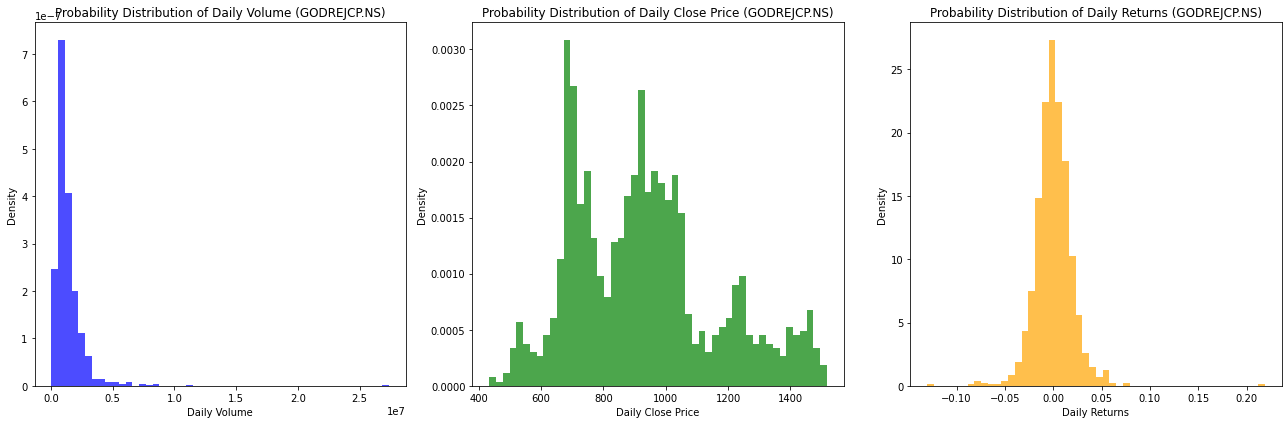

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


CHOLAFIN.NS - T-scores:
T-score for Daily Returns: 1.9540974989053594
T-score for Daily Volume: Ticker
CHOLAFIN.NS    28.014027
dtype: float64
T-score for Daily Close Price: Ticker
CHOLAFIN.NS    68.57373
dtype: float64
CHOLAFIN.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-6.482360486143035e-06, 0.003252427519909913)
Confidence Interval for Daily Volume: (Ticker
CHOLAFIN.NS    3.330497e+06
dtype: float64, Ticker
CHOLAFIN.NS    3.832115e+06
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
CHOLAFIN.NS    730.388901
dtype: float64, Ticker
CHOLAFIN.NS    773.412809
dtype: float64)


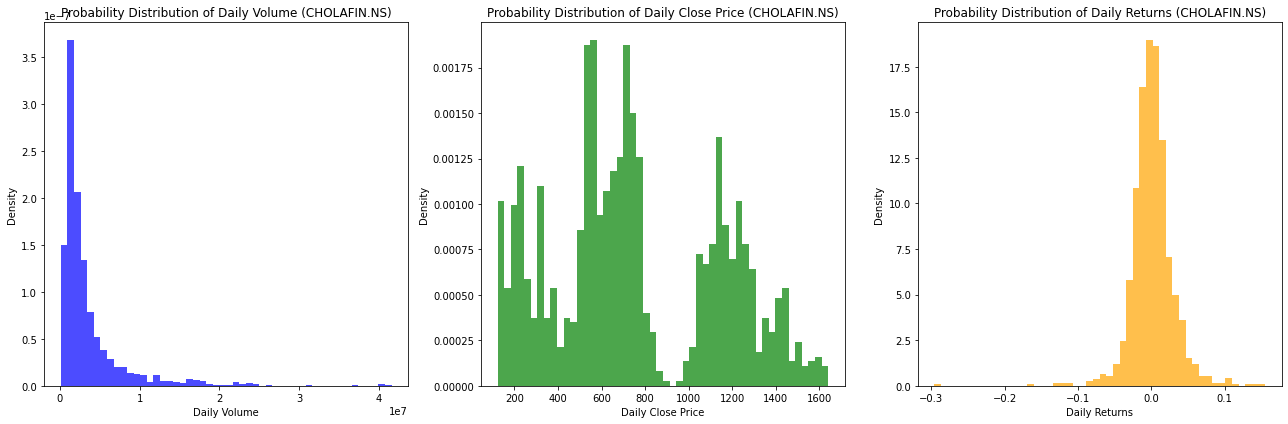

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


PNB.NS - T-scores:
T-score for Daily Returns: 1.0191133178978298
T-score for Daily Volume: Ticker
PNB.NS    37.12578
dtype: float64
T-score for Daily Close Price: Ticker
PNB.NS    64.162507
dtype: float64
PNB.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.0006915812855899827, 0.0021867188532648553)
Confidence Interval for Daily Volume: (Ticker
PNB.NS    6.021413e+07
dtype: float64, Ticker
PNB.NS    6.693319e+07
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
PNB.NS    55.933602
dtype: float64, Ticker
PNB.NS    59.462062
dtype: float64)


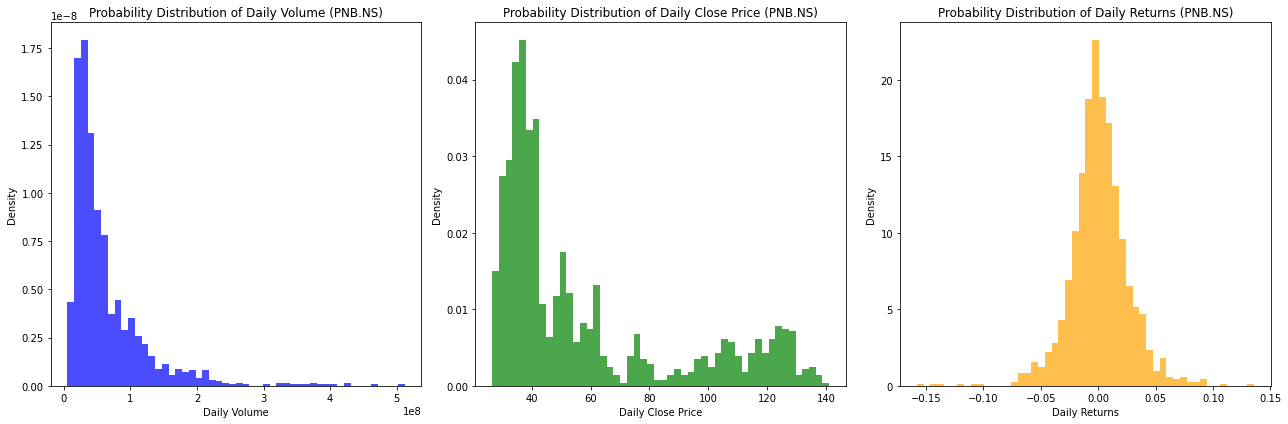

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


TVSMOTOR.NS - T-scores:
T-score for Daily Returns: 2.748224218958496
T-score for Daily Volume: Ticker
TVSMOTOR.NS    27.882082
dtype: float64
T-score for Daily Close Price: Ticker
TVSMOTOR.NS    53.557667
dtype: float64
TVSMOTOR.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (0.0004503846514869211, 0.002697837871273496)
Confidence Interval for Daily Volume: (Ticker
TVSMOTOR.NS    1.801047e+06
dtype: float64, Ticker
TVSMOTOR.NS    2.073690e+06
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
TVSMOTOR.NS    1057.031408
dtype: float64, Ticker
TVSMOTOR.NS    1137.417492
dtype: float64)


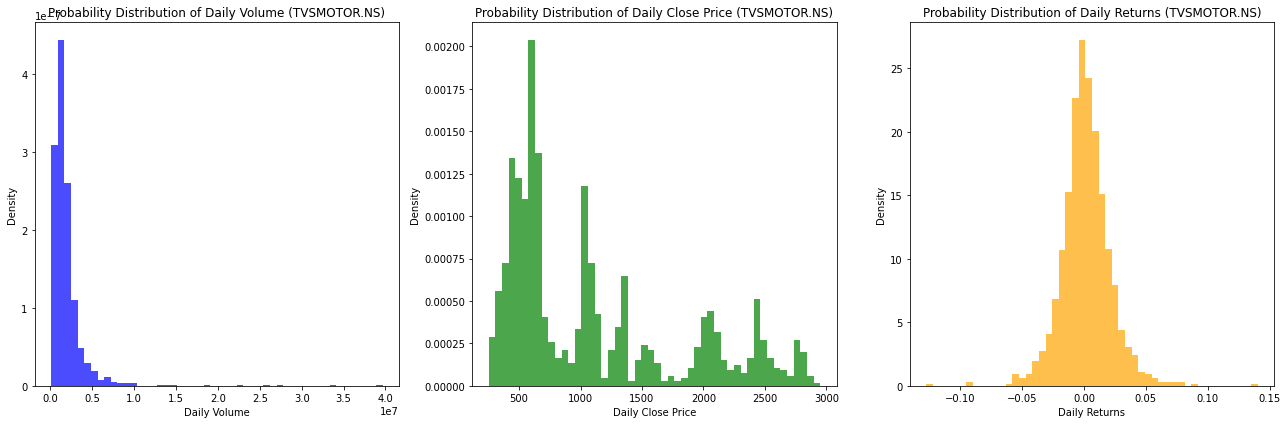

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


CUMMINSIND.NS - T-scores:
T-score for Daily Returns: 2.9340367655527944
T-score for Daily Volume: Ticker
CUMMINSIND.NS    29.280313
dtype: float64
T-score for Daily Close Price: Ticker
CUMMINSIND.NS    50.46515
dtype: float64
CUMMINSIND.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (0.000578862189185603, 0.002915311108707485)
Confidence Interval for Daily Volume: (Ticker
CUMMINSIND.NS    904552.378678
dtype: float64, Ticker
CUMMINSIND.NS    1.034475e+06
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
CUMMINSIND.NS    1418.856245
dtype: float64, Ticker
CUMMINSIND.NS    1533.638462
dtype: float64)


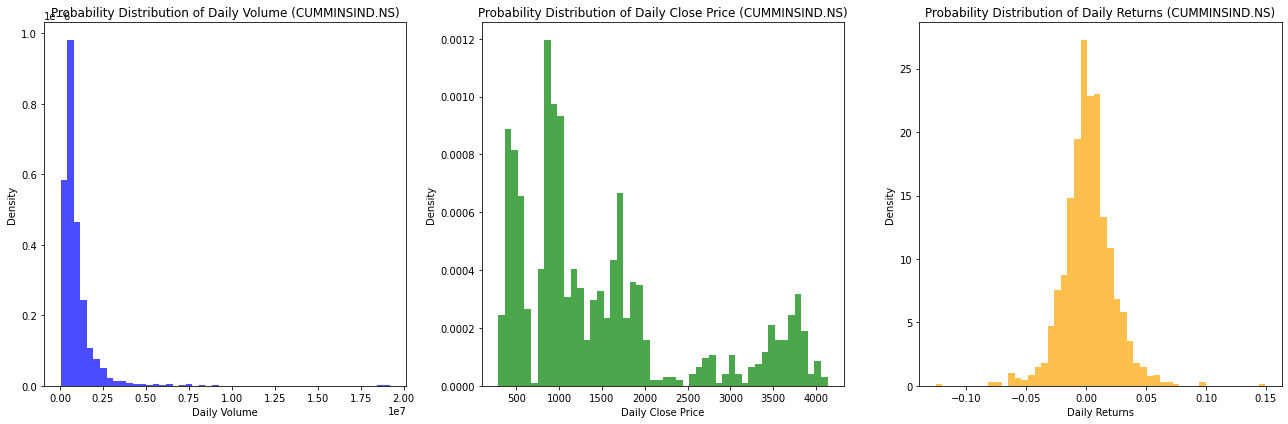

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


ASHOKLEY.NS - T-scores:
T-score for Daily Returns: 1.607932539853863
T-score for Daily Volume: Ticker
ASHOKLEY.NS    36.29963
dtype: float64
T-score for Daily Close Price: Ticker
ASHOKLEY.NS    97.343245
dtype: float64
ASHOKLEY.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.0002648863436081196, 0.0026714152685221155)
Confidence Interval for Daily Volume: (Ticker
ASHOKLEY.NS    1.908448e+07
dtype: float64, Ticker
ASHOKLEY.NS    2.126528e+07
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
ASHOKLEY.NS    137.223958
dtype: float64, Ticker
ASHOKLEY.NS    142.869082
dtype: float64)


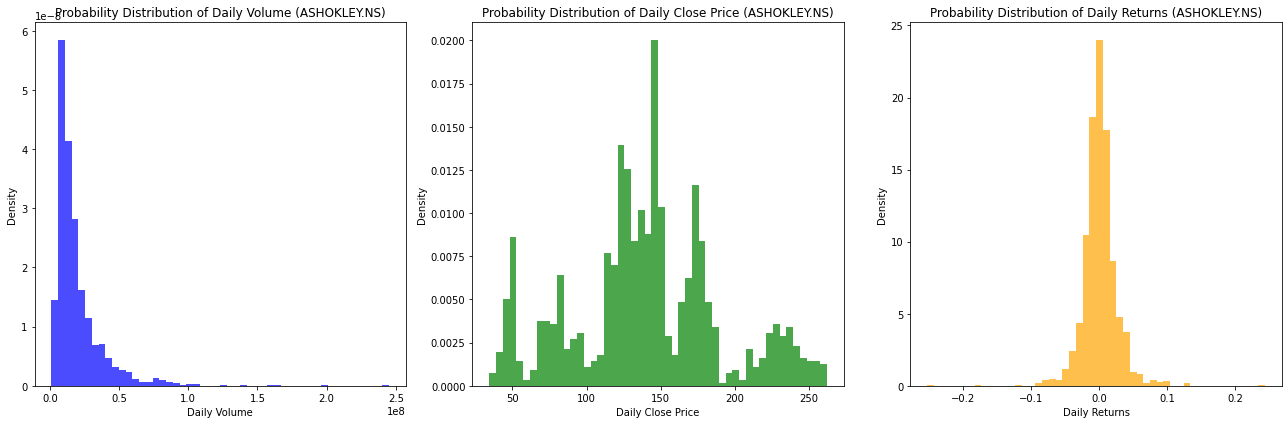

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


PFC.NS - T-scores:
T-score for Daily Returns: 2.340933329967843
T-score for Daily Volume: Ticker
PFC.NS    35.863754
dtype: float64
T-score for Daily Close Price: Ticker
PFC.NS    42.826915
dtype: float64
PFC.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (0.0002730273038780949, 0.0030994612715338353)
Confidence Interval for Daily Volume: (Ticker
PFC.NS    1.033967e+07
dtype: float64, Ticker
PFC.NS    1.153638e+07
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
PFC.NS    174.7948
dtype: float64, Ticker
PFC.NS    191.578353
dtype: float64)


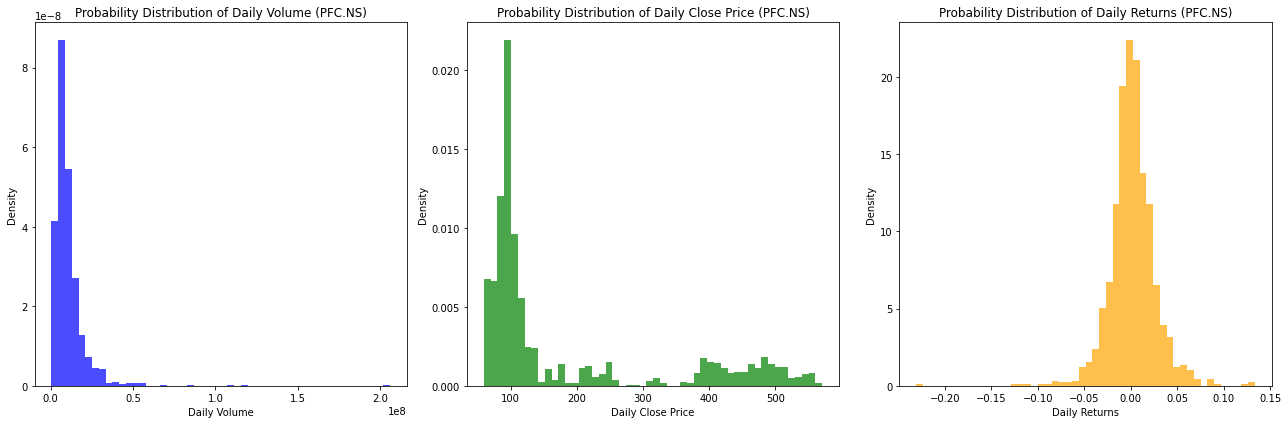

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


FEDERALBNK.NS - T-scores:
T-score for Daily Returns: 1.4763143774013865
T-score for Daily Volume: Ticker
FEDERALBNK.NS    46.712785
dtype: float64
T-score for Daily Close Price: Ticker
FEDERALBNK.NS    90.852103
dtype: float64
FEDERALBNK.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.0003299862311871161, 0.002336474776908886)
Confidence Interval for Daily Volume: (Ticker
FEDERALBNK.NS    1.825911e+07
dtype: float64, Ticker
FEDERALBNK.NS    1.986008e+07
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
FEDERALBNK.NS    109.681655
dtype: float64, Ticker
FEDERALBNK.NS    114.523235
dtype: float64)


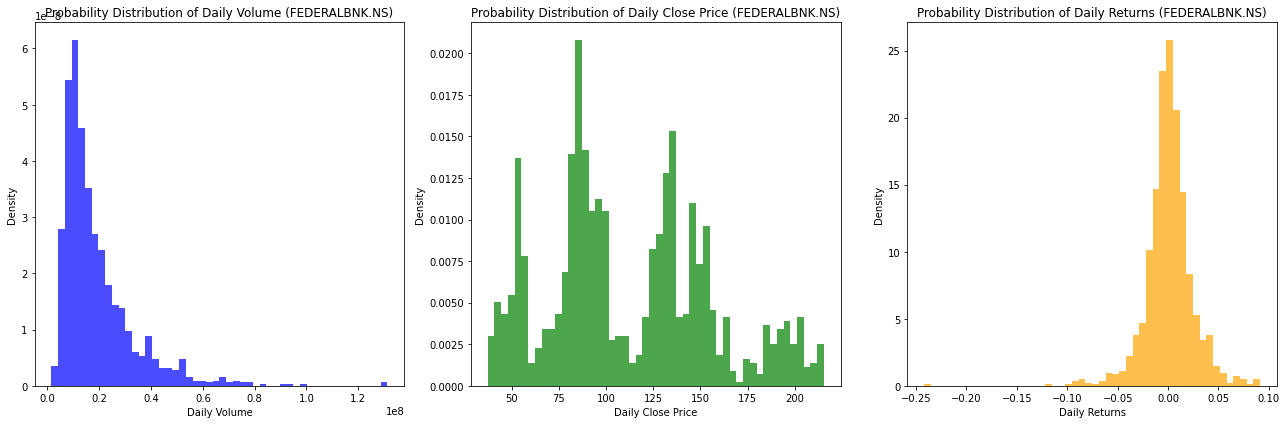

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


UBL.NS - T-scores:
T-score for Daily Returns: 1.0428303625476703
T-score for Daily Volume: Ticker
UBL.NS    33.823048
dtype: float64
T-score for Daily Close Price: Ticker
UBL.NS    167.592341
dtype: float64
UBL.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.00045230910171522687, 0.0014787393220484814)
Confidence Interval for Daily Volume: (Ticker
UBL.NS    400550.362489
dtype: float64, Ticker
UBL.NS    449879.414202
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
UBL.NS    1478.709712
dtype: float64, Ticker
UBL.NS    1513.740493
dtype: float64)


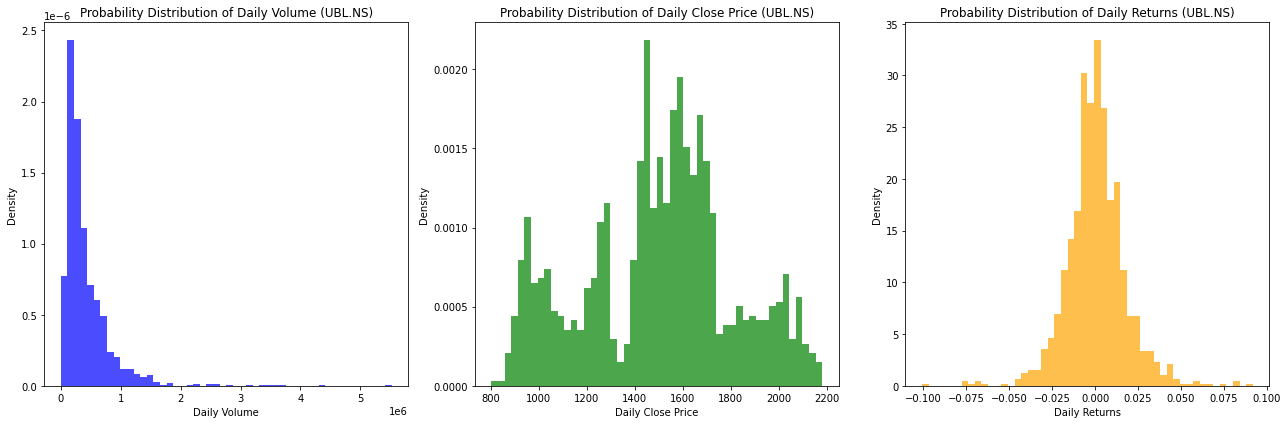

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


TATAPOWER.NS - T-scores:
T-score for Daily Returns: 2.7348289799855423
T-score for Daily Volume: Ticker
TATAPOWER.NS    30.678587
dtype: float64
T-score for Daily Close Price: Ticker
TATAPOWER.NS    58.851178
dtype: float64
TATAPOWER.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (0.0005504687962957682, 0.0033449543510270427)
Confidence Interval for Daily Volume: (Ticker
TATAPOWER.NS    2.419478e+07
dtype: float64, Ticker
TATAPOWER.NS    2.750071e+07
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
TATAPOWER.NS    204.481916
dtype: float64, Ticker
TATAPOWER.NS    218.585566
dtype: float64)


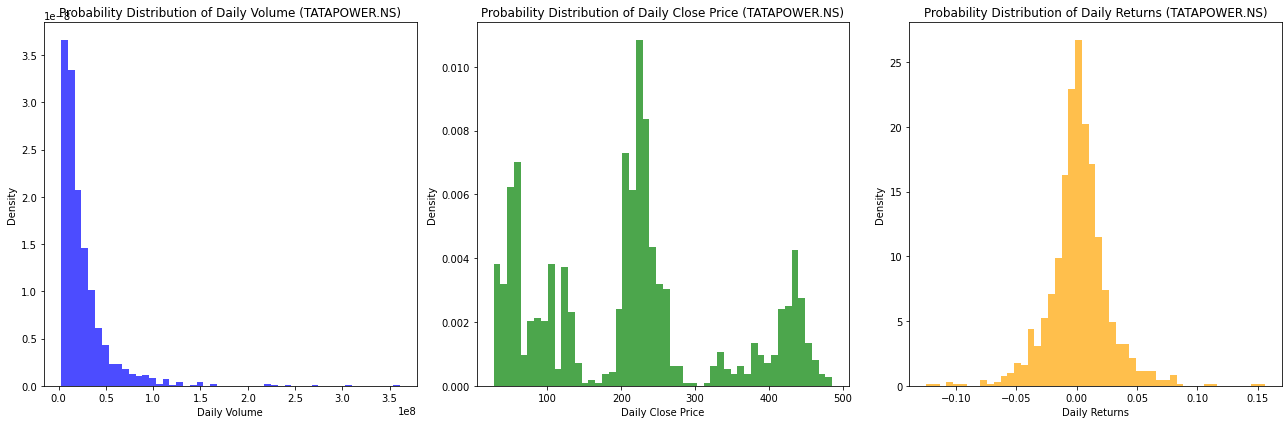

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


NAVINFLUOR.NS - T-scores:
T-score for Daily Returns: 1.9140318738559516
T-score for Daily Volume: Ticker
NAVINFLUOR.NS    30.883522
dtype: float64
T-score for Daily Close Price: Ticker
NAVINFLUOR.NS    121.18194
dtype: float64
NAVINFLUOR.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-3.304625730487696e-05, 0.0026756564557105624)
Confidence Interval for Daily Volume: (Ticker
NAVINFLUOR.NS    192238.703876
dtype: float64, Ticker
NAVINFLUOR.NS    218319.763931
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
NAVINFLUOR.NS    3301.182553
dtype: float64, Ticker
NAVINFLUOR.NS    3409.831952
dtype: float64)


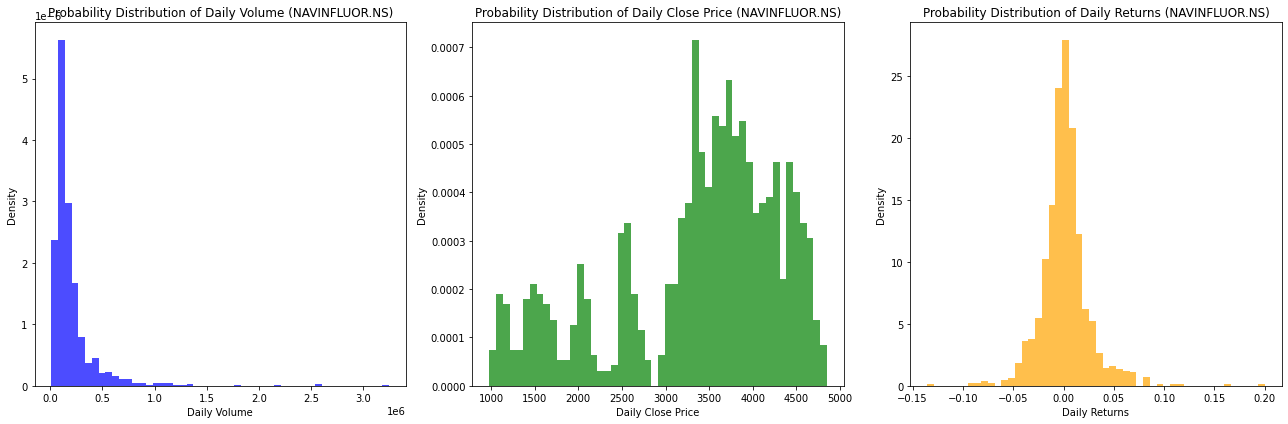

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


HINDALCO.NS - T-scores:
T-score for Daily Returns: 1.6909883097224463
T-score for Daily Volume: Ticker
HINDALCO.NS    50.792638
dtype: float64
T-score for Daily Close Price: Ticker
HINDALCO.NS    90.857717
dtype: float64
HINDALCO.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.0002024141074679481, 0.0027292658519238403)
Confidence Interval for Daily Volume: (Ticker
HINDALCO.NS    1.049646e+07
dtype: float64, Ticker
HINDALCO.NS    1.133990e+07
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
HINDALCO.NS    410.379452
dtype: float64, Ticker
HINDALCO.NS    428.493326
dtype: float64)


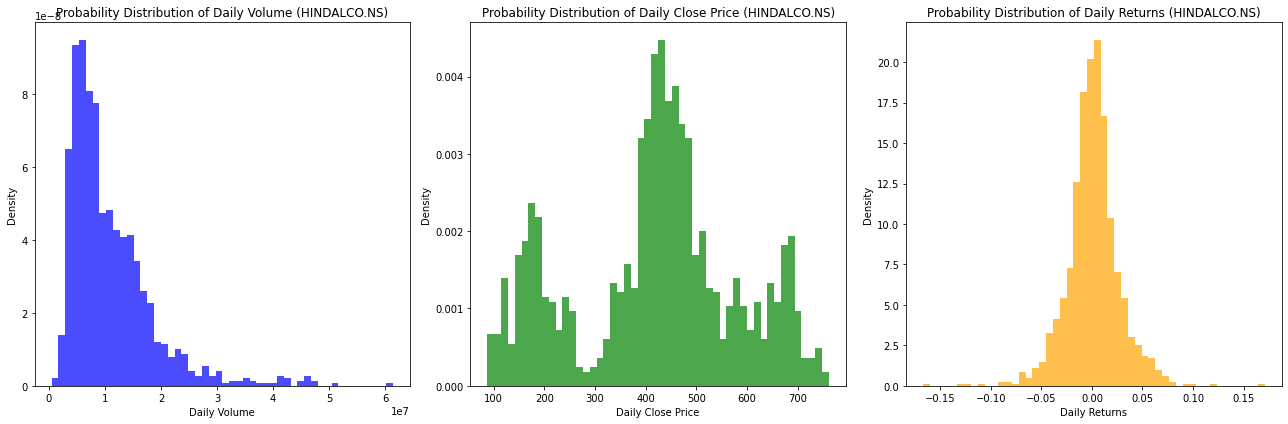

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


RECLTD.NS - T-scores:
T-score for Daily Returns: 2.328506132124125
T-score for Daily Volume: Ticker
RECLTD.NS    34.367372
dtype: float64
T-score for Daily Close Price: Ticker
RECLTD.NS    41.09509
dtype: float64
RECLTD.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (0.00026004107684170414, 0.003043292813919056)
Confidence Interval for Daily Volume: (Ticker
RECLTD.NS    9.846912e+06
dtype: float64, Ticker
RECLTD.NS    1.103922e+07
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
RECLTD.NS    189.739176
dtype: float64, Ticker
RECLTD.NS    208.76392
dtype: float64)


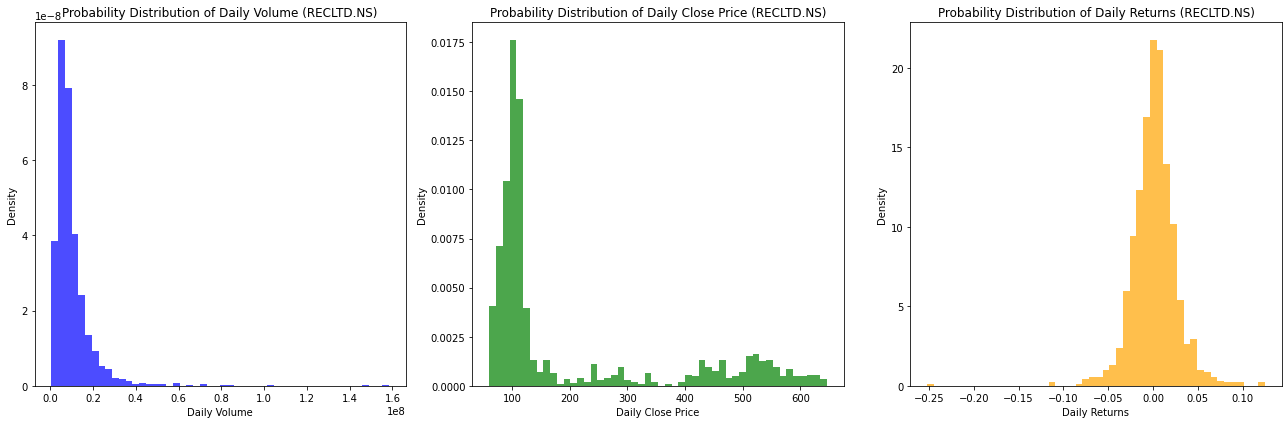

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


MFSL.NS - T-scores:
T-score for Daily Returns: 1.287229432863531
T-score for Daily Volume: Ticker
MFSL.NS    23.553586
dtype: float64
T-score for Daily Close Price: Ticker
MFSL.NS    143.546873
dtype: float64
MFSL.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (-0.00047610644346294053, 0.0022928628384860745)
Confidence Interval for Daily Volume: (Ticker
MFSL.NS    1.115112e+06
dtype: float64, Ticker
MFSL.NS    1.317758e+06
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
MFSL.NS    810.159276
dtype: float64, Ticker
MFSL.NS    832.611548
dtype: float64)


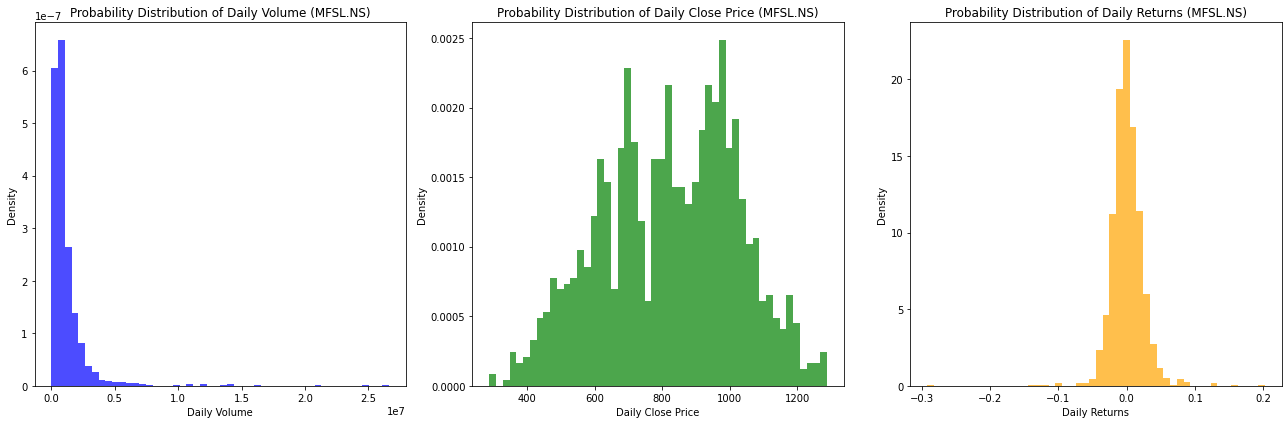

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


BHEL.NS - T-scores:
T-score for Daily Returns: 2.111833929404843
T-score for Daily Volume: Ticker
BHEL.NS    33.36044
dtype: float64
T-score for Daily Close Price: Ticker
BHEL.NS    41.730312
dtype: float64
BHEL.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (0.00013450507414162734, 0.003654589965886266)
Confidence Interval for Daily Volume: (Ticker
BHEL.NS    3.614053e+07
dtype: float64, Ticker
BHEL.NS    4.065692e+07
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
BHEL.NS    96.403555
dtype: float64, Ticker
BHEL.NS    105.915336
dtype: float64)


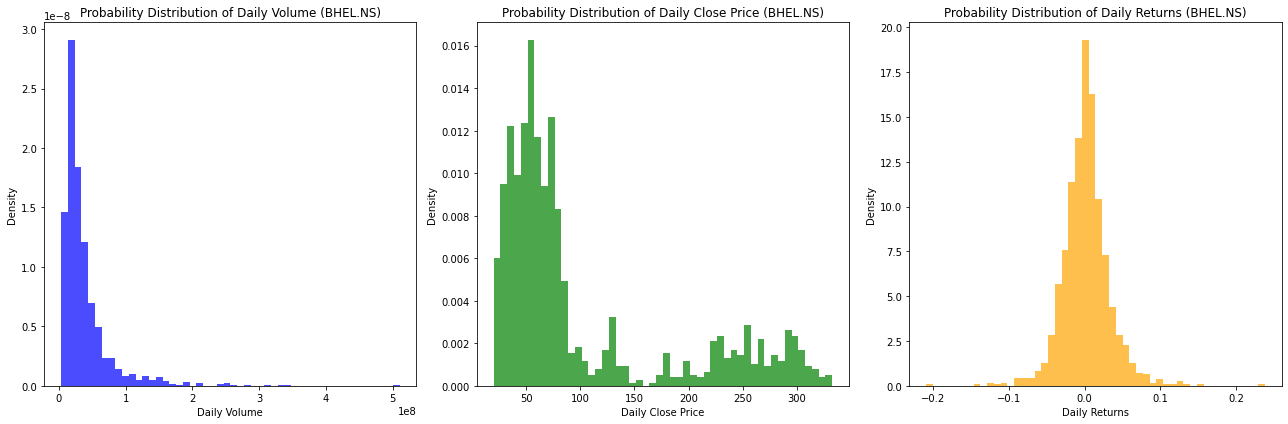

[*********************100%***********************]  1 of 1 completed
C:\Users\Manan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


BEL.NS - T-scores:
T-score for Daily Returns: 3.0769989005223257
T-score for Daily Volume: Ticker
BEL.NS    36.423473
dtype: float64
T-score for Daily Close Price: Ticker
BEL.NS    45.810383
dtype: float64
BEL.NS - Confidence Intervals:
Confidence Interval for Daily Returns: (0.0007721785903388426, 0.0034893229098604144)
Confidence Interval for Daily Volume: (Ticker
BEL.NS    2.814274e+07
dtype: float64, Ticker
BEL.NS    3.134708e+07
dtype: float64)
Confidence Interval for Daily Close Price: (Ticker
BEL.NS    104.709912
dtype: float64, Ticker
BEL.NS    114.079927
dtype: float64)


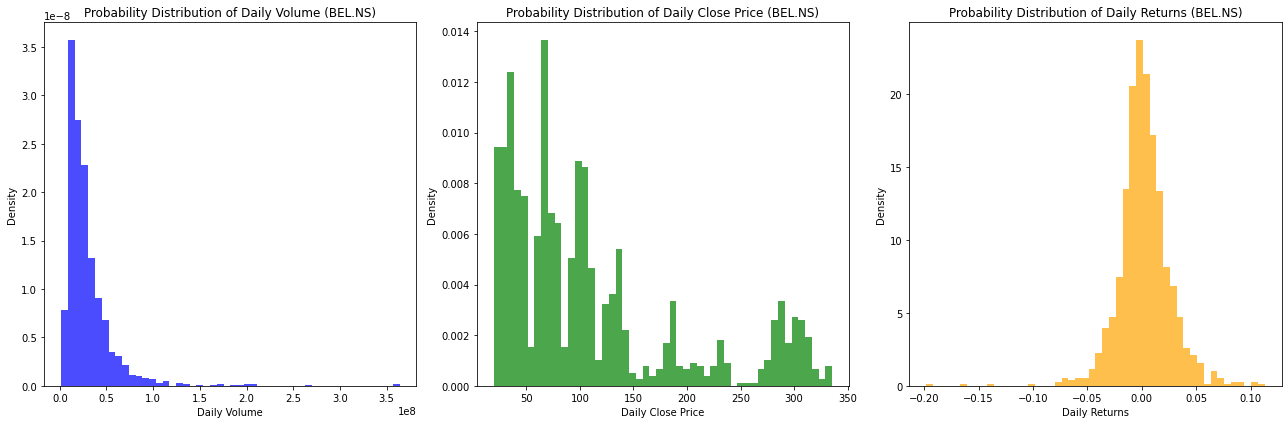

In [56]:
import yfinance as yf
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt


nse_stock_codes = [
    'RELIANCE.NS', 'TCS.NS', 'INFY.NS', 'HDFCBANK.NS', 'ICICIBANK.NS', 'HINDUNILVR.NS', 'SBIN.NS', 'BAJFINANCE.NS', 
    'BHARTIARTL.NS', 'HDFC.NS', 'ITC.NS', 'KOTAKBANK.NS', 'LT.NS', 'ASIANPAINT.NS', 'AXISBANK.NS', 'DMART.NS', 
    'MARUTI.NS', 'SUNPHARMA.NS', 'ULTRACEMCO.NS', 'TITAN.NS', 'NESTLEIND.NS', 'WIPRO.NS', 'M&M.NS', 'ONGC.NS', 
    'JSWSTEEL.NS', 'TECHM.NS', 'POWERGRID.NS', 'TATASTEEL.NS', 'NTPC.NS', 'SBILIFE.NS', 'ADANIENT.NS', 
    'ADANIGREEN.NS', 'ADANIPORTS.NS', 'BAJAJ-AUTO.NS', 'BPCL.NS', 'BRITANNIA.NS', 'CIPLA.NS', 'COALINDIA.NS', 
    'DIVISLAB.NS', 'DRREDDY.NS', 'EICHERMOT.NS', 'GRASIM.NS', 'HDFCLIFE.NS', 'HEROMOTOCO.NS', 'INDUSINDBK.NS', 
    'IOC.NS', 'SHREECEM.NS', 'TATAMOTORS.NS', 'UPL.NS', 'VEDL.NS', 'ZOMATO.NS', 'PIDILITIND.NS', 'SIEMENS.NS', 
    'GAILEQ.NS', 'DABUR.NS', 'HAVELLS.NS', 'BAJAJHLDNG.NS', 'ABB.NS', 'COLPAL.NS', 'LTI.NS', 'AUROPHARMA.NS', 
    'BERGEPAINT.NS', 'ICICIGI.NS', 'MOTHERSON.NS', 'BANKBARODA.NS', 'AMBUJACEM.NS', 'BOSCHLTD.NS', 
    'HINDPETRO.NS', 'TORNTPHARM.NS', 'BIOCON.NS', 'NMDC.NS', 'INDIGO.NS', 'LUPIN.NS', 'BANDHANBNK.NS', 
    'ADANITRANS.NS', 'HAL.NS', 'IDFCFIRSTB.NS', 'IRCTC.NS', 'MUTHOOTFIN.NS', 'DLF.NS', 'POLYCAB.NS', 
    'TRENT.NS', 'ALKEM.NS', 'SRF.NS', 'JUBLFOOD.NS', 'PEL.NS', 'CROMPTON.NS', 'MPHASIS.NS', 'ABBOTINDIA.NS', 
    'INDIAMART.NS', 'GLAND.NS', 'MCDOWELL-N.NS', 'ICICIPRULI.NS', 'HINDZINC.NS', 'CANBK.NS', 'GODREJCP.NS', 
    'CHOLAFIN.NS', 'PNB.NS', 'TVSMOTOR.NS', 'CUMMINSIND.NS', 'ASHOKLEY.NS', 'PFC.NS', 'FEDERALBNK.NS', 
    'UBL.NS', 'TATAPOWER.NS', 'NAVINFLUOR.NS', 'HINDALCO.NS', 'RECLTD.NS', 'MFSL.NS', 'BHEL.NS', 'BEL.NS'
]


def calculate_z_score(data):
    return (data - np.mean(data)) / np.std(data)

def calculate_t_score(data):
    sample_size = len(data)
    sample_mean = np.mean(data)
    sample_std = np.std(data, ddof=1)  # Sample standard deviation
    t_score = sample_mean / (sample_std / np.sqrt(sample_size))
    return t_score

def calculate_confidence_interval(data, confidence_level=0.95):
    sample_size = len(data)
    mean = np.mean(data)
    std_dev = np.std(data, ddof=1)
    alpha = 1 - confidence_level
    t_critical = stats.t.ppf(1 - alpha/2, df=sample_size-1)
    margin_of_error = t_critical * (std_dev / np.sqrt(sample_size))
    return mean - margin_of_error, mean + margin_of_error


def analyze_stock(stock_symbol):

    stock_data = yf.download(stock_symbol, start='2020-01-01', end='2024-12-31')

    
    stock_data['Daily Return'] = stock_data['Close'].pct_change()

    
    stock_data['Log Return'] = np.log(stock_data['Close'] / stock_data['Close'].shift(1))

    
    daily_returns = stock_data['Daily Return'].dropna()
    daily_volume = stock_data['Volume'].dropna()
    daily_close_price = stock_data['Close'].dropna()

    z_scores_returns = calculate_z_score(daily_returns)
    z_scores_volume = calculate_z_score(daily_volume)
    z_scores_close = calculate_z_score(daily_close_price)

    t_score_returns = calculate_t_score(daily_returns)
    t_score_volume = calculate_t_score(daily_volume)
    t_score_close = calculate_t_score(daily_close_price)

    conf_interval_returns = calculate_confidence_interval(daily_returns)
    conf_interval_volume = calculate_confidence_interval(daily_volume)
    conf_interval_close = calculate_confidence_interval(daily_close_price)

    print(f"{stock_symbol} - T-scores:")
    print(f"T-score for Daily Returns: {t_score_returns}")
    print(f"T-score for Daily Volume: {t_score_volume}")
    print(f"T-score for Daily Close Price: {t_score_close}")

    print(f"{stock_symbol} - Confidence Intervals:")
    print(f"Confidence Interval for Daily Returns: {conf_interval_returns}")
    print(f"Confidence Interval for Daily Volume: {conf_interval_volume}")
    print(f"Confidence Interval for Daily Close Price: {conf_interval_close}")

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    axes[0].hist(daily_volume, bins=50, alpha=0.7, color='blue', density=True)
    axes[0].set_title(f'Probability Distribution of Daily Volume ({stock_symbol})')
    axes[0].set_xlabel('Daily Volume')
    axes[0].set_ylabel('Density')

    axes[1].hist(daily_close_price, bins=50, alpha=0.7, color='green', density=True)
    axes[1].set_title(f'Probability Distribution of Daily Close Price ({stock_symbol})')
    axes[1].set_xlabel('Daily Close Price')
    axes[1].set_ylabel('Density')

    axes[2].hist(daily_returns, bins=50, alpha=0.7, color='orange', density=True)
    axes[2].set_title(f'Probability Distribution of Daily Returns ({stock_symbol})')
    axes[2].set_xlabel('Daily Returns')
    axes[2].set_ylabel('Density')

    plt.tight_layout()
    plt.show()

for stock_symbol in nse_stock_codes:
    analyze_stock(stock_symbol)


# Bonus

In [61]:
import yfinance as yf
import numpy as np
import pandas as pd
import statsmodels.tsa.stattools as adf

nse_stock_codes = [
    'RELIANCE.NS', 'TCS.NS', 'INFY.NS', 'HDFCBANK.NS', 'ICICIBANK.NS', 'HINDUNILVR.NS', 'SBIN.NS', 'BAJFINANCE.NS', 
    'BHARTIARTL.NS', 'HDFC.NS', 'ITC.NS', 'KOTAKBANK.NS', 'LT.NS', 'ASIANPAINT.NS', 'AXISBANK.NS', 'DMART.NS', 
    'MARUTI.NS', 'SUNPHARMA.NS', 'ULTRACEMCO.NS', 'TITAN.NS', 'NESTLEIND.NS', 'WIPRO.NS', 'M&M.NS', 'ONGC.NS', 
    'JSWSTEEL.NS', 'TECHM.NS', 'POWERGRID.NS', 'TATASTEEL.NS', 'NTPC.NS', 'SBILIFE.NS', 'ADANIENT.NS', 
    'ADANIGREEN.NS', 'ADANIPORTS.NS', 'BAJAJ-AUTO.NS', 'BPCL.NS', 'BRITANNIA.NS', 'CIPLA.NS', 'COALINDIA.NS', 
    'DIVISLAB.NS', 'DRREDDY.NS', 'EICHERMOT.NS', 'GRASIM.NS', 'HDFCLIFE.NS', 'HEROMOTOCO.NS', 'INDUSINDBK.NS', 
    'IOC.NS', 'SHREECEM.NS', 'TATAMOTORS.NS', 'UPL.NS', 'VEDL.NS', 'ZOMATO.NS', 'PIDILITIND.NS', 'SIEMENS.NS', 
    'GAILEQ.NS', 'DABUR.NS', 'HAVELLS.NS', 'BAJAJHLDNG.NS', 'ABB.NS', 'COLPAL.NS', 'LTI.NS', 'AUROPHARMA.NS', 
    'BERGEPAINT.NS', 'ICICIGI.NS', 'MOTHERSON.NS', 'BANKBARODA.NS', 'AMBUJACEM.NS', 'BOSCHLTD.NS', 
    'HINDPETRO.NS', 'TORNTPHARM.NS', 'BIOCON.NS', 'NMDC.NS', 'INDIGO.NS', 'LUPIN.NS', 'BANDHANBNK.NS', 
    'ADANITRANS.NS', 'HAL.NS', 'IDFCFIRSTB.NS', 'IRCTC.NS', 'MUTHOOTFIN.NS', 'DLF.NS', 'POLYCAB.NS', 
    'TRENT.NS', 'ALKEM.NS', 'SRF.NS', 'JUBLFOOD.NS', 'PEL.NS', 'CROMPTON.NS', 'MPHASIS.NS', 'ABBOTINDIA.NS', 
    'INDIAMART.NS', 'GLAND.NS', 'MCDOWELL-N.NS', 'ICICIPRULI.NS', 'HINDZINC.NS', 'CANBK.NS', 'GODREJCP.NS', 
    'CHOLAFIN.NS', 'PNB.NS', 'TVSMOTOR.NS', 'CUMMINSIND.NS', 'ASHOKLEY.NS', 'PFC.NS', 'FEDERALBNK.NS', 
    'UBL.NS', 'TATAPOWER.NS', 'NAVINFLUOR.NS', 'HINDALCO.NS', 'RECLTD.NS', 'MFSL.NS', 'BHEL.NS', 'BEL.NS'
]

def calculate_yearly_returns(stock_symbol):
    stock_data = yf.download(stock_symbol, start='2010-01-01', end='2024-12-31')
    
    stock_data['Yearly Return'] = stock_data['Close'].resample('Y').ffill().pct_change()
    
    
    return stock_data['Yearly Return'].dropna()



def perform_adf_test(stock_symbol):
    # Get the yearly returns for the stock
    yearly_returns = calculate_yearly_returns(stock_symbol)

    if yearly_returns.nunique() == 1:
        print(f"{stock_symbol}: Constant series detected!")
        return np.nan, np.nan  


    result = adf.adfuller(yearly_returns)
    

    adf_statistic = result[0]
    p_value = result[1]
    
    return adf_statistic, p_value

def check_stationarity(adf_statistic, p_value, significance_level=0.05):
    if np.isnan(adf_statistic):  # Check for constant series (NaN result)
        return "Constant (Invalid Input)"
    elif p_value < significance_level:
        return "Stationary"
    else:
        return "Non-Stationary"

stationarity_results = []

for stock_symbol in nse_stock_codes:
    try:
        print(f"Processing {stock_symbol}...")
        adf_statistic, p_value = perform_adf_test(stock_symbol)
        stationarity = check_stationarity(adf_statistic, p_value)
        # Store the result
        stationarity_results.append({
            'Stock Symbol': stock_symbol,
            'ADF Statistic': adf_statistic,
            'p-value': p_value,
            'Stationarity': stationarity
        })
    except:
        print(f'Error for this stock{stock_symbol}')


stationarity_df = pd.DataFrame(stationarity_results)

print(stationarity_df.head())

stationarity_df.to_csv('stationarity_results.csv', index=False)



Processing RELIANCE.NS...


[*********************100%***********************]  1 of 1 completed


Processing TCS.NS...


[*********************100%***********************]  1 of 1 completed


Processing INFY.NS...


[*********************100%***********************]  1 of 1 completed


Processing HDFCBANK.NS...


[*********************100%***********************]  1 of 1 completed


Processing ICICIBANK.NS...


[*********************100%***********************]  1 of 1 completed


Processing HINDUNILVR.NS...


[*********************100%***********************]  1 of 1 completed


Processing SBIN.NS...


[*********************100%***********************]  1 of 1 completed


Processing BAJFINANCE.NS...


[*********************100%***********************]  1 of 1 completed


Processing BHARTIARTL.NS...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['HDFC.NS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Processing HDFC.NS...
Error for this stockHDFC.NS
Processing ITC.NS...


[*********************100%***********************]  1 of 1 completed


Processing KOTAKBANK.NS...


[*********************100%***********************]  1 of 1 completed


Processing LT.NS...


[*********************100%***********************]  1 of 1 completed


Processing ASIANPAINT.NS...


[*********************100%***********************]  1 of 1 completed


Processing AXISBANK.NS...


[*********************100%***********************]  1 of 1 completed


Processing DMART.NS...


[*********************100%***********************]  1 of 1 completed


Processing MARUTI.NS...


[*********************100%***********************]  1 of 1 completed


Processing SUNPHARMA.NS...


[*********************100%***********************]  1 of 1 completed


Processing ULTRACEMCO.NS...


[*********************100%***********************]  1 of 1 completed


Processing TITAN.NS...


[*********************100%***********************]  1 of 1 completed


Processing NESTLEIND.NS...


[*********************100%***********************]  1 of 1 completed


Processing WIPRO.NS...


[*********************100%***********************]  1 of 1 completed


Processing M&M.NS...


[*********************100%***********************]  1 of 1 completed


Processing ONGC.NS...


[*********************100%***********************]  1 of 1 completed


Processing JSWSTEEL.NS...


[*********************100%***********************]  1 of 1 completed


Processing TECHM.NS...


[*********************100%***********************]  1 of 1 completed


Processing POWERGRID.NS...


[*********************100%***********************]  1 of 1 completed


Processing TATASTEEL.NS...


[*********************100%***********************]  1 of 1 completed


Processing NTPC.NS...


[*********************100%***********************]  1 of 1 completed


Processing SBILIFE.NS...


[*********************100%***********************]  1 of 1 completed


Processing ADANIENT.NS...


[*********************100%***********************]  1 of 1 completed


Processing ADANIGREEN.NS...


[*********************100%***********************]  1 of 1 completed


Error for this stockADANIGREEN.NS
Processing ADANIPORTS.NS...


[*********************100%***********************]  1 of 1 completed


Processing BAJAJ-AUTO.NS...


[*********************100%***********************]  1 of 1 completed


Processing BPCL.NS...


[*********************100%***********************]  1 of 1 completed


Processing BRITANNIA.NS...


[*********************100%***********************]  1 of 1 completed


Processing CIPLA.NS...


[*********************100%***********************]  1 of 1 completed


Processing COALINDIA.NS...


[*********************100%***********************]  1 of 1 completed


Processing DIVISLAB.NS...


[*********************100%***********************]  1 of 1 completed


Processing DRREDDY.NS...


[*********************100%***********************]  1 of 1 completed


Processing EICHERMOT.NS...


[*********************100%***********************]  1 of 1 completed


Processing GRASIM.NS...


[*********************100%***********************]  1 of 1 completed


Processing HDFCLIFE.NS...


[*********************100%***********************]  1 of 1 completed


Processing HEROMOTOCO.NS...


[*********************100%***********************]  1 of 1 completed


Processing INDUSINDBK.NS...


[*********************100%***********************]  1 of 1 completed


Processing IOC.NS...


[*********************100%***********************]  1 of 1 completed


Processing SHREECEM.NS...


[*********************100%***********************]  1 of 1 completed


Processing TATAMOTORS.NS...


[*********************100%***********************]  1 of 1 completed


Processing UPL.NS...


[*********************100%***********************]  1 of 1 completed


Processing VEDL.NS...


[*********************100%***********************]  1 of 1 completed


Processing ZOMATO.NS...


[*********************100%***********************]  1 of 1 completed


Error for this stockZOMATO.NS
Processing PIDILITIND.NS...


[*********************100%***********************]  1 of 1 completed


Processing SIEMENS.NS...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['GAILEQ.NS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Processing GAILEQ.NS...
Error for this stockGAILEQ.NS
Processing DABUR.NS...


[*********************100%***********************]  1 of 1 completed


Processing HAVELLS.NS...


[*********************100%***********************]  1 of 1 completed


Processing BAJAJHLDNG.NS...


[*********************100%***********************]  1 of 1 completed


Processing ABB.NS...


[*********************100%***********************]  1 of 1 completed


Processing COLPAL.NS...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['LTI.NS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Processing LTI.NS...
Error for this stockLTI.NS
Processing AUROPHARMA.NS...


[*********************100%***********************]  1 of 1 completed


Processing BERGEPAINT.NS...


[*********************100%***********************]  1 of 1 completed


Processing ICICIGI.NS...


[*********************100%***********************]  1 of 1 completed


Processing MOTHERSON.NS...


[*********************100%***********************]  1 of 1 completed


Processing BANKBARODA.NS...


[*********************100%***********************]  1 of 1 completed


Processing AMBUJACEM.NS...


[*********************100%***********************]  1 of 1 completed


Processing BOSCHLTD.NS...


[*********************100%***********************]  1 of 1 completed


Processing HINDPETRO.NS...


[*********************100%***********************]  1 of 1 completed


Processing TORNTPHARM.NS...


[*********************100%***********************]  1 of 1 completed


Processing BIOCON.NS...


[*********************100%***********************]  1 of 1 completed


Processing NMDC.NS...


[*********************100%***********************]  1 of 1 completed


Processing INDIGO.NS...


[*********************100%***********************]  1 of 1 completed


Processing LUPIN.NS...


[*********************100%***********************]  1 of 1 completed


Processing BANDHANBNK.NS...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['ADANITRANS.NS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Error for this stockBANDHANBNK.NS
Processing ADANITRANS.NS...
Error for this stockADANITRANS.NS
Processing HAL.NS...


[*********************100%***********************]  1 of 1 completed


Error for this stockHAL.NS
Processing IDFCFIRSTB.NS...


[*********************100%***********************]  1 of 1 completed


Processing IRCTC.NS...


[*********************100%***********************]  1 of 1 completed


Error for this stockIRCTC.NS
Processing MUTHOOTFIN.NS...


[*********************100%***********************]  1 of 1 completed


Processing DLF.NS...


[*********************100%***********************]  1 of 1 completed


Processing POLYCAB.NS...


[*********************100%***********************]  1 of 1 completed


Error for this stockPOLYCAB.NS
Processing TRENT.NS...


[*********************100%***********************]  1 of 1 completed


Processing ALKEM.NS...


[*********************100%***********************]  1 of 1 completed


Processing SRF.NS...


[*********************100%***********************]  1 of 1 completed


Processing JUBLFOOD.NS...


[*********************100%***********************]  1 of 1 completed


Processing PEL.NS...


[*********************100%***********************]  1 of 1 completed


Processing CROMPTON.NS...


[*********************100%***********************]  1 of 1 completed


Processing MPHASIS.NS...


[*********************100%***********************]  1 of 1 completed


Processing ABBOTINDIA.NS...


[*********************100%***********************]  1 of 1 completed


Processing INDIAMART.NS...


[*********************100%***********************]  1 of 1 completed


Error for this stockINDIAMART.NS
Processing GLAND.NS...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MCDOWELL-N.NS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


GLAND.NS: Constant series detected!
Processing MCDOWELL-N.NS...
Error for this stockMCDOWELL-N.NS
Processing ICICIPRULI.NS...


[*********************100%***********************]  1 of 1 completed


Processing HINDZINC.NS...


[*********************100%***********************]  1 of 1 completed


Processing CANBK.NS...


[*********************100%***********************]  1 of 1 completed


Processing GODREJCP.NS...


[*********************100%***********************]  1 of 1 completed


Processing CHOLAFIN.NS...


[*********************100%***********************]  1 of 1 completed


Processing PNB.NS...


[*********************100%***********************]  1 of 1 completed


Processing TVSMOTOR.NS...


[*********************100%***********************]  1 of 1 completed


Processing CUMMINSIND.NS...


[*********************100%***********************]  1 of 1 completed


Processing ASHOKLEY.NS...


[*********************100%***********************]  1 of 1 completed


Processing PFC.NS...


[*********************100%***********************]  1 of 1 completed


Processing FEDERALBNK.NS...


[*********************100%***********************]  1 of 1 completed


Processing UBL.NS...


[*********************100%***********************]  1 of 1 completed


Processing TATAPOWER.NS...


[*********************100%***********************]  1 of 1 completed


Processing NAVINFLUOR.NS...


[*********************100%***********************]  1 of 1 completed


Processing HINDALCO.NS...


[*********************100%***********************]  1 of 1 completed


Processing RECLTD.NS...


[*********************100%***********************]  1 of 1 completed


Processing MFSL.NS...


[*********************100%***********************]  1 of 1 completed


Processing BHEL.NS...


[*********************100%***********************]  1 of 1 completed


Processing BEL.NS...


[*********************100%***********************]  1 of 1 completed

   Stock Symbol  ADF Statistic       p-value    Stationarity
0   RELIANCE.NS      -2.528143  1.087761e-01  Non-Stationary
1        TCS.NS      -4.337040  3.829887e-04      Stationary
2       INFY.NS      -3.080280  2.804740e-02      Stationary
3   HDFCBANK.NS      -6.553417  8.735899e-09      Stationary
4  ICICIBANK.NS      -2.157957  2.218568e-01  Non-Stationary
